In [2]:
%run get_df_retractionwatch.ipynb

data/analysis/df_retracted_retraction_0_100.tsv
68
data/analysis/df_retracted_retraction_100_200.tsv
93
data/analysis/df_retracted_retraction_200_300.tsv
84
data/analysis/df_retracted_retraction_300_400.tsv
127
data/analysis/df_retracted_retraction_400_450.tsv
3


In [3]:
df_articles_citing_retracted_paper.head(4)

DOI_cited  \
0               10.1136/ip.2006.015115   
1               10.1136/ip.2006.015115   
2            10.1186/s40478-016-0393-5   
3  10.1016/j.freeradbiomed.2011.11.027   

                                      article_citing  
0  <html>\n <body>\n  <pub-id pub-id-type="pmid">...  
1  <html>\n <body>\n  <pub-id pub-id-type="pmid">...  
2  <html>\n <body>\n  <article article-type="rese...  
3  <html>\n <body>\n  <comment>\n   S0891-\n  </c...

# FIND PAPERS BEFORE AND AFTER RETRACTION, THE RETRACTION NOTE AND THE RETRACTION ITSELF. 
# YOU MAY CONSIDER TO  INTRODUCE A GAP BERORE AND AFTER RETRACTION

In [4]:
from modules import Article_object

list_Articles_citing = []
list_Article_citing_dois = []
list_Article_citing_pmids = []
list_Article_citing_dates = []
list_Article_citing_references = []


for index, row in df_articles_citing_retracted_paper.iterrows():
    print(index)
    
    #for text in row['article_citing']:
    
    Article_citing = Article_object.Article_object()
    Article_citing.text = row['article_citing']

    Article_citing.get_doi_from_text()
    list_Article_citing_dois.append(Article_citing.doi)

    Article_citing.get_pmid_from_text()
    list_Article_citing_pmids.append(Article_citing.pmid)
    
    Article_citing.get_date_from_text()
    list_Article_citing_dates.append(Article_citing.date)

    Article_citing.get_list_references_dois_and_pmids_from_text()
    list_Article_citing_references.append(Article_citing.references_dois)
    
    

    list_Articles_citing.append(Article_citing)


0
1
2
PMID not found
3
DOI not found
Date not found
4
PMID not found
5
DOI not found
Date not found
6
7
8
DOI not found
9
PMID not found
10
PMID not found
11
12
PMID not found
13
Day or month out of range!!!
day:  
         31
         month:  
         11
         year:  
      2010
     
Date set to: 
day:  29 month:  
         11
         year:  
      2010
     
14
PMID not found
15
DOI not found
Date not found
16
17
DOI not found
Date not found
18
PMID not found
19
DOI not found
Date not found
20
21
PMID not found
22
23
DOI not found
Date not found
24
PMID not found
25
DOI not found
Date not found
26
27
28
29
DOI not found
Date not found
30
DOI not found
Date not found
31
32
PMID not found
33
DOI not found
Date not found
34
DOI not found
Date not found
35
DOI not found
Date not found
36
DOI not found
Date not found
37
DOI not found
Date not found
38
DOI not found
Date not found
39
DOI not found
Date not found
40
DOI not found
Date not found
41
DOI not found
Date not found
42
DOI n

In [5]:
df_Articles_citing_retracted_paper = pd.concat([df_articles_citing_retracted_paper.reset_index(drop=True), 
                                    pd.DataFrame({"Article": list_Articles_citing,
                                            "date_article_citing": list_Article_citing_dates,
                                            "doi_article_citing": list_Article_citing_dois,
                                            "pmid_article_citing": list_Article_citing_pmids,
                                            "pmid_article_citing": list_Article_citing_pmids,
                                            "references_in_article_citing": list_Article_citing_references                     
                                            })
                                    ], axis=1)
df_Articles_citing_retracted_paper

# Let's add the date of the retraction
list_date_retracion = []
for  doi in df_Articles_citing_retracted_paper["DOI_cited"]:
    mask = df_retracted_retraction["doi"] == doi
    list_date_retracion.append(datetime.date(df_retracted_retraction[mask]["date_retraction"].iloc[0]))

df_Articles_citing =  pd.concat([df_Articles_citing_retracted_paper,
                                 pd.DataFrame({"date_doi_cited_retraction": list_date_retracion
                                               })
                                ], axis = 1)

In [6]:
df_Articles_citing.shape

(380, 8)

In [8]:
df_Articles_citing.head(5)

DOI_cited  \
0               10.1136/ip.2006.015115   
1               10.1136/ip.2006.015115   
2            10.1186/s40478-016-0393-5   
3  10.1016/j.freeradbiomed.2011.11.027   
4             10.1128/genomeA.00731-17   

                                      article_citing  \
0  <html>\n <body>\n  <pub-id pub-id-type="pmid">...   
1  <html>\n <body>\n  <pub-id pub-id-type="pmid">...   
2  <html>\n <body>\n  <article article-type="rese...   
3  <html>\n <body>\n  <comment>\n   S0891-\n  </c...   
4  <html>\n <body>\n  <article article-type="brie...   

                                             Article date_article_citing  \
0  <modules.Article_object.Article_object object ...          1993-08-30   
1  <modules.Article_object.Article_object object ...          1993-08-30   
2  <modules.Article_object.Article_object object ...          2016-11-18   
3  <modules.Article_object.Article_object object ...                       
4  <modules.Article_object.Article_object object ...          2017-08-10   

           doi_article_citing pmid_article_citing  \
0  10.1136/ip.2006.015115eoc1            25662882   
1  10.1136/ip.2006.015115eoc1            25662882   
2   10.1186/s40478-016-0393-5                       
3                                        22198263   
4    10.1128/genomeA.00731-17                       

  references_in_article_citing date_doi_cited_retraction  
0                                             2017-12-20  
1                                             2017-12-20  
2                                             2017-12-13  
3                                             2017-11-20  
4                                             2017-11-16

In [9]:
import numpy as np
df_Articles_citing.replace('', np.nan, inplace=True)
df_Articles_citing2 = df_Articles_citing.dropna(subset = ["date_article_citing"])
df_Articles_citing_clean = df_Articles_citing2.reset_index(drop = True)
df_Articles_citing_clean.head(5)

DOI_cited  \
0     10.1136/ip.2006.015115   
1     10.1136/ip.2006.015115   
2  10.1186/s40478-016-0393-5   
3   10.1128/genomeA.00731-17   
4      10.3892/mmr.2017.7084   

                                      article_citing  \
0  <html>\n <body>\n  <pub-id pub-id-type="pmid">...   
1  <html>\n <body>\n  <pub-id pub-id-type="pmid">...   
2  <html>\n <body>\n  <article article-type="rese...   
3  <html>\n <body>\n  <article article-type="brie...   
4  <html>\n <body>\n  <article article-type="rese...   

                                             Article date_article_citing  \
0  <modules.Article_object.Article_object object ...          1993-08-30   
1  <modules.Article_object.Article_object object ...          1993-08-30   
2  <modules.Article_object.Article_object object ...          2016-11-18   
3  <modules.Article_object.Article_object object ...          2017-08-10   
4  <modules.Article_object.Article_object object ...          2017-10-25   

           doi_article_citing pmid_article_citing  \
0  10.1136/ip.2006.015115eoc1            25662882   
1  10.1136/ip.2006.015115eoc1            25662882   
2   10.1186/s40478-016-0393-5                 NaN   
3    10.1128/genomeA.00731-17                 NaN   
4       10.3892/mmr.2017.7084            24663092   

   references_in_article_citing date_doi_cited_retraction  
0                           NaN                2017-12-20  
1                           NaN                2017-12-20  
2                           NaN                2017-12-13  
3                           NaN                2017-11-16  
4                           NaN                2017-09-28

In [10]:
df_Articles_citing_clean.shape

(206, 8)

In [11]:
list_index_is_the_retracted_paper =[]
list_index_is_the_retraction_note = []
for index, row in df_Articles_citing_clean.iterrows():   
    if row.doi_article_citing in list(df_retracted_retraction["doi"]):
        list_index_is_the_retracted_paper.append(index)
        
    if row.doi_article_citing in list(df_retracted_retraction["doi_retraction"]):
        list_index_is_the_retraction_note.append(index)
        #print(row.DOI_cited)
        #print(row.doi_article_citing)
        #print(index)

df_Articles_citing_no_retractions =  df_Articles_citing_clean.drop(list_index_is_the_retracted_paper + 
                                                                   list_index_is_the_retraction_note)


In [12]:
df_Articles_citing_no_retractions.shape

(142, 8)

In [13]:
list_before_retraction = []
list_after_retraction = []

for index, row in df_Articles_citing_no_retractions.iterrows():
    if row['date_article_citing'] < row['date_doi_cited_retraction']:
        list_before_retraction.append(1)
        list_after_retraction.append(0)
    else:
        list_before_retraction.append(0)
        list_after_retraction.append(1)


df_Articles_before_after_retraction = pd.concat([df_Articles_citing_no_retractions.reset_index(drop = True),
                                                pd.DataFrame({"before_retraction": list_before_retraction,
                                                              "after_retraction": list_after_retraction
                                                             })
                                                ], axis = 1)
        

df_Articles_before_after_retraction.head(5)        


DOI_cited  \
0     10.1186/s13033-017-0143-5   
1            10.1002/cbin.10291   
2  10.1371/journal.pone.0164571   
3    10.1016/j.cell.2013.04.008   
4    10.1016/j.cell.2013.04.008   

                                      article_citing  \
0  <html>\n <body>\n  <p>\n   Int_J_Ment_Health_S...   
1  <html>\n <body>\n  <article article-type="rese...   
2  <html>\n <body>\n  <article article-type="rese...   
3  \n              <floats-group>\n              ...   
4  \n                     Lipids_Health_Dis/PMC47...   

                                             Article date_article_citing  \
0  <modules.Article_object.Article_object object ...          2017-11-30   
1  <modules.Article_object.Article_object object ...          2016-08-16   
2  <modules.Article_object.Article_object object ...          2017-06-05   
3  <modules.Article_object.Article_object object ...          2016-11-16   
4  <modules.Article_object.Article_object object ...          2013-03-03   

       doi_article_citing pmid_article_citing  references_in_article_citing  \
0                     NaN            28503193                           NaN   
1     10.1042/BSR20160174            21980456                           NaN   
2  10.3390/ijerph14060602            24800926                           NaN   
3                     NaN            23823472                           NaN   
4                     NaN            23623304                           NaN   

  date_doi_cited_retraction  after_retraction  before_retraction  
0                2017-09-15                 1                  0  
1                2017-07-24                 0                  1  
2                2017-05-26                 1                  0  
3                2017-01-01                 0                  1  
4                2017-01-01                 0                  1

In [14]:
len(df_Articles_before_after_retraction["DOI_cited"].unique())

53

# Summary

61 different DOIs of retracted papers cited by
218 articles.

42 retracted papers, 25 retraction notes, and 152 new manuscripts.

152 new manuscripts:
     45 were published after the retraction
    107 before the retraction.

# Let's analyse the text and find the sentence were the paper was cited

In [15]:
df_Articles_before_after_retraction.tail(1)

DOI_cited  \
141  10.1073/pnas.0501997102   

                                        article_citing  \
141  \n     <floats-group>\n      <fig id="ijms-18-...   

                                               Article date_article_citing  \
141  <modules.Article_object.Article_object object ...          2012-05-04   

          doi_article_citing pmid_article_citing  \
141  10.1186/1465-9921-13-36            11401896   

     references_in_article_citing date_doi_cited_retraction  after_retraction  \
141                           NaN                2009-07-09                 1   

     before_retraction  
141                  0

In [16]:
df_Articles_before_after_retraction.head(3)

DOI_cited  \
0     10.1186/s13033-017-0143-5   
1            10.1002/cbin.10291   
2  10.1371/journal.pone.0164571   

                                      article_citing  \
0  <html>\n <body>\n  <p>\n   Int_J_Ment_Health_S...   
1  <html>\n <body>\n  <article article-type="rese...   
2  <html>\n <body>\n  <article article-type="rese...   

                                             Article date_article_citing  \
0  <modules.Article_object.Article_object object ...          2017-11-30   
1  <modules.Article_object.Article_object object ...          2016-08-16   
2  <modules.Article_object.Article_object object ...          2017-06-05   

       doi_article_citing pmid_article_citing  references_in_article_citing  \
0                     NaN            28503193                           NaN   
1     10.1042/BSR20160174            21980456                           NaN   
2  10.3390/ijerph14060602            24800926                           NaN   

  date_doi_cited_retraction  after_retraction  before_retraction  
0                2017-09-15                 1                  0  
1                2017-07-24                 0                  1  
2                2017-05-26                 1                  0

In [17]:
import imp
import sys
sys.path.insert(0, "./modules")
from modules import get_df_analise_section
#imp.reload()

list_DOI_cited = df_Articles_before_after_retraction.DOI_cited.unique()

df_1sentence = pd.DataFrame() # To get only the sentence citing
df_3sentences = pd.DataFrame() # To get the sentence citing plus the following 3.

df_5sentences = pd.DataFrame()

for index, row in df_Articles_before_after_retraction.iterrows():
    
    df_analysis_row = get_df_analise_section.get_df(row.DOI_cited, [row.article_citing])
    #df_1sentence = df.append(df_analysis_row)
    df_1sentence = df_1sentence.append(df_analysis_row)

    
    df_3_analysis_row = get_df_analise_section.get_df(row.DOI_cited, [row.article_citing], 3) # We will get 3 additinal sentences
    df_3sentences = df_3sentences.append(df_3_analysis_row)
    
    df_5_analysis_row = get_df_analise_section.get_df(row.DOI_cited, [row.article_citing], 5) # We will get 3 additinal sentences
    df_5sentences = df_5sentences.append(df_5_analysis_row)
    
    
df_1sentence.reset_index(drop = True)
df_3sentences.reset_index(drop = True)

df_5sentences.reset_index(drop = True)

cited_DOI  cited_in_conclusions  cited_in_discussion  \
0        10.1186/s13033-017-0143-5                 False                False   
1               10.1002/cbin.10291                 False                False   
2     10.1371/journal.pone.0164571                 False                 True   
3       10.1016/j.cell.2013.04.008                 False                False   
4       10.1016/j.cell.2013.04.008                 False                False   
5       10.1016/j.cell.2013.04.008                 False                 True   
6       10.1016/j.cell.2013.04.008                 False                False   
7       10.1016/j.cell.2013.04.008                 False                 True   
8       10.1016/j.cell.2013.04.008                 False                False   
9           10.1074/jbc.M306295200                 False                 True   
10          10.1074/jbc.M100194200                 False                False   
11          10.1074/jbc.M100194200                 False                 True   
12      10.1016/j.cell.2010.09.011                 False                False   
13         10.1186/1742-2094-9-223                 False                 True   
14               10.1038/srep19222                 False                False   
15               10.1038/srep19222                 False                False   
16            10.1128/AEM.02433-12                 False                 True   
17            10.1128/AEM.02433-12                 False                False   
18         10.1126/science.1237242                 False                False   
19          10.1098/rspb.2009.1774                 False                 True   
20      10.1016/j.cell.2012.02.055                 False                False   
21      10.1152/ajplung.00134.2011                 False                False   
22      10.1016/j.cell.2009.03.047                 False                False   
23      10.1016/j.cell.2009.03.047                 False                 True   
24      10.1016/j.cell.2009.03.047                 False                False   
25      10.1016/j.cell.2009.03.047                 False                 True   
26      10.1016/j.cell.2009.03.047                 False                 True   
27      10.1016/j.cell.2009.03.047                 False                 True   
28      10.1016/j.cell.2009.03.047                 False                 True   
29      10.1016/j.cell.2009.03.047                 False                 True   
..                             ...                   ...                  ...   
112        10.1073/pnas.0806674105                 False                False   
113        10.1073/pnas.0806674105                 False                False   
114        10.1126/science.1190532                 False                False   
115        10.1126/science.1190532                 False                False   
116             10.1101/gad.489409                 False                 True   
117             10.1101/gad.489409                 False                 True   
118        10.1073/pnas.0812470106                 False                 True   
119     10.1016/j.cell.2008.12.021                 False                False   
120     10.1016/j.cell.2008.12.021                 False                False   
121  10.1158/0008-5472.CAN-08-0482                 False                False   
122                 10.1038/nm1491                 False                False   
123                 10.1038/nm1491                 False                False   
124                 10.1038/nm1491                 False                False   
125                 10.1038/nm1491                 False                False   
126                 10.1038/nm1491                 False                False   
127                 10.1038/nm1491                 False                False   
128                 10.1038/nm1491                 False                False   
129                 10.1038/nm1491                 False

In [18]:
df_1sentence.head(5)

cited_DOI  cited_in_conclusions  cited_in_discussion  \
0     10.1186/s13033-017-0143-5                 False                False   
0            10.1002/cbin.10291                 False                False   
0  10.1371/journal.pone.0164571                 False                 True   
0    10.1016/j.cell.2013.04.008                 False                False   
0    10.1016/j.cell.2013.04.008                 False                False   

   cited_in_introduction  cited_in_maintext  \
0                   True               True   
0                  False               True   
0                  False               True   
0                   True               True   
0                  False              False   

                              citing_DOI  conclusions_found  discussion_found  \
0                          DOI not found              False              True   
0     \n      10.1042/BSR20160174\n                   False              True   
0  \n      10.3390/ijerph14060602\n                    True              True   
0                          DOI not found               True              True   
0                          DOI not found               True             False   

   introduction_found  maintext_found     reference_number  \
0                True            True        b1-cpn-15-361   
0                True            True                  B49   
0                True            True  B34-ijerph-14-00602   
0                True            True                   B5   
0                True            True                 CR30   

  sentence_citing_conclusions  \
0                          []   
0                          []   
0                          []   
0                          []   
0                          []   

                          sentence_citing_discussion  \
0                                                 []   
0                                                 []   
0  [The persistent practice of open defecation ma...   
0                                                 []   
0                                                 []   

                               sentence_citing_intro  \
0  [<xref ref-type="bibr" rid="b1-cpn-15-361">\n ...   
0                                                 []   
0                                                 []   
0  [in a S961-induced insulin resistance mouse mo...   
0                                                 []   

                            sentence_citing_maintext  
0  [<xref ref-type="bibr" rid="b1-cpn-15-361"> 1 ...  
0  [To verify the activation of FOXO1 in our mode...  
0  [Boiling or chlorinating water at the point of...  
0  [in a S961-induced insulin resistance mouse mo...  
0                                                 []

In [19]:
df_1sentence.columns

Index(['cited_DOI', 'cited_in_conclusions', 'cited_in_discussion',
       'cited_in_introduction', 'cited_in_maintext', 'citing_DOI',
       'conclusions_found', 'discussion_found', 'introduction_found',
       'maintext_found', 'reference_number', 'sentence_citing_conclusions',
       'sentence_citing_discussion', 'sentence_citing_intro',
       'sentence_citing_maintext'],
      dtype='object')

In [20]:
len(df_1sentence.cited_DOI.unique())

53

In [21]:
len(df_1sentence)

142

df.sentence_citing_discussion.iloc[0]

# Get Dataframe with preprocessed sentences

In [22]:
#for index, row in df.iterrows():
import re
import numpy as np

"""
df_1sentence[['sentence_citing_conclusions',
       'sentence_citing_discussion', 'sentence_citing_intro',
       'sentence_citing_maintext']]
"""

def remove_citations(text):
    number_citations = text.count("[")
    while number_citations > 0:
        init = text.find("[") 
        end = text.find("]") 
        text = text.replace(text[init : end +1 ], " ") # replace the string between two delimiters
        number_citations -= 1
    return text

def remove_html_tags(text):
    to_clean = re.compile('<.*?>')
    clean_text = re.sub(to_clean, '', text)
    return clean_text
    

def get_df_sentences_preprocessed_and_classified(dataframe):
    
    list_all_citing_citing_sentences = []
    
    for index, row in dataframe.iterrows():

        list_sentences_citing_conclusions = row['sentence_citing_conclusions']
        list_sentences_citing_discussion = row['sentence_citing_discussion']
        list_sentences_citing_intro = row['sentence_citing_intro']
        list_sentences_citing_maintext = row['sentence_citing_maintext']

        if list_sentences_citing_conclusions != None:
            sentences_conclusions = " ".join(list_sentences_citing_conclusions)
            sentences_conclusions = remove_html_tags(sentences_conclusions)
            sentences_conclusions = remove_citations(sentences_conclusions)
        else:
            sentences_conclusions = ""

        if list_sentences_citing_discussion != None:
            sentences_discussion = " ".join(list_sentences_citing_discussion)
            sentences_discussion = remove_html_tags(sentences_discussion)
            sentences_discussion = remove_citations(sentences_discussion)

        else:
            sentences_discussion = ""

        if list_sentences_citing_intro != None:
            sentences_intro = " ".join(list_sentences_citing_intro)
            sentences_intro = remove_html_tags(sentences_intro)
            sentences_intro = remove_citations(sentences_intro)

        else:
            sentences_intro = ""

        if list_sentences_citing_maintext != None:
            sentences_maintext = " ".join(list_sentences_citing_maintext)
            sentences_maintext = remove_html_tags(sentences_maintext)
            sentences_maintext = remove_citations(sentences_maintext)
        else:
            sentences_maintext = ""

        all_sentences = (sentences_maintext + " " + 
                         sentences_discussion + " " +
                         sentences_intro + " " +
                         sentences_maintext)
        if all_sentences != "   ":
            list_all_citing_citing_sentences.append(all_sentences)
        else:
            list_all_citing_citing_sentences.append(np.nan)

    #print(all_sentences)

    dataframe_sentences_classification = pd.concat([df_Articles_before_after_retraction[["DOI_cited", 
                                                                                         "doi_article_citing",
                                                                                         #"pmid_article_citing",
                                                                                         "before_retraction",
                                                                                         "after_retraction"]],
                                            pd.DataFrame({"sentences_citing" : list_all_citing_citing_sentences
                                                          })
                                            ], axis = 1)
    return dataframe_sentences_classification

df1sentence_sentences_classification = get_df_sentences_preprocessed_and_classified(df_1sentence)
df3sentences_sentences_classification = get_df_sentences_preprocessed_and_classified(df_3sentences)

df5sentences_sentences_classification = get_df_sentences_preprocessed_and_classified(df_5sentences)



In [23]:
##############TEST####################

In [ ]:


#for index, row in df.iterrows():
import re
import numpy as np

"""
df_1sentence[['sentence_citing_conclusions',
       'sentence_citing_discussion', 'sentence_citing_intro',
       'sentence_citing_maintext']]
"""

def remove_citations(text):
    number_citations = text.count("[")
    while number_citations > 0:
        init = text.find("[") 
        end = text.find("]") 
        text = text.replace(text[init : end +1 ], " ") # replace the string between two delimiters
        number_citations -= 1
    return text

def remove_html_tags(text):
    to_clean = re.compile('<.*?>')
    clean_text = re.sub(to_clean, '', text)
    return clean_text
    

def get_df_sentences_preprocessed_and_classified(dataframe):
    
    list_all_citing_citing_sentences = []
    
    for index, row in dataframe.iterrows():

        list_sentences_citing_conclusions = row['sentence_citing_conclusions']
        list_sentences_citing_discussion = row['sentence_citing_discussion']
        list_sentences_citing_intro = row['sentence_citing_intro']
        list_sentences_citing_maintext = row['sentence_citing_maintext']

        if list_sentences_citing_conclusions != None:
            sentences_conclusions = " ".join(list_sentences_citing_conclusions)
            sentences_conclusions = remove_html_tags(sentences_conclusions)
            #sentences_conclusions = remove_citations(sentences_conclusions)
        else:
            sentences_conclusions = ""

        if list_sentences_citing_discussion != None:
            sentences_discussion = " ".join(list_sentences_citing_discussion)
            sentences_discussion = remove_html_tags(sentences_discussion)
            #sentences_discussion = remove_citations(sentences_discussion)

        else:
            sentences_discussion = ""

        if list_sentences_citing_intro != None:
            sentences_intro = " ".join(list_sentences_citing_intro)
            sentences_intro = remove_html_tags(sentences_intro)
            #sentences_intro = remove_citations(sentences_intro)

        else:
            sentences_intro = ""

        if list_sentences_citing_maintext != None:
            sentences_maintext = " ".join(list_sentences_citing_maintext)
            sentences_maintext = remove_html_tags(sentences_maintext)
            #sentences_maintext = remove_citations(sentences_maintext)
        else:
            sentences_maintext = ""

        all_sentences = (sentences_maintext + " " + 
                         sentences_discussion + " " +
                         sentences_intro + " " +
                         sentences_maintext)
        if all_sentences != "   ":
            list_all_citing_citing_sentences.append(all_sentences)
        else:
            list_all_citing_citing_sentences.append(np.nan)

    #print(all_sentences)

    dataframe_sentences_classification = pd.concat([df_Articles_before_after_retraction[["DOI_cited", 
                                                                                         "doi_article_citing",
                                                                                         #"pmid_article_citing",
                                                                                         "before_retraction",
                                                                                         "after_retraction"]],
                                            pd.DataFrame({"sentences_citing" : list_all_citing_citing_sentences
                                                          })
                                            ], axis = 1)
    return dataframe_sentences_classification

df1sentence_sentences_classification = get_df_sentences_preprocessed_and_classified(df_1sentence)
df3sentences_sentences_classification = get_df_sentences_preprocessed_and_classified(df_3sentences)

df5sentences_sentences_classification = get_df_sentences_preprocessed_and_classified(df_5sentences)





In [ ]:
for sentence in df1sentence_sentences_classification.sentences_citing:
    print(sentence)

In [ ]:

###############  FIN TEST  #######################

In [24]:
len(df1sentence_sentences_classification)

142

In [25]:
df_Articles_before_after_retraction.head(1)

DOI_cited  \
0  10.1186/s13033-017-0143-5   

                                      article_citing  \
0  <html>\n <body>\n  <p>\n   Int_J_Ment_Health_S...   

                                             Article date_article_citing  \
0  <modules.Article_object.Article_object object ...          2017-11-30   

  doi_article_citing pmid_article_citing  references_in_article_citing  \
0                NaN            28503193                           NaN   

  date_doi_cited_retraction  after_retraction  before_retraction  
0                2017-09-15                 1                  0

In [26]:
df1sentence_sentences_classification.tail(3)

DOI_cited        doi_article_citing  before_retraction  \
139        10.1104/pp.011019  10.1186/1472-6882-13-155                  0   
140  10.1073/pnas.0501997102      10.3390/ijms18122636                  1   
141  10.1073/pnas.0501997102   10.1186/1465-9921-13-36                  0   

     after_retraction                                   sentences_citing  
139                 1  For example, flavonoids showed antimicrobial a...  
140                 0  Whereas cardiodynamic (heart rate   reduction,...  
141                 1   Since maintenance of normal pulmonary barrier...

In [27]:
#df.dropna(subset = "sentences_citing")

df1sentence_sentences_classification  = df1sentence_sentences_classification.dropna(subset = ["sentences_citing"])

df3sentences_sentences_classification  = df3sentences_sentences_classification.dropna(subset = ["sentences_citing"])


df5sentences_sentences_classification  = df5sentences_sentences_classification.dropna(subset = ["sentences_citing"])

In [28]:
len(df1sentence_sentences_classification.doi_article_citing.unique())

111

In [29]:
df1sentence_sentences_classification.head(3)


DOI_cited      doi_article_citing  before_retraction  \
0     10.1186/s13033-017-0143-5                     NaN                  0   
1            10.1002/cbin.10291     10.1042/BSR20160174                  1   
2  10.1371/journal.pone.0164571  10.3390/ijerph14060602                  0   

   after_retraction                                   sentences_citing  
0                 1   1  –  3)  In a survey of 1,397 Korean people,...  
1                 0  To verify the activation of FOXO1 in our model...  
2                 1  Boiling or chlorinating water at the point of ...

In [30]:
len(df1sentence_sentences_classification.DOI_cited.unique())

47

# Let's split the dataframe on sentences before and after retraction

In [31]:
df_sentences_before = df1sentence_sentences_classification[df1sentence_sentences_classification["before_retraction"] == 1]
df_sentences_after = df1sentence_sentences_classification[df1sentence_sentences_classification["after_retraction"] == 1]
print("df_sentences_before: ", df_sentences_before.shape)
print("df_sentences_after: ", df_sentences_after.shape)

df_3sentences_before = df3sentences_sentences_classification[df3sentences_sentences_classification["before_retraction"] == 1]
df_3sentences_after = df3sentences_sentences_classification[df3sentences_sentences_classification["after_retraction"] == 1]

df_5sentences_before = df5sentences_sentences_classification[df5sentences_sentences_classification["before_retraction"] == 1]
df_5sentences_after = df5sentences_sentences_classification[df5sentences_sentences_classification["after_retraction"] == 1]


df_sentences_before:  (90, 5)
df_sentences_after:  (32, 5)


In [32]:
len(df_sentences_after.DOI_cited.unique())

24

In [33]:
for sentence in df_sentences_after.sentences_citing:
    print(sentence)

 1  –  3)  In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  1)  Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,  4)  research has already begun to investigate treatments for the disorder.  
      1)
     
     Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,
     
      4)
     
     research has already begun to investigate treatments for the disorder. 
      1
     
     –
     
      3)
     
     In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  1  –  3)  In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  1)  Although there has been meaningful debate as to whether IGD is a formal p

# Let's analyse the documents

* How many the documents from df_sentences_before cite DOIs that are not cited after retraction? 
* How many cite DOIs that are also cited after retraction?

* How many the documents from df_sentences_after cite DOIs that are not cited before retraction? 
* How many cite DOIs that are also cited before retraction?


In [34]:
dois_cited_before = set(df_sentences_before["DOI_cited"])
dois_cited_after = set(df_sentences_after["DOI_cited"])

doi_cited_before_and_after = dois_cited_before.intersection(dois_cited_after)
doi_cited_before_and_after 

doi_cited_only_before = dois_cited_before.difference(dois_cited_after)
doi_cited_only_before

doi_cited_only_after = dois_cited_after.difference(dois_cited_before)
doi_cited_only_after

print("\n unique dois_cited_before ", len(dois_cited_before))
print("\n unique dois_cited_after ", len(dois_cited_after))
print("\n unique doi_cited_before_and_after ", len(doi_cited_before_and_after))
print("\n unqiue doi_cited_only_before ", len(doi_cited_only_before))
print("\n unique doi_cited_only_after ", len(doi_cited_only_after))




 unique dois_cited_before  35

 unique dois_cited_after  24

 unique doi_cited_before_and_after  12

 unqiue doi_cited_only_before  23

 unique doi_cited_only_after  12


In [35]:
print("\n number documents citing after - DOIS that are only cited after: ")
df_sentences_after_only = df_sentences_after[df_sentences_after.DOI_cited.isin(doi_cited_only_after)]
print(df_sentences_after_only.shape[0])

print("\n number documents citing after - DOIS that are cited before and after:")
df_sentences_after_not_only = df_sentences_after[df_sentences_after.DOI_cited.isin(doi_cited_before_and_after)]
print(df_sentences_after_not_only.shape[0])

print("\n number documents citing before - DOIS that are only cited before: ")
df_sentences_before_only = df_sentences_before[df_sentences_before.DOI_cited.isin(doi_cited_only_before)]
print(df_sentences_before_only.shape[0])

print("\n number documents citing before - DOIS that are cited before and after:")
df_sentences_before_not_only = df_sentences_before[df_sentences_before.DOI_cited.isin(doi_cited_before_and_after)]
print(df_sentences_before_not_only.shape[0])

########################3

df_3sentences_after_only = df_3sentences_after[df_3sentences_after.DOI_cited.isin(doi_cited_only_after)]

df_3sentences_after_not_only = df_3sentences_after[df_3sentences_after.DOI_cited.isin(doi_cited_before_and_after)]

df_3sentences_before_only = df_3sentences_before[df_3sentences_before.DOI_cited.isin(doi_cited_only_before)]

df_3sentences_before_not_only = df_3sentences_before[df_3sentences_before.DOI_cited.isin(doi_cited_before_and_after)]


#######################

df_5sentences_after_only = df_5sentences_after[df_5sentences_after.DOI_cited.isin(doi_cited_only_after)]

df_5sentences_after_not_only = df_5sentences_after[df_5sentences_after.DOI_cited.isin(doi_cited_before_and_after)]

df_5sentences_before_only = df_5sentences_before[df_5sentences_before.DOI_cited.isin(doi_cited_only_before)]

df_5sentences_before_not_only = df_5sentences_before[df_5sentences_before.DOI_cited.isin(doi_cited_before_and_after)]



 number documents citing after - DOIS that are only cited after: 
15

 number documents citing after - DOIS that are cited before and after:
17

 number documents citing before - DOIS that are only cited before: 
53

 number documents citing before - DOIS that are cited before and after:
37


In [36]:
df_sentences_before.shape

(90, 5)

### Summary 3:

90 documents before retractions:
    
    - 53 documents cite DOIs (23 unique DOIs) that are not cited after retraction.
    - 37 documents cite DOIs (12 unique DOIs) that are also cited after retraction.

    - 83 unique doi_article_citing - len(df_sentences_before.doi_article_citing.unique())
        There are 7 documents without the DOIS_citing     
    - 35 unique DOI_cited - len(df_sentences_before.DOI_cited.unique())
        Of those 23 DOI are only cited before. 12 before and after.


32 documents after retraction:
    
    - 15 documents cite DOIs (12 unique DOIs) that are not cited before retraction.
    - 17 documents cite DOIs (12 unique DOIs) that are also cited before retraction.


    - 29 unique doi_article_citing - len(df_sentences_after.doi_article_citing.unique())
        There are 3 documents without the DOIS_citing        
    - 24 unique DOI_cited - len(df_sentences_after.DOI_cited.unique())
        Of those 12 DOI are only cited after. 12 before and after.
    

We will select documents before retraction only if they also have been cited after retraction.


#####################################################################################

# Summary 2 

61 different DOIs of retracted papers cited by
218 articles.

42 retracted papers, 25 retraction notes, and 152 new manuscripts.

152 new manuscripts:
     45 were published after the retraction
    107 before the retraction.
    
* The algorithm is able to find the text citing in:
    
127 manuscripts:
    36 were published after retraction
    91 were published before retraction


# Selection of documents, stemming and counting of words to train a classifier

In [37]:
import imp
#imp.reload('modules.get_stemmed_sentences_and_list_words')
#import importlib

#import modules.get_stemmed_sentences_and_list_words
#from modules.get_stemmed_sentences_and_list_words import get_tuple_articles_stemmed_classified_and_list_words # get_stemmed_sentences_and_list_words
#import imp
#from modules.get_stemmed_sentences_and_list_words import get_tuple_articles_stemmed_classified_and_list_words # get_stemmed_sentences_and_list_words

#path = "/project/eLife_retractions/modules"
#os.chdir(path)
#importlib.reload("get_stemmed_sentences_and_list_words.py")

from modules.get_stemmed_sentences_and_list_words import *
#from modules.get_stemmed_sentences_and_list_words import get_tuple_articles_stemmed_classified_and_list_words # get_stemmed_sentences_and_list_words
#import imp
#imp.reload(modules.get_stemmed_sentences_and_list_words)



# 1. With one sentence citing:

# 1.1 -  All documents
sentences_before = df_sentences_before.sentences_citing
sentences_after = df_sentences_after.sentences_citing
(documents_all, list_all_words, list_all_bigrams) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)

df_documents_all = df_sentences_before.append(df_sentences_after) # I will used this in unsupervised models



# 1.2 -  50 % before - 50% after
#documents = document_before[:len(document_after)] + document_after
sentences_before = df_sentences_before.sentences_citing
sentences_after = df_sentences_after.sentences_citing
sentences_before_part = sentences_before[:len(sentences_after)]
(documents_50_50, list_all_words_50_50, list_all_bigrams_50_50) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before_part, sentences_after)


# 2. With one sentence citing + following 3 sentences:

# 2.1 -  All documents
#documents_3_all = document_3_before + document_3_after
sentences_before = df_3sentences_before.sentences_citing
sentences_after = df_3sentences_after.sentences_citing

df_documents_all_3sentences = df_3sentences_before.append(df_3sentences_after)
# used for unsupervised training

(documents_all_3sentences, list_all_words_3sentences, list_all_bigrams_3sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)


# 2.2 -  50 % before - 50% after
#documents = document_before[:len(document_after)] + document_after
sentences_before = df_3sentences_before.sentences_citing
sentences_after = df_3sentences_after.sentences_citing
sentences_before_part = sentences_before[:len(sentences_after)]
(documents_50_50_3sentences, list_all_words_50_50_3sentences, list_all_bigrams_50_50_3sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before_part, sentences_after)

  
    


# Note you could use CountVectorizer from sklearn, but I have done this manually in order to 
# filter the words we are adding or not.

from sklearn.feature_extraction.text import CountVectorizer
from random import randint

count_vectorizer = CountVectorizer(
    ngram_range=(2,2))#, max_features=10, max_df=0.6


#i = randint(0, len(df_sentences_before) - 1)
tokenizer = CountVectorizer().build_tokenizer()
tokenizer(df_sentences_before['sentences_citing'].iloc[0])#.iloc[i])



In [38]:
# 3. With one sentence citing + following 5 sentences:

# 3.1 -  All documents
#documents_3_all = document_3_before + document_3_after
sentences_before = df_5sentences_before.sentences_citing
sentences_after = df_5sentences_after.sentences_citing
(documents_all_5sentences, list_all_words_5sentences, list_all_bigrams_5sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)


# 3.2 -  50 % before - 50% after
#documents = document_before[:len(document_after)] + document_after
sentences_before = df_5sentences_before.sentences_citing
sentences_after = df_5sentences_after.sentences_citing
sentences_before_part = sentences_before[:len(sentences_after)]
(documents_50_50_5sentences, list_all_words_50_50_5sentences, list_all_bigrams_50_50_5sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before_part, sentences_after)


In [39]:
print(len(list_all_words),
len(list_all_words_50_50), 
len(list_all_words_3sentences),
len(list_all_words_50_50_3sentences))

5167 3046 16134 8668


In [40]:
len(list_all_words_50_50_5sentences)

12055

# Selection: same number of documents_citing before_only than after_only, and same number of documents citing the same DOI before and ater


In [41]:
# 1.3. Same number of documents_citing before_only than after_only, and same number of documents citing the same DOI before and ater

# Let's get all the papers from df_sentences_after_only (X), and from df_sentences_after_not_only (Y)
# and X papers from df_sentences_before_only, and Y documents from df_sentences_before_and_after. 
# When selecting the documents for df_sentences_before_and_after we must be sure that we are not selecting 
# all the papers the same doi (for each cited doi, we want to have the number of douments citing before and 
# after)

df_sentences_before_only_selection = df_sentences_before_only.sample(frac=1) #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_sentences_before_only_selection = df_sentences_before_only_selection.drop_duplicates(subset = "DOI_cited")
df_sentences_before_only_selection = df_sentences_before_only_selection[:df_sentences_after_only.shape[0]]
df_sentences_before_only_selection

list_doi_added = []
df_sentences_before_not_only_selection = pd.DataFrame()
df_sentences_after_not_only_selection = pd.DataFrame()
#more_dois_in_

for doi in list(df_sentences_after_not_only.DOI_cited.unique()):

    #times_doi_in_df_sentences_after_not_only = list(df_sentences_after_not_only.DOI_cited).count(doi)
    
    df_sentences_after_not_only_doi_selected = df_sentences_after_not_only[df_sentences_after_not_only["DOI_cited"] == doi]
    times_doi_in_df_sentences_after_not_only =  df_sentences_after_not_only_doi_selected.shape[0]
    
    df_sentences_before_not_only_doi_selected = df_sentences_before_not_only[df_sentences_before_not_only["DOI_cited"] == doi]
    times_doi_in_df_sentences_before_not_only = df_sentences_before_not_only_doi_selected.shape[0]

    """    print(doi)
    print("times_doi in df_sentences_after_not_only: ", times_doi_in_df_sentences_after_not_only)
    print("times_doi in df_sentences_before_not_only: ", times_doi_in_df_sentences_before_not_only)
    """    
    #threshold_difference_in_number = 0 # if you want to allow X documents more before/after or after/before
    if times_doi_in_df_sentences_after_not_only <= times_doi_in_df_sentences_before_not_only:
        df_sentences_before_not_only_selection = df_sentences_before_not_only_selection.append(
                                  df_sentences_before_not_only[:times_doi_in_df_sentences_after_not_only])
        df_sentences_after_not_only_selection = df_sentences_after_not_only_selection.append(
                                  df_sentences_after_not_only[:times_doi_in_df_sentences_after_not_only])
    else: 
        df_sentences_before_not_only_selection = df_sentences_before_not_only_selection.append(
                                  df_sentences_before_not_only[:times_doi_in_df_sentences_before_not_only])
        df_sentences_after_not_only_selection = df_sentences_after_not_only_selection.append(
                                  df_sentences_after_not_only[:times_doi_in_df_sentences_before_not_only])

# The dataframes with the selected documents are:
# df_sentences_before_not_only_selection
# df_sentences_after_not_only_selection
# df_sentences_before_only_selection
# df_sentences_after_only

df_sentences_before_selection = df_sentences_before_only_selection.append(df_sentences_before_not_only_selection)
df_sentences_after_selection = df_sentences_after_only.append(df_sentences_after_not_only_selection)

df_documents_50_50_balanced = df_sentences_before_selection.append(df_sentences_after_selection)
# used for unsupervised


sentences_before = df_sentences_before_selection.sentences_citing
sentences_after = df_sentences_after_selection.sentences_citing
(documents_50_50_balanced, list_all_words_50_50_balanced, list_all_bigrams_50_50_balanced) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)




In [42]:
df_sentences_before_not_only_selection.shape

(16, 5)

In [43]:
df_sentences_after_not_only_selection.shape

(16, 5)

In [44]:
df_sentences_before_selection.shape

(31, 5)

In [45]:
df_sentences_after_selection.shape

(31, 5)

In [46]:
len(documents_50_50_balanced)

62

In [47]:
# 3.3. Same number of documents_citing before_only than after_only, and same number of documents citing the same DOI before and ater

df_3sentences_before_only_selection = df_3sentences_before_only.sample(frac=1) #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_3sentences_before_only_selection = df_3sentences_before_only_selection.drop_duplicates(subset = "DOI_cited")
df_3sentences_before_only_selection = df_3sentences_before_only_selection[:df_3sentences_after_only.shape[0]]
df_3sentences_before_only_selection

list_doi_added = []
df_3sentences_before_not_only_selection = pd.DataFrame()
df_3sentences_after_not_only_selection = pd.DataFrame()
#more_dois_in_

for doi in list(df_3sentences_after_not_only.DOI_cited.unique()):

    #times_doi_in_df_sentences_after_not_only = list(df_sentences_after_not_only.DOI_cited).count(doi)
    
    df_3sentences_after_not_only_doi_selected = df_3sentences_after_not_only[df_3sentences_after_not_only["DOI_cited"] == doi]
    times_doi_in_df_3sentences_after_not_only =  df_3sentences_after_not_only_doi_selected.shape[0]
    
    df_3sentences_before_not_only_doi_selected = df_3sentences_before_not_only[df_3sentences_before_not_only["DOI_cited"] == doi]
    times_doi_in_df_3sentences_before_not_only = df_3sentences_before_not_only_doi_selected.shape[0]

    """    print(doi)
    print("times_doi in df_sentences_after_not_only: ", times_doi_in_df_sentences_after_not_only)
    print("times_doi in df_sentences_before_not_only: ", times_doi_in_df_sentences_before_not_only)
    """    
    #threshold_difference_in_number = 0 # if you want to allow X documents more before/after or after/before
    if times_doi_in_df_3sentences_after_not_only <= times_doi_in_df_3sentences_before_not_only:
        df_3sentences_before_not_only_selection = df_3sentences_before_not_only_selection.append(
                                  df_3sentences_before_not_only[:times_doi_in_df_3sentences_after_not_only])
        df_3sentences_after_not_only_selection = df_3sentences_after_not_only_selection.append(
                                  df_3sentences_after_not_only[:times_doi_in_df_3sentences_after_not_only])
    else: 
        df_3sentences_before_not_only_selection = df_3sentences_before_not_only_selection.append(
                                  df_3sentences_before_not_only[:times_doi_in_df_3sentences_before_not_only])
        df_3sentences_after_not_only_selection = df_3sentences_after_not_only_selection.append(
                                  df_3sentences_after_not_only[:times_doi_in_df_3sentences_before_not_only])

# The dataframes with the selected documents are:
# df_3sentences_before_not_only_selection
# df_3sentences_after_not_only_selection
# df_3sentences_before_only_selection
# df_3sentences_after_only

df_3sentences_before_balanced = df_3sentences_before_only_selection.append(df_3sentences_before_not_only_selection)
df_3sentences_after_balanced = df_3sentences_after_only.append(df_3sentences_after_not_only_selection)

df_documents_50_50_balanced_3sentences = df_3sentences_before_balanced.append(df_3sentences_after_balanced)
# for unsupervised training

sentences_before = df_3sentences_before_balanced.sentences_citing
sentences_after = df_3sentences_after_balanced.sentences_citing
(documents_50_50_balanced_3sentences, list_all_words_50_50_balanced_3sentences, list_all_bigrams_50_50_balanced_3sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)


In [48]:
df_3sentences_before_balanced.shape

(31, 5)

In [49]:
df_3sentences_after_balanced.shape

(31, 5)

In [50]:
# 3.3. Same number of documents_citing before_only than after_only, and same number of documents citing the same DOI before and ater

df_5sentences_before_only_selection = df_5sentences_before_only.sample(frac=1) #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
df_5sentences_before_only_selection = df_5sentences_before_only_selection.drop_duplicates(subset = "DOI_cited")
df_5sentences_before_only_selection = df_5sentences_before_only_selection[:df_5sentences_after_only.shape[0]]
df_5sentences_before_only_selection

list_doi_added = []
df_5sentences_before_not_only_selection = pd.DataFrame()
df_5sentences_after_not_only_selection = pd.DataFrame()
#more_dois_in_

for doi in list(df_5sentences_after_not_only.DOI_cited.unique()):

    #times_doi_in_df_sentences_after_not_only = list(df_sentences_after_not_only.DOI_cited).count(doi)
    
    df_5sentences_after_not_only_doi_selected = df_5sentences_after_not_only[df_5sentences_after_not_only["DOI_cited"] == doi]
    times_doi_in_df_5sentences_after_not_only =  df_5sentences_after_not_only_doi_selected.shape[0]
    
    df_5sentences_before_not_only_doi_selected = df_5sentences_before_not_only[df_5sentences_before_not_only["DOI_cited"] == doi]
    times_doi_in_df_5sentences_before_not_only = df_5sentences_before_not_only_doi_selected.shape[0]

    """    print(doi)
    print("times_doi in df_sentences_after_not_only: ", times_doi_in_df_sentences_after_not_only)
    print("times_doi in df_sentences_before_not_only: ", times_doi_in_df_sentences_before_not_only)
    """    
    #threshold_difference_in_number = 0 # if you want to allow X documents more before/after or after/before
    if times_doi_in_df_5sentences_after_not_only <= times_doi_in_df_5sentences_before_not_only:
        df_5sentences_before_not_only_selection = df_5sentences_before_not_only_selection.append(
                                  df_5sentences_before_not_only[:times_doi_in_df_5sentences_after_not_only])
        df_5sentences_after_not_only_selection = df_5sentences_after_not_only_selection.append(
                                  df_5sentences_after_not_only[:times_doi_in_df_5sentences_after_not_only])
    else: 
        df_5sentences_before_not_only_selection = df_5sentences_before_not_only_selection.append(
                                  df_5sentences_before_not_only[:times_doi_in_df_5sentences_before_not_only])
        df_5sentences_after_not_only_selection = df_5sentences_after_not_only_selection.append(
                                  df_5sentences_after_not_only[:times_doi_in_df_5sentences_before_not_only])

# The dataframes with the selected documents are:
# df_3sentences_before_not_only_selection
# df_3sentences_after_not_only_selection
# df_3sentences_before_only_selection
# df_3sentences_after_only

df_5sentences_before_balanced = df_3sentences_before_only_selection.append(df_5sentences_before_not_only_selection)
df_5sentences_after_balanced = df_3sentences_after_only.append(df_5sentences_after_not_only_selection)


sentences_before = df_5sentences_before_balanced.sentences_citing
sentences_after = df_5sentences_after_balanced.sentences_citing
(documents_50_50_balanced_5sentences, list_all_words_50_50_balanced_5sentences, list_all_bigrams_50_50_balanced_5sentences) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)


In [51]:
len(list_all_bigrams)

5058

# SUM UP:


### 1. With one sentence citing:

#### 1.1 -  All documents
* documents_all
* list_all_words
* list_all_bigrams

#### 1.2 -  50 % before - 50% after
* documents_50_50
* list_all_words_50_50
* list_all_bigrams_50_50

#### 1.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.
* documents_50_50_balanced
* list_all_words_50_50_balanced
* list_all_bigrams_50_50_balanced 

### 2. With one sentence citing + following 3 sentences:

#### 2.1 -  All documents
* documents_all_3sentences
* list_all_words_3sentences
* list_all_bigrams_3sentences

#### 2.2 -  50 % before - 50% after
* documents_50_50_3sentences
* list_all_words_50_50_3sentences
* list_all_bigrams_50_50_3sentences

#### 2.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.
* documents_50_50_balanced_3sentences
* list_all_words_50_50_balanced_3sentences
* list_all_bigrams_50_50_balanced_3sentences
    

# Naive Bayes Algorithm

### Some checkings

In [52]:
print("Number of words in : \n\nlist_all_words: \t", len(list_all_words),
    "\nlist_all_words_50_50: \t", len(list_all_words_50_50), 
    "\nlist_all_words_50_50_balanced: \t", len(list_all_words_50_50_balanced),
    "\n\nlist_all_words_3sentences: \t", len(list_all_words_3sentences),
    "\nlist_all_words_50_50_3sentences: \t", len(list_all_words_50_50_3sentences),
    "\nlist_all_words_50_50_balanced_3sentences: \t", len(list_all_words_50_50_balanced_3sentences)
     )

Number of words in : 

list_all_words: 	 5167 
list_all_words_50_50: 	 3046 
list_all_words_50_50_balanced: 	 4079 

list_all_words_3sentences: 	 16134 
list_all_words_50_50_3sentences: 	 8668 
list_all_words_50_50_balanced_3sentences: 	 13700


### Naive Bayes

In [53]:
import nltk 

def find_features(document, word_features):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

def train_Naive_Bayes(documents, list_all_words, spliting_training_test_ratio = 0.25):
    
    # Word frequencies
    all_words_freq = nltk.FreqDist(list_all_words)
    word_features = list(all_words_freq.keys()) # Those are all teh words in the document. Each word is a feature

    featuresets = [(find_features(article, word_features), cat) for (article, cat) in documents]

    # set that we'll train our classifier with                    
    test_size = round(spliting_training_test_ratio * len(featuresets))
    print("documents in test_set: \t", test_size)
    print("documents in training_set: \t", len(featuresets) -test_size)
    
    training_set = featuresets[test_size:]

    # set that we'll test against.
    testing_set = featuresets[:test_size]

    classifier = nltk.NaiveBayesClassifier.train(training_set)
    print("\nClassifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
    
    classifier.show_most_informative_features(100)
    
    return classifier
    
    

                         
                         
"""
list_all_words_50_50_freq = nltk.FreqDist(list_all_words_50_50) 
all_words_50_50_features = list(list_all_words_50_50_freq.keys())

list_all_words_50_50_balanced_freq = nltk.FreqDist(list_all_words_50_50_balanced)
all_words_50_50_balanced_features =  nltk.FreqDist(list_all_words_50_50_balanced)

list_all_words_3sentences_freq = nltk.FreqDist(list_all_words_3sentences)

list_all_words_50_50_3sentences_freq = nltk.FreqDist(list_all_words_50_50_3sentences)

list_all_words_50_50_balanced_3sentences_freq = nltk.FreqDist(list_all_words_50_50_balanced_3sentences)
"""

'\nlist_all_words_50_50_freq = nltk.FreqDist(list_all_words_50_50) \nall_words_50_50_features = list(list_all_words_50_50_freq.keys())\n\nlist_all_words_50_50_balanced_freq = nltk.FreqDist(list_all_words_50_50_balanced)\nall_words_50_50_balanced_features =  nltk.FreqDist(list_all_words_50_50_balanced)\n\nlist_all_words_3sentences_freq = nltk.FreqDist(list_all_words_3sentences)\n\nlist_all_words_50_50_3sentences_freq = nltk.FreqDist(list_all_words_50_50_3sentences)\n\nlist_all_words_50_50_balanced_3sentences_freq = nltk.FreqDist(list_all_words_50_50_balanced_3sentences)\n'

In [54]:
### 1. With one sentence citing:

#### 1.1 -  All documents

train_Naive_Bayes(documents_all, list_all_words, 0.20)

documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 87.5
Most Informative Features
                    show = True            after : before =      7.3 : 1.0
                  effect = True            after : before =      7.3 : 1.0
                     use = True            after : before =      6.6 : 1.0
                 increas = True            after : before =      6.4 : 1.0
                  number = True            after : before =      5.7 : 1.0
                   serum = True            after : before =      5.7 : 1.0
                    gene = True           before : after  =      4.2 : 1.0
                 present = True            after : before =      4.1 : 1.0
                    cycl = True            after : before =      4.1 : 1.0
                  public = True            after : before =      4.1 : 1.0
                   novel = True            after : before =      4.1 : 1.0
                     low = True            after : bef

In [72]:
train_Naive_Bayes(documents_all, list_all_bigrams, 0.20)


documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 83.33333333333334
Most Informative Features
   ('correct', 'integr') = False           after : before =      1.0 : 1.0
    ('duke', 'institut') = False           after : before =      1.0 : 1.0
  ('role', 'phenomenon') = False           after : before =      1.0 : 1.0
      ('product', 'but') = False           after : before =      1.0 : 1.0
     ('role', 'process') = False           after : before =      1.0 : 1.0
   ('solid', 'diagnost') = False           after : before =      1.0 : 1.0
 ('express', 'demonstr') = False           after : before =      1.0 : 1.0
        ('caus', 'poor') = False           after : before =      1.0 : 1.0
('metastasi', 'significantli') = False           after : before =      1.0 : 1.0
      ('muscl', 'tissu') = False           after : before =      1.0 : 1.0
      ('tumor', 'invas') = False           after : before =      1.0 : 1.0
  ('assess', 'determin') = False   

In [73]:
#### 1.2 -  50 % before - 50% after

train_Naive_Bayes(documents_50_50, list_all_words_50_50, 0.20)


documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 46.15384615384615
Most Informative Features
                     use = True            after : before =      5.9 : 1.0
                   serum = True            after : before =      3.1 : 1.0
                   model = True           before : after  =      2.9 : 1.0
                  factor = True           before : after  =      2.9 : 1.0
                    gene = True           before : after  =      2.5 : 1.0
                   level = True            after : before =      2.4 : 1.0
                  effect = True            after : before =      2.4 : 1.0
                 increas = True            after : before =      2.4 : 1.0
                     but = True            after : before =      2.3 : 1.0
                   could = True           before : after  =      2.2 : 1.0
                  resist = True           before : after  =      2.2 : 1.0
                 insulin = True          

In [74]:
train_Naive_Bayes(documents_50_50, list_all_bigrams_50_50, 0.20)


documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 46.15384615384615
Most Informative Features
('benefit', 'therapeut') = False           after : before =      1.0 : 1.0
   ('metabol', 'demand') = False           after : before =      1.0 : 1.0
   ('correct', 'integr') = False           after : before =      1.0 : 1.0
    ('duke', 'institut') = False           after : before =      1.0 : 1.0
 ('oncogen', 'properti') = False           after : before =      1.0 : 1.0
        ('use', 'wrong') = False           after : before =      1.0 : 1.0
     ('verifi', 'activ') = False           after : before =      1.0 : 1.0
  ('role', 'phenomenon') = False           after : before =      1.0 : 1.0
     ('express', 'gene') = False           after : before =      1.0 : 1.0
     ('novel', 'report') = False           after : before =      1.0 : 1.0
  ('likelihood', 'like') = False           after : before =      1.0 : 1.0
      ('play', 'import') = False         

In [75]:
#### 1.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.

train_Naive_Bayes(documents_50_50_balanced, list_all_words_50_50_balanced, 0.20)


documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 83.33333333333334
Most Informative Features
                  follow = True            after : before =      6.1 : 1.0
                  stimul = True            after : before =      6.1 : 1.0
                  effect = True            after : before =      5.4 : 1.0
                  glucos = True            after : before =      4.5 : 1.0
                 describ = True            after : before =      4.3 : 1.0
                   shown = True           before : after  =      4.1 : 1.0
                    mice = True            after : before =      4.0 : 1.0
              antagonist = True            after : before =      3.7 : 1.0
                   islet = True            after : before =      3.7 : 1.0
                  replic = True            after : before =      3.7 : 1.0
                    tail = True            after : before =      3.7 : 1.0
                   level = True          

In [76]:
train_Naive_Bayes(documents_50_50_balanced, list_all_bigrams_50_50_balanced, 0.20)


documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 16.666666666666664
Most Informative Features
('benefit', 'therapeut') = False          before : after  =      1.0 : 1.0
      ('could', 'induc') = False          before : after  =      1.0 : 1.0
     ('verifi', 'activ') = False          before : after  =      1.0 : 1.0
        ('use', 'wrong') = False          before : after  =      1.0 : 1.0
     ('novel', 'report') = False          before : after  =      1.0 : 1.0
    ('member', 'famili') = False          before : after  =      1.0 : 1.0
    ('knockout', 'mous') = False          before : after  =      1.0 : 1.0
   ('solid', 'diagnost') = False          before : after  =      1.0 : 1.0
          ('due', 'use') = False          before : after  =      1.0 : 1.0
     ('therefor', 'may') = False          before : after  =      1.0 : 1.0
   ('displac', 'govern') = False          before : after  =      1.0 : 1.0
        ('caus', 'poor') = False        

In [77]:
### 2. With one sentence citing + following 3 sentences:

#### 2.1 -  All documents

train_Naive_Bayes(documents_all_3sentences, list_all_words_3sentences, 0.20)


documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 83.33333333333334
Most Informative Features
                  improv = True            after : before =      7.3 : 1.0
                    high = True            after : before =      7.3 : 1.0
                approach = True            after : before =      7.3 : 1.0
                 decreas = True            after : before =      5.7 : 1.0
                    hand = True            after : before =      5.7 : 1.0
                  diabet = True            after : before =      5.7 : 1.0
                    grow = True            after : before =      5.7 : 1.0
                   debat = True            after : before =      5.7 : 1.0
               treatment = True            after : before =      4.4 : 1.0
                  clinic = True            after : before =      4.4 : 1.0
                   while = True            after : before =      4.4 : 1.0
                  despit = True          

In [78]:

train_Naive_Bayes(documents_all_3sentences, list_all_bigrams_3sentences, 0.20)



documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 83.33333333333334
Most Informative Features
    ('figur', 'respect') = False          before : after  =      1.0 : 1.0
    ('also', 'function') = False          before : after  =      1.0 : 1.0
     ('control', 'type') = False          before : after  =      1.0 : 1.0
     ('role', 'process') = False          before : after  =      1.0 : 1.0
   ('solid', 'diagnost') = False          before : after  =      1.0 : 1.0
  ('mediat', 'prolifer') = False          before : after  =      1.0 : 1.0
        ('five', 'tabl') = False          before : after  =      1.0 : 1.0
     ('may', 'greatest') = False          before : after  =      1.0 : 1.0
('metastasi', 'significantli') = False          before : after  =      1.0 : 1.0
      ('muscl', 'tissu') = False          before : after  =      1.0 : 1.0
      ('tumor', 'invas') = False          before : after  =      1.0 : 1.0
   ('peptid', 'insulin') = False   

In [79]:
#### 2.2 -  50 % before - 50% after

train_Naive_Bayes(documents_50_50_3sentences, list_all_words_50_50_3sentences, 0.20)
    

documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 38.46153846153847
Most Informative Features
                  promot = True           before : after  =      5.7 : 1.0
                 patient = True            after : before =      5.4 : 1.0
                  import = True           before : after  =      4.8 : 1.0
                  factor = True           before : after  =      4.8 : 1.0
                  migrat = True           before : after  =      3.9 : 1.0
                 protein = True           before : after  =      3.9 : 1.0
                   invas = True           before : after  =      3.9 : 1.0
                  breast = True           before : after  =      3.4 : 1.0
                  effect = True            after : before =      3.3 : 1.0
                    role = True           before : after  =      3.2 : 1.0
                   gener = True           before : after  =      3.0 : 1.0
                directli = True          

In [80]:
train_Naive_Bayes(documents_50_50_3sentences, list_all_bigrams_50_50_3sentences, 0.20)

documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 23.076923076923077
Most Informative Features
 ('differenti', 'regul') = False          before : after  =      1.0 : 1.0
    ('figur', 'respect') = False          before : after  =      1.0 : 1.0
    ('also', 'function') = False          before : after  =      1.0 : 1.0
  ('role', 'phenomenon') = False          before : after  =      1.0 : 1.0
     ('control', 'type') = False          before : after  =      1.0 : 1.0
       ('toler', 'isol') = False          before : after  =      1.0 : 1.0
        ('game', 'play') = False          before : after  =      1.0 : 1.0
       ('activ', 'fast') = False          before : after  =      1.0 : 1.0
      ('product', 'but') = False          before : after  =      1.0 : 1.0
('crc', 'significantli') = False          before : after  =      1.0 : 1.0
     ('exist', 'growth') = False          before : after  =      1.0 : 1.0
   ('solid', 'diagnost') = False        

In [81]:
#### 2.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.

train_Naive_Bayes(documents_50_50_balanced_3sentences, list_all_words_50_50_balanced_3sentences, 0.20)



documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 58.333333333333336
Most Informative Features
                  remain = True            after : before =     10.4 : 1.0
                 decreas = True            after : before =      9.7 : 1.0
                   model = True           before : after  =      9.6 : 1.0
                  compar = True            after : before =      9.0 : 1.0
                   alter = True            after : before =      9.0 : 1.0
                function = True           before : after  =      8.3 : 1.0
                      no = True           before : after  =      8.3 : 1.0
                  assess = True            after : before =      8.3 : 1.0
                 endogen = True            after : before =      8.3 : 1.0
                individu = True            after : before =      8.3 : 1.0
                signific = True           before : after  =      7.7 : 1.0
                    lack = True         

In [82]:

train_Naive_Bayes(documents_50_50_balanced_3sentences, list_all_bigrams_50_50_balanced_3sentences, 0.20)

documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 41.66666666666667
Most Informative Features
     ('control', 'type') = False           after : before =      1.0 : 1.0
       ('toler', 'isol') = False           after : before =      1.0 : 1.0
        ('game', 'play') = False           after : before =      1.0 : 1.0
     ('exist', 'growth') = False           after : before =      1.0 : 1.0
   ('solid', 'diagnost') = False           after : before =      1.0 : 1.0
        ('cell', 'like') = False           after : before =      1.0 : 1.0
        ('caus', 'poor') = False           after : before =      1.0 : 1.0
   ('peptid', 'insulin') = False           after : before =      1.0 : 1.0
    ('magnet', 'effect') = False           after : before =      1.0 : 1.0
      ('serv', 'signal') = False           after : before =      1.0 : 1.0
    ('model', 'insulin') = False           after : before =      1.0 : 1.0
 ('discrimin', 'monkey') = False         

In [83]:
### 3. With one sentence citing + following 3 sentences:

#### 3.1 -  All documents

train_Naive_Bayes(documents_all_5sentences, list_all_words_5sentences, 0.20)


documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 87.5
Most Informative Features
                 decreas = True            after : before =     11.7 : 1.0
                    poor = True            after : before =      7.0 : 1.0
                  improv = True            after : before =      7.0 : 1.0
                   liver = True            after : before =      7.0 : 1.0
                   serum = True            after : before =      7.0 : 1.0
                     due = True            after : before =      6.1 : 1.0
                 nuclear = True            after : before =      5.4 : 1.0
                   debat = True            after : before =      5.4 : 1.0
                 mainten = True            after : before =      5.4 : 1.0
                  repres = True            after : before =      4.3 : 1.0
                    cycl = True            after : before =      4.2 : 1.0
                 without = True            after : bef

In [84]:


train_Naive_Bayes(documents_all_5sentences, list_all_bigrams_5sentences, 0.20)

documents in test_set: 	 24
documents in training_set: 	 98

Classifier accuracy percent: 87.5
Most Informative Features
 ('contribut', 'themat') = False          before : after  =      1.0 : 1.0
    ('figur', 'respect') = False          before : after  =      1.0 : 1.0
    ('also', 'function') = False          before : after  =      1.0 : 1.0
  ('inhibitor', 'santa') = False          before : after  =      1.0 : 1.0
     ('control', 'type') = False          before : after  =      1.0 : 1.0
     ('role', 'process') = False          before : after  =      1.0 : 1.0
   ('solid', 'diagnost') = False          before : after  =      1.0 : 1.0
  ('mediat', 'prolifer') = False          before : after  =      1.0 : 1.0
        ('five', 'tabl') = False          before : after  =      1.0 : 1.0
     ('may', 'greatest') = False          before : after  =      1.0 : 1.0
('metastasi', 'significantli') = False          before : after  =      1.0 : 1.0
      ('muscl', 'tissu') = False          before

In [85]:
#### 3.2 -  50 % before - 50% after


train_Naive_Bayes(documents_50_50_5sentences, list_all_words_50_50_5sentences, 0.20)
    

documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 38.46153846153847
Most Informative Features
                  repres = True            after : before =      5.2 : 1.0
                  import = True           before : after  =      4.7 : 1.0
                 decreas = True            after : before =      4.4 : 1.0
                  breast = True           before : after  =      4.1 : 1.0
                interact = True            after : before =      3.6 : 1.0
                 potenti = True            after : before =      3.6 : 1.0
                   after = True            after : before =      3.6 : 1.0
                although = True            after : before =      3.1 : 1.0
                identifi = True           before : after  =      3.0 : 1.0
                   invas = True           before : after  =      3.0 : 1.0
              furthermor = True            after : before =      2.8 : 1.0
                     via = True          

In [86]:
train_Naive_Bayes(documents_50_50_5sentences, list_all_bigrams_50_50_5sentences, 0.20)
    

documents in test_set: 	 13
documents in training_set: 	 51

Classifier accuracy percent: 30.76923076923077
Most Informative Features
 ('contribut', 'themat') = False          before : after  =      1.0 : 1.0
    ('figur', 'respect') = False          before : after  =      1.0 : 1.0
    ('also', 'function') = False          before : after  =      1.0 : 1.0
    ('outcom', 'factor') = False          before : after  =      1.0 : 1.0
  ('role', 'phenomenon') = False          before : after  =      1.0 : 1.0
     ('affect', 'imbal') = False          before : after  =      1.0 : 1.0
     ('control', 'type') = False          before : after  =      1.0 : 1.0
  ('inhibitor', 'santa') = False          before : after  =      1.0 : 1.0
       ('toler', 'isol') = False          before : after  =      1.0 : 1.0
        ('game', 'play') = False          before : after  =      1.0 : 1.0
       ('activ', 'fast') = False          before : after  =      1.0 : 1.0
      ('product', 'but') = False         

In [87]:

#### 3.3 - Balanced: 50 % before - 50% after. If doi cited before and after same number of documents before are after.

train_Naive_Bayes(documents_50_50_balanced_5sentences, list_all_words_50_50_balanced_5sentences, 0.20)



documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 66.66666666666666
Most Informative Features
                function = True           before : after  =     10.3 : 1.0
                      no = True           before : after  =      9.0 : 1.0
                 decreas = True            after : before =      8.3 : 1.0
                   alter = True            after : before =      7.7 : 1.0
                    lack = True           before : after  =      7.0 : 1.0
                 endogen = True            after : before =      7.0 : 1.0
                research = True           before : after  =      7.0 : 1.0
                  employ = True            after : before =      7.0 : 1.0
                conflict = True            after : before =      7.0 : 1.0
               discoveri = True           before : after  =      6.3 : 1.0
                  weight = True           before : after  =      6.3 : 1.0
                    fact = True          

In [88]:
train_Naive_Bayes(documents_50_50_balanced_5sentences, list_all_bigrams_50_50_balanced_5sentences, 0.20)


documents in test_set: 	 12
documents in training_set: 	 50

Classifier accuracy percent: 50.0
Most Informative Features
     ('control', 'type') = False           after : before =      1.0 : 1.0
       ('toler', 'isol') = False           after : before =      1.0 : 1.0
        ('game', 'play') = False           after : before =      1.0 : 1.0
     ('exist', 'growth') = False           after : before =      1.0 : 1.0
   ('solid', 'diagnost') = False           after : before =      1.0 : 1.0
        ('cell', 'like') = False           after : before =      1.0 : 1.0
        ('caus', 'poor') = False           after : before =      1.0 : 1.0
   ('peptid', 'insulin') = False           after : before =      1.0 : 1.0
    ('magnet', 'effect') = False           after : before =      1.0 : 1.0
      ('serv', 'signal') = False           after : before =      1.0 : 1.0
    ('model', 'insulin') = False           after : before =      1.0 : 1.0
  ('describ', 'protect') = False           after : bef

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%


# Unsupervised Classification

In [89]:
df = df_documents_all                  #1.1

%store df
%run unsupervised_classification.ipynb


Stored 'df' (DataFrame)


NameError: name 'pca_vectors' is not defined

In [90]:
df = df_documents_50_50_balanced       #1.3

%store df
%run unsupervised_classification.ipynb


Stored 'df' (DataFrame)


NameError: name 'pca_vectors' is not defined

In [91]:
df = df_documents_all_3sentences       #2.1

%store df
%run unsupervised_classification.ipynb


Stored 'df' (DataFrame)


NameError: name 'pca_vectors' is not defined

In [92]:
df = df_documents_50_50_balanced_3sentences #3.3

%store df
%run unsupervised_classification.ipynb


Stored 'df' (DataFrame)


NameError: name 'pca_vectors' is not defined

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Let's do a similar analysis using the citation corpus manually annotated by Awais Athar. 
* Can we distinguish between one type of sentence or another? And let's check later comparing with the sentiment annotated.

http://cl.awaisathar.com/citation-sentiment-corpus/

In [93]:
import pandas as pd
df_athar = pd.read_csv('citation_sentiment_corpus.txt', 
                    sep = '\t', 
                    names = ["Source_Paper_ID", 
                             "Target_Paper_ID", 
                             "Sentiment",
                             "Citation_Text"],
                    skiprows = 18)
df_athar


Source_Paper_ID Target_Paper_ID Sentiment  \
0           A00-1043        A00-2024         o   
1           H05-1033        A00-2024         o   
2           I05-2009        A00-2024         o   
3           I05-2009        A00-2024         o   
4           I05-2009        A00-2024         o   
5           I08-1016        A00-2024         o   
6           I08-2101        A00-2024         p   
7           J02-4002        A00-2024         o   
8           J02-4004        A00-2024         o   
9           J02-4005        A00-2024         p   
10          J02-4005        A00-2024         o   
11          J02-4005        A00-2024         o   
12          J02-4005        A00-2024         n   
13          J05-3002        A00-2024         o   
14          J05-3002        A00-2024         o   
15          J05-3002        A00-2024         o   
16          J05-3002        A00-2024         o   
17          J05-3002        A00-2024         o   
18          W02-0404        A00-2024         o   
19          W02-0404        A00-2024         o   
20          W03-1004        A00-2024         o   
21          W03-1102        A00-2024         p   
22          W09-0604        A00-2024         o   
23          W09-0604        A00-2024         o   
24          W09-0604        A00-2024         o   
25          W09-2807        A00-2024         o   
26          W09-2807        A00-2024         o   
27          W09-2808        A00-2024         o   
28          W09-2808        A00-2024         o   
29          A00-1026        A92-1018         o   
...              ...             ...       ...   
8706        W06-1618        W96-0213         o   
8707        W06-1666        W96-0213         o   
8708        W06-1701        W96-0213         o   
8709        W06-3327        W96-0213         p   
8710        W06-3603        W96-0213         o   
8711        W06-3603        W96-0213         o   
8712        W06-3603        W96-0213         o   
8713        W07-1202        W96-0213         o   
8714        W07-1209        W96-0213         o   
8715        W07-1516        W96-0213         p   
8716        W07-2053        W96-0213         o   
8717        W07-2206        W96-0213         o   
8718        W08-0206        W96-0213         o   
8719        W08-0206        W96-0213         o   
8720        W08-0206        W96-0213         o   
8721        W08-0409        W96-0213         o   
8722        W08-0611        W96-0213         o   
8723        W09-0416        W96-0213         o   
8724        W09-0715        W96-0213         o   
8725        W96-0111        W96-0213         o   
8726        W97-0301        W96-0213         o   
8727        W97-0301        W96-0213         o   
8728        W97-0301        W96-0213         o   
8729        W98-1116        W96-0213         p   
8730        W98-1117        W96-0213         o   
8731        W98-1118        W96-0213         p   
8732        W99-0606        W96-0213         o   
8733        W99-0607        W96-0213         o   
8734        W99-0607        W96-0213         p   
8735        W99-0608        W96-0213         o   

                                          Citation_Text  
0     We analyzed a set of articles and identified s...  
1     Table 3: Example compressions Compression AvgL...  
2     5.3 Related works and discussion Our two-step ...  
3     (1999) proposed a summarization system based o...  
4     We found that the deletion of lead parts did n...  
5     Automatic text summarization approaches have o...  
6     al., 1994), compression of sentences with Auto...  
7     Because of this, it is generally accepted that...  
8     Additionally, some research has explored cutti...  
9     But in fact, the issue of editing in text summ...  
10    Jing and McKeown (2000) and Jing (2000) propos...  
11    Our work in sentence reformulation is differen...  
12    Jing and McKeown (2000) have proposed a rule-b...  
13    As previously observed in the literature (Mani...  
14    In addition to sentence fusi

##### Let's look for a balanced dataset

In [94]:
# Same number of positive and negative citing sentences ("Source_Paper_ID") for the same cited doi ('Target_Paper_ID')
from modules.get_stemmed_sentences_and_list_words import *

list_doi_added = []
df_athar_balanced_negative_sentences = pd.DataFrame()
df_athar_balanced_positive_sentences = pd.DataFrame()
df_athar_balanced_neutral_sentences = pd.DataFrame()

for doi in df_athar["Target_Paper_ID"].unique():
    
    df_only_this_cited_doi = df_athar[df_athar["Target_Paper_ID"] == doi]
    
    df_athar_balanced_all_negative_sentences = df_only_this_cited_doi[df_only_this_cited_doi["Sentiment"] == "n"]
    df_athar_balanced_all_positive_sentences = df_only_this_cited_doi[df_only_this_cited_doi["Sentiment"] == "p"]
    df_athar_balanced_all_neutral_sentences = df_only_this_cited_doi[df_only_this_cited_doi["Sentiment"] == "o"]
    
    number_all_negative_sentences = df_athar_balanced_all_negative_sentences.shape[0]
    number_all_neutral_sentences = df_athar_balanced_all_neutral_sentences.shape[0]
    number_all_positive_sentences = df_athar_balanced_all_positive_sentences.shape[0]
    
    if  number_all_negative_sentences <= number_all_neutral_sentences:
        df_athar_balanced_neutral_sentences = df_athar_balanced_neutral_sentences.append(
                                                        df_athar_balanced_all_neutral_sentences[:number_all_negative_sentences]
                                                        )
        df_athar_balanced_negative_sentences = df_athar_balanced_negative_sentences.append(
                                                        df_athar_balanced_all_negative_sentences
                                                        )    
    else: 
        df_athar_balanced_negative_sentences = df_athar_balanced_negative_sentences.append(
                                                        df_athar_balanced_all_negative_sentences[:number_all_neutral_sentences]
                                                        )
        df_athar_balanced_neutral_sentences = df_athar_balanced_neutral_sentences.append(
                                                        df_athar_balanced_all_neutral_sentences
                                                        )    

df_athar_documents_50_50_balanced = df_athar_balanced_neutral_sentences.append(df_athar_balanced_negative_sentences)

# used for unsupervised
athar_sentences_before = df_athar_balanced_neutral_sentences.Citation_Text
athar_sentences_after = df_athar_balanced_negative_sentences.Citation_Text

(athar_documents_50_50_balanced, athar_list_all_words_50_50_balanced, athar_list_all_bigrams_50_50_balanced) = get_tuple_articles_stemmed_classified_and_list_words(athar_sentences_before, athar_sentences_after)


In [95]:
df_athar_balanced_negative_sentences.shape

(276, 4)

In [96]:
df_athar_documents_50_50_balanced.shape

(552, 4)

### Using all documents

In [97]:
from modules.get_stemmed_sentences_and_list_words import *
#import imp
#imp.reload(modules.get_stemmed_sentences_and_list_words)

df_athar_negative = df_athar.loc[df_athar['Sentiment'] == "n", ['Sentiment','Citation_Text']]
df_athar_neutral= df_athar.loc[df_athar['Sentiment'] == "o", ['Sentiment','Citation_Text']]#[:df_athar_negative.shape[0]]

sentences_neutral = df_athar_neutral.Citation_Text
sentences_negative = df_athar_negative.Citation_Text

df_documents_athar = df_athar_neutral.append(df_athar_negative)

(documents_athar, list_all_words_athar, list_all_bigrams_athar) = get_tuple_articles_stemmed_classified_and_list_words(sentences_neutral, 
                                                                                                                       sentences_negative,
                                                                                                                      'neutral',
                                                                                                                      'negative')


In [98]:
df_athar_neutral.columns

Index(['Sentiment', 'Citation_Text'], dtype='object')

In [99]:
df_athar_negative.shape

(280, 2)

In [100]:
len(sentences_neutral)

7627

In [101]:

train_Naive_Bayes(documents_athar, list_all_words_athar, 0.20)



documents in test_set: 	 1581
documents in training_set: 	 6326

Classifier accuracy percent: 94.87666034155598
Most Informative Features
                    ongo = True           negati : neutra =     45.6 : 1.0
                 revisit = True           negati : neutra =     45.6 : 1.0
              outperform = True           negati : neutra =     40.5 : 1.0
                 optimum = True           negati : neutra =     27.4 : 1.0
                  thread = True           negati : neutra =     27.4 : 1.0
                   devot = True           negati : neutra =     27.4 : 1.0
               unrealist = True           negati : neutra =     27.4 : 1.0
                   incur = True           negati : neutra =     27.4 : 1.0
                    suet = True           negati : neutra =     27.4 : 1.0
                    alik = True           negati : neutra =     27.4 : 1.0
                 burgess = True           negati : neutra =     27.4 : 1.0
                  notori = True      

Stored 'df' (DataFrame)


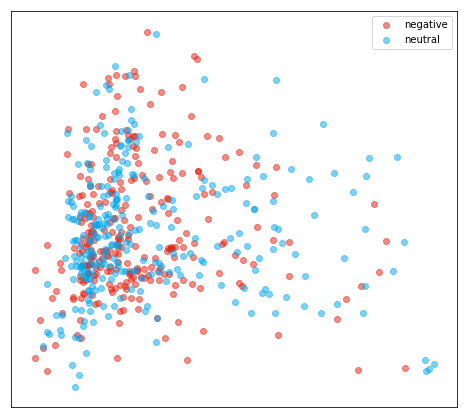

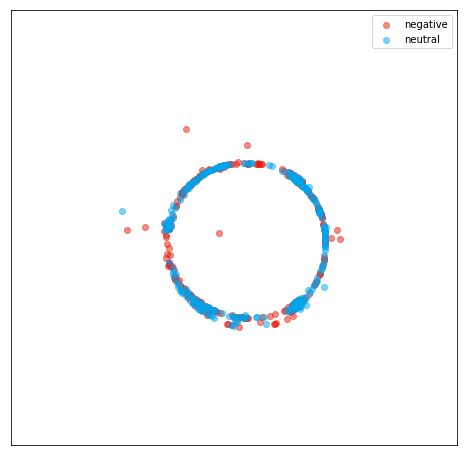

In [102]:
df = df_documents_athar                

%store df
%run unsupervised_classification_athar.ipynb

### Using same number neutral  than negative sentences

In [103]:
df_athar_negative = df_athar.loc[df_athar['Sentiment'] == "n", ['Sentiment','Citation_Text']]
df_athar_neutral_selection = df_athar.loc[df_athar['Sentiment'] == "o", ['Sentiment','Citation_Text']][:df_athar_negative.shape[0]]

df_documents_athar_50_50 = df_athar_negative.append(df_athar_neutral_selection)

################

"""
from modules.get_stemmed_sentences_and_list_words import *
import imp
imp.reload(modules.get_stemmed_sentences_and_list_words)
"""

sentences_neutral = df_athar_neutral_selection.Citation_Text
sentences_negative = df_athar_negative.Citation_Text
(documents_athar_50_50, list_all_words_athar_50_50, list_all_bigrams_athar_50_50) = get_tuple_articles_stemmed_classified_and_list_words(sentences_neutral, 
                                                                                                                       sentences_negative,
                                                                                                                      'neutral',
                                                                                                                      'negative')

################



train_Naive_Bayes(documents_athar_50_50, list_all_words_athar_50_50, 0.20)




documents in test_set: 	 112
documents in training_set: 	 448

Classifier accuracy percent: 83.03571428571429
Most Informative Features
                     cut = True           neutra : negati =     15.9 : 1.0
                   brown = True           negati : neutra =     13.4 : 1.0
                 similar = True           neutra : negati =     12.3 : 1.0
                  collin = True           negati : neutra =      9.9 : 1.0
                although = True           negati : neutra =      8.2 : 1.0
                thesauru = True           neutra : negati =      7.6 : 1.0
                  produc = True           negati : neutra =      7.0 : 1.0
                   limit = True           negati : neutra =      6.2 : 1.0
                  metric = True           negati : neutra =      6.2 : 1.0
                 current = True           negati : neutra =      6.2 : 1.0
                     may = True           negati : neutra =      6.2 : 1.0
                 increas = True        

Stored 'df' (DataFrame)


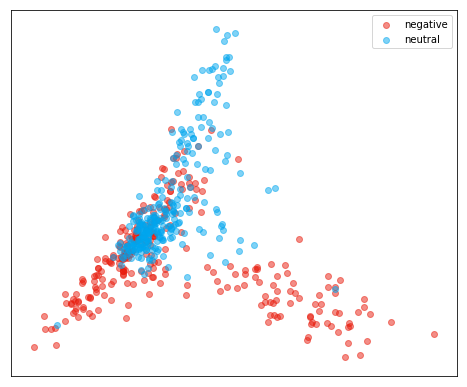

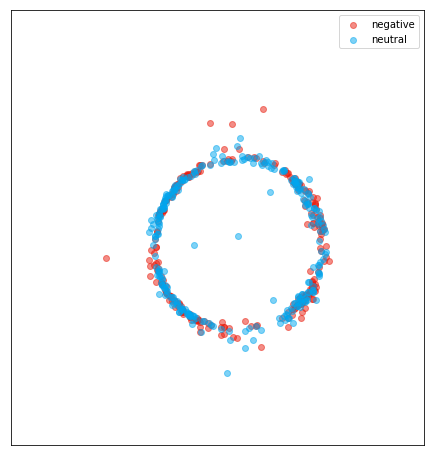

In [104]:
df = df_documents_athar_50_50                

%store df
%run unsupervised_classification_athar.ipynb

### Using balanced dataset

In [105]:
model_Naive_Bayes = train_Naive_Bayes(athar_documents_50_50_balanced, athar_list_all_words_50_50_balanced, 0.20)



documents in test_set: 	 110
documents in training_set: 	 442

Classifier accuracy percent: 67.27272727272727
Most Informative Features
              outperform = True            after : before =     12.0 : 1.0
                although = True            after : before =     12.0 : 1.0
                   while = True            after : before =     11.3 : 1.0
                    show = True            after : before =      8.6 : 1.0
                    time = True            after : before =      8.6 : 1.0
                 bilingu = True           before : after  =      8.1 : 1.0
                  correl = True            after : before =      6.5 : 1.0
                    even = True            after : before =      6.5 : 1.0
                  higher = True            after : before =      5.8 : 1.0
                   point = True            after : before =      5.8 : 1.0
                judgment = True            after : before =      5.1 : 1.0
                   small = True        

Stored 'df' (DataFrame)


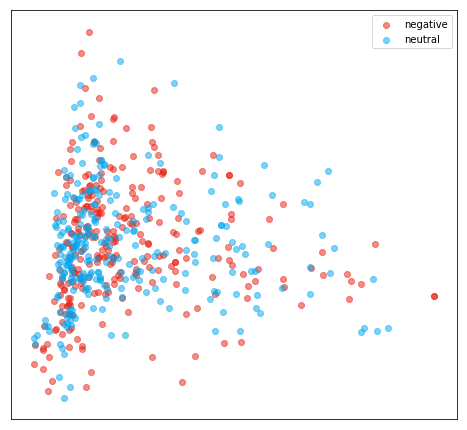

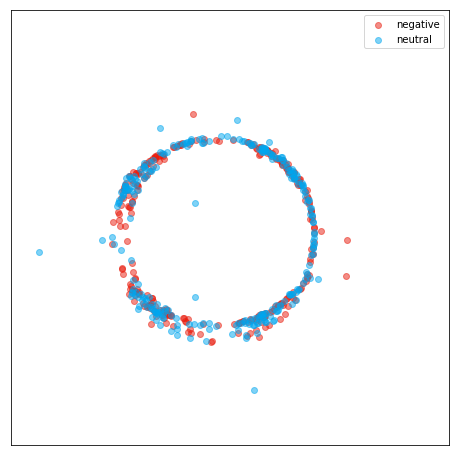

In [106]:
df = df_athar_documents_50_50_balanced                

%store df
%run unsupervised_classification_athar.ipynb




# Let's use the model to classify other sentences

In [107]:
import imp
import sys
sys.path.insert(0, "./modules")

from modules.get_stemmed_sentences_and_list_words import *



list_sentences = ["hidden framework ", "predict update",  "make present"] #athar_sentences_after[12]
list_sentences_tokenized_stemmed = get_stemmed_sentence(list_sentences)

all_words_freq = nltk.FreqDist(athar_list_all_words_50_50_balanced)
word_features = list(all_words_freq.keys()) # Those are all teh words in the document. Each word is a feature

list_features_for_all_sentences = []
for sentence in list_sentences_tokenized_stemmed:
    features = find_features(sentence, word_features)
    list_features_for_all_sentences.append(features)
    
predicted = model_Naive_Bayes.classify_many(list_features_for_all_sentences)
print(predicted)


['before', 'before', 'before']


### Let's use the model with the sentences from retraction watch:

* Note that we are creating here the features using athar_list_all_words_50_50_balanced. However, to train another agorithm you must use all words from the docuements

# 1.1 -  All documents

#YOU CAN USE df_Articles_before_after_retraction instead of sentences = sentences_before + sentences_after
sentences_before = df_sentences_before.sentences_citing
sentences_after = df_sentences_after.sentences_citing


#YOU CAN USE df_Articles_before_after_retraction instead of sentences = sentences_before + sentences_after
sentences_before_after = sentences_before.append(sentences_after)

#(documents_all, list_all_words, list_all_bigrams) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before, sentences_after)
#df_documents_all = df_sentences_before.append(df_sentences_after) # I will used this in unsupervised models

list_sentences = sentences_before_after #sentences_after #athar_sentences_after[12]
list_sentences_tokenized_stemmed = get_stemmed_sentence(list_sentences)

all_words_freq = nltk.FreqDist(athar_list_all_words_50_50_balanced)
word_features = list(all_words_freq.keys()) # Those are all teh words in the document. Each word is a feature

list_features_for_all_sentences = []
for sentence in list_sentences_tokenized_stemmed:
    features = find_features(sentence, word_features)
    list_features_for_all_sentences.append(features)
    
predicted = model_Naive_Bayes.classify_many(list_features_for_all_sentences)
print(predicted)



### 90 sentences_before(len(sentences_before)): 33 classified as non-criticising (predicted.count('before')); 57 critizising
### 32 sentences_after: 8 classified as non-criticising, 24 as critizising

### 122 sentences: 41 non-critizising; 81 critizising

In [108]:
# df_1sentence has the sentences citing for each section
# df1sentence_sentences_classification has the sentences citing together. I will use this.

df1sentence_sentences_classification_NBayes = df1sentence_sentences_classification

list_prediction_NBayes = []
for index, row, in df1sentence_sentences_classification_NBayes.iterrows():
    #print(row.sentences_citing)
    
    list_sentences = [row.sentences_citing] #sentences_after #athar_sentences_after[12]
    list_sentences_tokenized_stemmed = get_stemmed_sentence(list_sentences)

    all_words_freq = nltk.FreqDist(athar_list_all_words_50_50_balanced)
    word_features = list(all_words_freq.keys()) # Those are all teh words in the document. Each word is a feature

    list_features_for_all_sentences = []
    for sentence in list_sentences_tokenized_stemmed:
        features = find_features(sentence, word_features)
        list_features_for_all_sentences.append(features)

    predicted = model_Naive_Bayes.classify_many(list_features_for_all_sentences)
    list_prediction_NBayes = list_prediction_NBayes + predicted
    #print(index, '\t', predicted)

df1sentence_sentences_classification_NBayes['Naive_Bayes_prediction'] = list_prediction_NBayes

df1sentence_sentences_classification_NBayes.head(2)


DOI_cited   doi_article_citing  before_retraction  \
0  10.1186/s13033-017-0143-5                  NaN                  0   
1         10.1002/cbin.10291  10.1042/BSR20160174                  1   

   after_retraction                                   sentences_citing  \
0                 1   1  –  3)  In a survey of 1,397 Korean people,...   
1                 0  To verify the activation of FOXO1 in our model...   

  Naive_Bayes_prediction  
0                  after  
1                 before

In [109]:
before_classified_as_non_critizising = list(df1sentence_sentences_classification_NBayes.loc[df1sentence_sentences_classification_NBayes.before_retraction == 1, 'Naive_Bayes_prediction']).count('before')
before_classified_as_critizising = list(df1sentence_sentences_classification_NBayes.loc[df1sentence_sentences_classification_NBayes.before_retraction == 1, 'Naive_Bayes_prediction']).count('after')

after_classified_as_non_critizising = list(df1sentence_sentences_classification_NBayes.loc[df1sentence_sentences_classification_NBayes.before_retraction == 0, 'Naive_Bayes_prediction']).count('before')
after_classified_as_critizising = list(df1sentence_sentences_classification_NBayes.loc[df1sentence_sentences_classification_NBayes.before_retraction == 0, 'Naive_Bayes_prediction']).count('after')

print('Number of documents:', 
      '\n before_classified_as_non_critizising: \t', before_classified_as_non_critizising,
      '\n before_classified_as_critizising: \t', before_classified_as_critizising,
      '\n after_classified_as_non_critizising: \t', after_classified_as_non_critizising,
      '\n after_classified_as_critizising: \t', after_classified_as_critizising
      )

Number of documents: 
 before_classified_as_non_critizising: 	 48 
 before_classified_as_critizising: 	 42 
 after_classified_as_non_critizising: 	 15 
 after_classified_as_critizising: 	 17


In [110]:
sentences_NBayes_predicts_critizising = (
    df1sentence_sentences_classification_NBayes.loc[
    df1sentence_sentences_classification_NBayes['Naive_Bayes_prediction'] == 'after',
        ['sentences_citing', 'before_retraction']])

sentences_NBayes_predicts_non_critizising = (
    df1sentence_sentences_classification_NBayes.loc[
    df1sentence_sentences_classification_NBayes['Naive_Bayes_prediction'] == 'before',
        ['sentences_citing', 'before_retraction']])

In [111]:
sentences_NBayes_predicts_non_critizising

sentences_citing  before_retraction
1    To verify the activation of FOXO1 in our model...                  1
3    in a S961-induced insulin resistance mouse mod...                  1
9     Another example is the Akt signaling cascade ...                  1
14   One quite promising study was published recent...                  0
16    A l t h o u g h   d e g r a d a t i o n   o f...                  1
17   Other recent efforts have described the creati...                  1
18   One of the intriguing problems discussed inclu...                  0
19   Others have shown that incongruence with taxon...                  1
22   RhoA has been reported to be one of the target...                  1
23   The abnormal expression profiles of miRNAs hav...                  1
24    Recently, miRNAs have been shown to play a ro...                  1
25          R       e       c       e       n      ...                  1
26      H 3 K 9 A c   C h I P     L   v   P     p  ...                  1
30   In cancers, the dysregulation of miRNAs has be...                  0
31   Tumor invasiveness was assessed by determining...                  1
32   Also, several miRNAs have been found to be dir...                  1
33   This miRNA regulates metastasis by opposing lo...                  1
34    MiR-31 expression was elevated in endometrial...                  0
37      T a b l e   1     m i R N A s   a n d   t h...                  1
40    W h i l e   t h e   s u p p r e s s i v e   e...                  1
44   Some miRNAs are involved in tumorigenesis by a...                  1
53      L   u   n   a   -   V   a   r   g   a   s  ...                  0
55   We also added a  baseline  condition in which ...                  1
57   Interestingly, the expression of a phospho-mim...                  1
60   GAMT was identified as a p53 target gene that ...                  1
61   Together with  let-7c  , both  miR-125  and  m...                  1
64    B y   q u a n t i t a t i v e   r e a l - t i...                  1
67      T   h   e       m   e   t   a   b   o   l  ...                  1
68    Plasmodium falciparum   . \n       Plasmodium...                  1
71   Members of this family of receptors are tetram...                  1
..                                                 ...                ...
87                  T               h              ...                  1
88   A recent report found an association between a...                  1
90    This report by Lombardi, et al was followed b...                  1
91                                  d              ...                  1
99    M o r e   r e c e n t l y ,   m a t t e r s  ...                  1
100  Lo  , (FDA/CBER, Bethesda, Maryland) reviewed ...                  1
101         i   n       p   e   o   p   l   e      ...                  1
102                                                ...                  1
103                               2010  ).    2010  ).                  1
104    \n \n             A   v e r y   r e c e n t ...                  1
106  As the clinical risks of MSCs due to the use o...                  0
107  He et al   recently further investigated the r...                  1
108  Besides, according to some studies, S1P is cap...                  0
110  Indeed, the range of autoimmune/autoinflammato...                  1
111  Supervised analysis of gene expression has bee...                  0
116     I   n           T   .       b   r   u   c  ...                  0
117   The essential role of Cited2, a negative regu...                  1
119  As an example, phosphorylation of nuclear casp...                  0
122  Similarly, other groups have previously report...                  1
127   In a similar approach, Nevins and colleagues ...                  1
128  It has recently been determined that the chemo...                  0
129   T h e   c o m b i n a t i o n   o f     i n  ...                  0
130   To determine the sensitivity of ovar

In [112]:
for index, row in sentences_NBayes_predicts_critizising.iterrows():
    print("\n %%%%%%%%%%%%   ",index, "   - before retraction: ", row.before_retraction, "-   %%%%%%%%%%%%% \n\n", row.sentences_citing)


 %%%%%%%%%%%%    0    - before retraction:  0 -   %%%%%%%%%%%%% 

  1  –  3)  In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  1)  Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,  4)  research has already begun to investigate treatments for the disorder.  
      1)
     
     Although there has been meaningful debate as to whether IGD is a formal psychiatric disorder with solid diagnostic criteria,
     
      4)
     
     research has already begun to investigate treatments for the disorder. 
      1
     
     –
     
      3)
     
     In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  1  –  3)  In a survey of 1,397 Korean people, problematic game use was associated with nicotine use, depressive disorder, and anxiety disorder.  1)  Altho

In [113]:
for index, row in sentences_NBayes_predicts_non_critizising.iterrows():
    print("\n %%%%%%%%%%%%   ",index, "   - before retraction: ", row.before_retraction, "-   %%%%%%%%%%%%% \n\n", row.sentences_citing)


 %%%%%%%%%%%%    1    - before retraction:  1 -   %%%%%%%%%%%%% 

 To verify the activation of FOXO1 in our model, we measured mRNA levels of  PIK3C3  and  Sod2  , gene targets of FOXO1 that also encode for autophagy-associated proteins  .   To verify the activation of FOXO1 in our model, we measured mRNA levels of  PIK3C3  and  Sod2  , gene targets of FOXO1 that also encode for autophagy-associated proteins  .

 %%%%%%%%%%%%    3    - before retraction:  1 -   %%%%%%%%%%%%% 

 in a S961-induced insulin resistance mouse model  .  in a S961-induced insulin resistance mouse model  . in a S961-induced insulin resistance mouse model  .

 %%%%%%%%%%%%    9    - before retraction:  1 -   %%%%%%%%%%%%% 

  Another example is the Akt signaling cascade (
        
         32
        
        ) or the overexpression of human epidermal growth factor receptor-2/neu tyrosine kinase.  

 %%%%%%%%%%%%    14    - before retraction:  0 -   %%%%%%%%%%%%% 

 One quite promising study was published recen

# Let's filter the sentences analyse:

Critizising: After retraction and classified as critizising by the Naive Bayes model

    
Non-critizising: Before retraction and classified as neutral by the Naive Bayes model

In [114]:
mask_before = (df1sentence_sentences_classification_NBayes.before_retraction == 1) & (
        df1sentence_sentences_classification_NBayes.Naive_Bayes_prediction == 'before')

mask_after = (df1sentence_sentences_classification_NBayes.before_retraction == 0) & (
        df1sentence_sentences_classification_NBayes.Naive_Bayes_prediction == 'after')
        
sentences_before_non_critizising_filtered = df1sentence_sentences_classification_NBayes[mask_before].sentences_citing
sentences_after_critizising_filtered = df1sentence_sentences_classification_NBayes[mask_after].sentences_citing


In [115]:
sentences_before_non_critizising_filtered.shape

(48,)

In [116]:
sentences_after_critizising_filtered.shape

(17,)

In [117]:
for sentence in sentences_before_non_critizising_filtered:
    print(sentence)

To verify the activation of FOXO1 in our model, we measured mRNA levels of  PIK3C3  and  Sod2  , gene targets of FOXO1 that also encode for autophagy-associated proteins  .   To verify the activation of FOXO1 in our model, we measured mRNA levels of  PIK3C3  and  Sod2  , gene targets of FOXO1 that also encode for autophagy-associated proteins  .
in a S961-induced insulin resistance mouse model  .  in a S961-induced insulin resistance mouse model  . in a S961-induced insulin resistance mouse model  .
 Another example is the Akt signaling cascade (
        
         32
        
        ) or the overexpression of human epidermal growth factor receptor-2/neu tyrosine kinase.  
 A l t h o u g h   d e g r a d a t i o n   o f   l i g n o c e l l u l o s e   h a s   b e e n   s h o w n   t o   b e   p o s s i b l e   w i t h   m i n i c e l l u l o s o m e s   c o n t a i n i n g   o n l y   t h r e e   e n z y m e s     ,   s h o u l d   w e   w i s h   t o   i n c r e a s e   t h e   c o m p

In [118]:
# Despues de Semana Santa

In [119]:
#sentences_before_non_critizising_filtered_limited = sentences_before_non_critizising_filtered
#sentences_after_critizising_filtered

(documents_athar_before_after, list_all_words_athar_before_after, list_all_bigrams_athar_before_after) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before_non_critizising_filtered, 
                                                                                                                       sentences_after_critizising_filtered,
                                                                                                                      'neutral',
                                                                                                                      'negative')

################



train_Naive_Bayes(documents_athar_before_after, list_all_words_athar_before_after, 0.20)






documents in test_set: 	 13
documents in training_set: 	 52

Classifier accuracy percent: 84.61538461538461
Most Informative Features
                     use = True           negati : neutra =      7.8 : 1.0
                     but = True           negati : neutra =      6.1 : 1.0
                   level = True           negati : neutra =      5.7 : 1.0
                     may = True           negati : neutra =      4.7 : 1.0
                   other = True           negati : neutra =      4.3 : 1.0
                  resist = True           negati : neutra =      4.3 : 1.0
                  result = True           negati : neutra =      4.3 : 1.0
                 insulin = True           negati : neutra =      4.3 : 1.0
                 multipl = True           negati : neutra =      4.3 : 1.0
                    oxid = True           negati : neutra =      4.3 : 1.0
                 mainten = True           negati : neutra =      4.3 : 1.0
                  observ = True          

In [120]:
len(sentences_before_non_critizising_filtered)

48

In [121]:
len(sentences_after_critizising_filtered)

17

In [122]:
sentences_before_non_critizising_filtered_limited = sentences_before_non_critizising_filtered[:len(sentences_after_critizising_filtered)] 
sentences_after_critizising_filtered


(documents_athar_before_after_50_50, list_all_words_athar_before_after_50_50, list_all_bigrams_athar_before_after) = get_tuple_articles_stemmed_classified_and_list_words(sentences_before_non_critizising_filtered_limited, 
                                                                                                                       sentences_after_critizising_filtered,
                                                                                                                      'neutral',
                                                                                                                      'negative')

################



train_Naive_Bayes(documents_athar_before_after_50_50, list_all_words_athar_before_after_50_50, 0.20)






documents in test_set: 	 7
documents in training_set: 	 27

Classifier accuracy percent: 57.14285714285714
Most Informative Features
                  report = True           negati : neutra =      3.4 : 1.0
                   level = True           negati : neutra =      2.8 : 1.0
                    role = True           neutra : negati =      2.5 : 1.0
                function = True           negati : neutra =      2.2 : 1.0
                  signal = True           neutra : negati =      1.8 : 1.0
                  breast = True           neutra : negati =      1.8 : 1.0
                  target = True           neutra : negati =      1.8 : 1.0
                 describ = True           neutra : negati =      1.8 : 1.0
                    gene = True           neutra : negati =      1.8 : 1.0
                   model = True           neutra : negati =      1.8 : 1.0
                    play = True           neutra : negati =      1.8 : 1.0
                 increas = False          

In [123]:
athar_documents_50_50_balanced

[(['base', 'approach', 'statist', 'machin', 'translat', 'brown'], 'before'),
 (['propos',
   'algorithm',
   'sentenc',
   'combin',
   'but',
   'no',
   'result',
   'report'],
  'after'),
 (['among',
   'languag',
   'model',
   'approach',
   'model',
   'wide',
   'use',
   'speech',
   'recognit',
   'gale',
   'church',
   'brown',
   'yang',
   'applic'],
  'before'),
 (['first', 'recogn', 'base', 'noun', 'phrase', 'specif', 'resembl'],
  'before'),
 (['congress',
   'italian',
   'associ',
   'artifici',
   'intellig',
   'build',
   'lexicon',
   'contribut',
   'comput',
   'ibm',
   'report',
   'watson',
   'research',
   'center',
   'brent',
   'automat',
   'frame',
   'text',
   'acquisit',
   'lexic',
   'inform',
   'corpu',
   'church',
   'hank',
   'word',
   'associ',
   'norm',
   'mutual',
   'inform',
   'lexicographi',
   'comput',
   'linguist',
   'vol'],
  'before'),
 (['experiment',
   'result',
   'indic',
   'model',
   'outperform',
   'model',
   'lar

In [124]:
# Adding sentences

sentences_before_non_critizising_filtered_limited = sentences_before_non_critizising_filtered[:len(sentences_after_critizising_filtered)] 
sentences_after_critizising_filtered


athar_sentences_before = df_athar_balanced_neutral_sentences.Citation_Text
athar_sentences_after = df_athar_balanced_negative_sentences.Citation_Text



all_neutral = sentences_before_non_critizising_filtered_limited.append(athar_sentences_before)
all_negative = sentences_after_critizising_filtered.append(athar_sentences_after)


(documents_athar_adding, list_all_words_athar_adding, list_all_bigrams_athar_adding) = get_tuple_articles_stemmed_classified_and_list_words(all_neutral, 
                                                                                                                       all_negative,
                                                                                                                      'neutral',
                                                                                                                      'negative')

################



classifier_adding = train_Naive_Bayes(documents_athar_adding, list_all_words_athar_adding, 0.20)






documents in test_set: 	 117
documents in training_set: 	 469

Classifier accuracy percent: 73.50427350427351
Most Informative Features
              outperform = True           negati : neutra =     14.2 : 1.0
                   while = True           negati : neutra =     10.0 : 1.0
                      no = True           negati : neutra =      9.4 : 1.0
                although = True           negati : neutra =      8.5 : 1.0
                  effect = True           negati : neutra =      8.0 : 1.0
                    show = True           negati : neutra =      6.9 : 1.0
                  correl = True           negati : neutra =      6.6 : 1.0
                  higher = True           negati : neutra =      6.6 : 1.0
                    time = True           negati : neutra =      6.0 : 1.0
                 address = True           negati : neutra =      5.9 : 1.0
                     but = True           negati : neutra =      5.5 : 1.0
                   small = True        

In [125]:
classifier_adding.most_informative_features()

[('outperform', True),
 ('while', True),
 ('no', True),
 ('although', True),
 ('effect', True),
 ('show', True),
 ('correl', True),
 ('higher', True),
 ('time', True),
 ('address', True),
 ('but', True),
 ('small', True),
 ('point', True),
 ('make', True),
 ('judgment', True),
 ('origin', True),
 ('significantli', True),
 ('possibl', True),
 ('issu', True),
 ('bilingu', True),
 ('problem', True),
 ('part', True),
 ('updat', True),
 ('first', True),
 ('without', True),
 ('evid', True),
 ('consider', True),
 ('rather', True),
 ('extend', True),
 ('unlik', True),
 ('need', True),
 ('number', True),
 ('increas', True),
 ('linguist', True),
 ('provid', True),
 ('exist', True),
 ('document', True),
 ('noun', True),
 ('posit', True),
 ('present', True),
 ('not', True),
 ('match', True),
 ('limit', True),
 ('margin', True),
 ('lack', True),
 ('look', True),
 ('singl', True),
 ('chang', True),
 ('low', True),
 ('best', True),
 ('typic', True),
 ('version', True),
 ('appear', True),
 ('seem', Tr

In [126]:
def show_most_informative_features_in_list(classifier, n=10, corpus_label = 'negative'):
    #https://stackoverflow.com/questions/42970646/store-most-informative-features-from-nltk-naivebayesclassifier-in-a-list
    """
    Return a nested list of the "most informative" features 
    used by the classifier along with it's predominant labels
    """
    cpdist = classifier._feature_probdist       # probability distribution for feature values given labels
    feature_list = []
    corpus_negative = []
    for (fname, fval) in classifier.most_informative_features(n):
        def labelprob(l):
            return cpdist[l, fname].prob(fval)
        labels = sorted([l for l in classifier._labels if fval in cpdist[l, fname].samples()], 
                        key=labelprob)
        feature_list.append([fname, labels[-1]])
        if labels[-1] == corpus_label:
            corpus_negative.append(fname)
    return (feature_list, corpus_negative)

(list_features, corpus_negative) = show_most_informative_features_in_list(classifier_adding, n =20)

corpus_negative


['outperform',
 'while',
 'no',
 'although',
 'effect',
 'show',
 'correl',
 'higher',
 'time',
 'address',
 'but',
 'small',
 'point',
 'make',
 'judgment',
 'origin',
 'significantli',
 'possibl',
 'issu']

# Let's get the corpus of negative words for athar_documents_50_50_balanced

In [127]:
model_Naive_Bayes = train_Naive_Bayes(athar_documents_50_50_balanced, athar_list_all_words_50_50_balanced, 0.20)

(list_features_athar_50_50_balanced, corpus_negative_athar_50_50_balanced) = show_most_informative_features_in_list(model_Naive_Bayes, n =25, corpus_label = 'after')

corpus_negative_athar_50_50_balanced


documents in test_set: 	 110
documents in training_set: 	 442

Classifier accuracy percent: 67.27272727272727
Most Informative Features
              outperform = True            after : before =     12.0 : 1.0
                although = True            after : before =     12.0 : 1.0
                   while = True            after : before =     11.3 : 1.0
                    show = True            after : before =      8.6 : 1.0
                    time = True            after : before =      8.6 : 1.0
                 bilingu = True           before : after  =      8.1 : 1.0
                  correl = True            after : before =      6.5 : 1.0
                    even = True            after : before =      6.5 : 1.0
                  higher = True            after : before =      5.8 : 1.0
                   point = True            after : before =      5.8 : 1.0
                judgment = True            after : before =      5.1 : 1.0
                   small = True        

['outperform',
 'although',
 'while',
 'show',
 'time',
 'correl',
 'even',
 'higher',
 'point',
 'judgment',
 'small',
 'address',
 'advantag',
 'seem',
 'motiv',
 'significantli',
 'question',
 'make',
 'unlik',
 'report',
 'well',
 'but']

In [128]:
for (fname, fval) in classifier_adding.most_informative_features():
    print(fname)

outperform
while
no
although
effect
show
correl
higher
time
address
but
small
point
make
judgment
origin
significantli
possibl
issu
bilingu
problem
part
updat
first
without
evid
consider
rather
extend
unlik
need
number
increas
linguist
provid
exist
document
noun
posit
present
not
match
limit
margin
lack
look
singl
chang
low
best
typic
version
appear
seem
report
howev
learn
corpu
refer
import
along
length
should
subject
equival
focus
averag
build
summari
line
studi
well
level
much
like
even
sever
weight
follow
given
perform
sourc
better
decod
distribut
respect
predict
employ
gener
similar
obtain
human
basic
exploit
far
relev
instead
head
weak
coverag


# WORD EMBEDDING ALGORITHM

http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/

Modified following: 
https://stackoverflow.com/questions/20444340/iter-values-item-in-dictionary-does-not-work

Let's use the balanced dataset created using the sentences classified by Athar.

In [129]:
import gensim
import nltk

# X is a list of tokenized texts (i.e. list of lists of tokens).
# Let's use the balanced dataset created using the sentences classified by Athar.
X = []
y = []
for index, row in df_documents_athar_50_50.iterrows():
    X.append(nltk.word_tokenize(row.Citation_Text))
    y.append(row.Sentiment)

# Train model using the do
model = gensim.models.Word2Vec(X, size=100, iter = 1000)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))
#w2v = {w: vec for w, vec in zip(model.wv.index2word, model.wv.syn0)}




/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:14: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


In [130]:
w2v

{'%': array([-0.6317785 ,  0.22898695,  0.49978238,  1.9309437 , -0.4068623 ,
        -0.07111136, -1.4995649 ,  1.053902  ,  0.75731784,  4.162654  ,
         1.8501478 , -0.03182189,  1.196766  , -2.7171903 ,  2.9625797 ,
        -2.1852    ,  0.70450044,  3.6042619 ,  0.02688648, -1.1612155 ,
         2.5088615 , -3.5125344 ,  1.7356378 , -1.7070018 ,  0.290124  ,
        -2.4150476 ,  0.5845608 , -0.6958876 , -0.26989135, -0.3780142 ,
        -4.6628423 , -0.3000816 ,  1.9647393 , -2.7227724 , -0.68918514,
         4.439116  , -1.3505169 ,  1.067364  ,  0.08810853, -4.669678  ,
        -3.1584678 , -2.0967486 , -2.8553455 , -0.11874125,  4.299369  ,
        -0.22802018, -0.05019899, -3.4420958 , -0.21645945,  0.9458982 ,
        -0.4771679 , -0.4846698 ,  1.5411125 ,  0.837009  ,  2.4766998 ,
         1.8089775 , -4.2162814 , -2.4190605 ,  2.6387868 ,  6.894946  ,
         2.8409555 ,  1.9185989 , -3.9250233 , -3.2898417 , -1.5299034 ,
         1.3214923 ,  2.768214  ,  3.8892422 ,

In [131]:
model.wv['%']

array([-0.6317785 ,  0.22898695,  0.49978238,  1.9309437 , -0.4068623 ,
       -0.07111136, -1.4995649 ,  1.053902  ,  0.75731784,  4.162654  ,
        1.8501478 , -0.03182189,  1.196766  , -2.7171903 ,  2.9625797 ,
       -2.1852    ,  0.70450044,  3.6042619 ,  0.02688648, -1.1612155 ,
        2.5088615 , -3.5125344 ,  1.7356378 , -1.7070018 ,  0.290124  ,
       -2.4150476 ,  0.5845608 , -0.6958876 , -0.26989135, -0.3780142 ,
       -4.6628423 , -0.3000816 ,  1.9647393 , -2.7227724 , -0.68918514,
        4.439116  , -1.3505169 ,  1.067364  ,  0.08810853, -4.669678  ,
       -3.1584678 , -2.0967486 , -2.8553455 , -0.11874125,  4.299369  ,
       -0.22802018, -0.05019899, -3.4420958 , -0.21645945,  0.9458982 ,
       -0.4771679 , -0.4846698 ,  1.5411125 ,  0.837009  ,  2.4766998 ,
        1.8089775 , -4.2162814 , -2.4190605 ,  2.6387868 ,  6.894946  ,
        2.8409555 ,  1.9185989 , -3.9250233 , -3.2898417 , -1.5299034 ,
        1.3214923 ,  2.768214  ,  3.8892422 , -2.5582044 , -0.63

In [132]:
words = list(model.wv.vocab)
print(words[:20])

['Jing', 'and', 'McKeown', '(', '2000', ')', 'have', 'proposed', 'a', 'rule-based', 'algorithm', 'for', 'sentence', 'combination', ',', 'but', 'no', 'results', 'been', 'reported']


In [133]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


In [134]:
from collections import defaultdict

class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])


In [135]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

etree_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])


In [136]:
#w2v_mean_object = MeanEmbeddingVectorizer(w2v)

from sklearn.model_selection import cross_val_score, KFold 

kfold = KFold(n_splits= 5)

etree_w2v.fit(X,y)


evalua = cross_val_score(etree_w2v, X, y, cv=kfold).mean()

print(evalua)




0.5214285714285715


In [137]:
etree_w2v.predict([['hi', 'how', 'are','you', '?'], 
                   ['there', 'was', 'a', 'debate'],
                  ['the', 'results', 'were', 'not', 'reproducible'],
                  ['irreproducible', 'results'], 
                  ['in', 'good', 'agreement', 'with'],
                   ['as', 'shown', 'in', 'reference']
                  ])


array(['o', 'o', 'n', 'n', 'n', 'n'], dtype='<U1')

In [138]:
from sklearn.model_selection import cross_val_score, KFold 


etree_w2v = Pipeline([("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)), ("word2vec extra trees", ExtraTreesClassifier(n_estimators=100))])
etree_w2v_tfidf = Pipeline([("tfidf word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)), ("tfidf word2vec extra trees", ExtraTreesClassifier(n_estimators=100))])


kfold = KFold(n_splits=3)

all_models = [
    ("etree_w2v", etree_w2v), 
    ("etree_w2v_tfidf", etree_w2v_tfidf)
]

etree_w2v.fit(X,y)
etree_w2v_tfidf.fit(X,y)



scores = sorted([(name, 
                  cross_val_score(model, X, y, cv=kfold).mean())
                 for name, model in all_models], 
                 key=lambda args: -(args[1]))

print(scores)
"""
scores = sorted([(name, 
                  cross_val_score(model, 
                                  df_documents_athar_50_50.Citation_Text,
                                  df_documents_athar_50_50.Sentiment,                                       
                                  cv=kfold).mean())
                 for name, model in all_models], 
                 key=lambda args: -(args[1]))
"""

[('etree_w2v_tfidf', 0.2549211277864029), ('etree_w2v', 0.23889751403982903)]


'\nscores = sorted([(name, \n                  cross_val_score(model, \n                                  df_documents_athar_50_50.Citation_Text,\n                                  df_documents_athar_50_50.Sentiment,                                       \n                                  cv=kfold).mean())\n                 for name, model in all_models], \n                 key=lambda args: -(args[1]))\n'

# Let's train in using pre-trained data

In [139]:
%%bash
wget http://nlp.stanford.edu/data/glove.6B.zip
unzip glove.6B.zip

Archive:  glove.6B.zip


--2018-04-25 10:07:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2018-04-25 10:07:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

     0K .......... .......... .......... .......... ..........  0%  118K 1h58m
    50K .......... .......... .......... .......... ..........  0%  347K 79m41s
   100K .......... .......... .......... .......... ..........  0%  347K 66m35s
   150K .......... .......... .......... .......... ..........  0%  348K 60m2s
   200K .......... .......... .......... .......... ..........  0%  348K 56m5s
   250

In [140]:
import numpy as np

with open("glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0].decode('UTF-8'): np.array(list(map(float, line.split()[1:])))
           for line in lines}


In [141]:
w2v

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01]),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.41634 , -0.15428 ,  0.1

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

etree_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])


In [143]:
from sklearn.model_selection import cross_val_score, KFold 

kfold = KFold(n_splits= 5)

etree_w2v.fit(X,y)


evalua = cross_val_score(etree_w2v, X, y, cv=kfold).mean()

print(evalua)


evalua = cross_val_score(etree_w2v, X, y, cv=kfold).min()

print(evalua)


evalua = cross_val_score(etree_w2v, X, y, cv=kfold).max()

print(evalua)



0.44642857142857145
0.3125
0.6517857142857143


In [157]:
etree_w2v.predict([['hi', 'how', 'are','you', '?'], 
                   ['there', 'was', 'a', 'debate'],
                  ['the', 'results', 'were', 'not', 'reproducible'],
                  ['irreproducible', 'results'], 
                  ['in', 'good', 'agreement', 'with'],
                   ['as', 'shown', 'in', 'reference'],
                   ['we', 'cannot', 'reproduce', 'these', 'resutls'],
                   ['we', 'can', 'reproduce', 'the', 'resutls']
                  ])


array(['n', 'n', 'n', 'n', 'n', 'n', 'o', 'o'], dtype='<U1')

# Sentiment Analysis using Doc2Vec
https://linanqiu.github.io/2015/10/07/word2vec-sentiment/

In [145]:
# gensim modules
from gensim import utils
from gensim.models.doc2vec import LabeledSentence
from gensim.models import Doc2Vec

# numpy
import numpy

# classifier
from sklearn.linear_model import LogisticRegression

# random
import random

In [146]:
class LabeledLineSentence(object):
    def __init__(self, sources):
        self.sources = sources
        
        flipped = {}
        
        # make sure that keys are unique
        for key, value in sources.items():
            if value not in flipped:
                flipped[value] = [key]
            else:
                raise Exception('Non-unique prefix encountered')
    
    def __iter__(self):
        for source, prefix in self.sources.items():
            with utils.smart_open(source) as fin:
                for item_no, line in enumerate(fin):
                    yield LabeledSentence(utils.to_unicode(line).split(), [prefix + '_%s' % item_no])
    
    def to_array(self):
        self.sentences = []
        for source, prefix in self.sources.items():
            with utils.smart_open(source) as fin:
                for item_no, line in enumerate(fin):
                    self.sentences.append(LabeledSentence(utils.to_unicode(line).split(), [prefix + '_%s' % item_no]))
        return self.sentences
    
    def sentences_perm(self):
        shuffled = list(self.sentences)
        random.shuffle(shuffled)
        return shuffled


The result is to have five documents:

- `test-neg.txt`: 12500 negative movie reviews from the test data
- `test-pos.txt`: 12500 positive movie reviews from the test data
- `train-neg.txt`: 12500 negative movie reviews from the training data
- `train-pos.txt`: 12500 positive movie reviews from the training data
- `train-unsup.txt`: 50000 Unlabelled movie reviews

Each of the documents in a file should be on one line, separated by new lines. This is extremely important, because our parser depends on this to identify sentences.

### Let's train the vectors using our sentences

In [147]:
# Let's use the balanced dataset created using the sentences classified by Athar.
X = []
y = []


list_neg_docs = []
list_neut_docs = []
list_pos_docs = []

df_documents_athar_50_50 = df_documents_athar_50_50.reset_index(drop = True)

list_clean_sentences = []

for index, row in df_documents_athar_50_50.iterrows():
        
    citing_sentence = row.Citation_Text 
    if  citing_sentence != None:
        citing_sentence = re.sub("[*?]", " ", citing_sentence)
        citing_sentence = re.sub("\(*?\)", " ", citing_sentence)
        citing_sentence = re.sub("[\),\(,\,,\<,\>,\.,\;]", " ", citing_sentence) 
        citing_sentence = re.sub("et al", " ", citing_sentence)
        citing_sentence = re.sub('[0-9]+', '', citing_sentence)
        citing_sentence = re.sub('\n', ' ', citing_sentence)
        citing_sentence = re.sub("\s\s+", " ", citing_sentence)
        citing_sentence = citing_sentence.strip()
        #sentence_tokenized = nltk.word_tokenize(citing_sentence)
        
        if row.Sentiment == 'n':
            list_neg_docs.append(citing_sentence)
        if row.Sentiment == 'o':
            list_neut_docs.append(citing_sentence)
        if row.Sentiment == 'p':
            list_pos_docs.append(citing_sentence)
            
        print(index)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [148]:

size_test_split = 0.3

index_test_split_neg_docs = round(len(list_neg_docs) * size_test_split)

test_neg_docs = list_neg_docs[:index_test_split_neg_docs]
train_neg_docs = list_neg_docs[index_test_split_neg_docs:]


index_test_split_neut_docs = round(len(list_neut_docs) * size_test_split)

test_neut_docs = list_neut_docs[:index_test_split_neut_docs]
train_neut_docs = list_neut_docs[index_test_split_neut_docs:]


with open("test_neg_docs.txt", "w") as text_file:
    print("\n".join(test_neg_docs), file=text_file)
    
with open("train_neg_docs.txt", "w") as text_file:
    print("\n".join(train_neg_docs), file=text_file)
    
with open("test_neut_docs.txt", "w") as text_file:
    print("\n".join(test_neut_docs), file=text_file)
    
with open("train_neut_docs.txt", "w") as text_file:
    print("\n".join(train_neut_docs), file=text_file)

    

In [149]:
sources = {'test_neg_docs.txt':'test_neg_docs', 
           'test_neut_docs.txt':'test_neut_docs',
           'train_neg_docs.txt':'train_neg_docs',
           'train_neut_docs.txt':'train_neut_docs'}
sentences = LabeledLineSentence(sources)

In [150]:
model = Doc2Vec(min_count=1, window=10, size=100, sample=1e-4, negative=5, workers=7)

model.build_vocab(sentences.to_array())

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:25: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).


In [151]:
sources = {'test_neg_docs.txt':'test_neg_docs', 
           'test_neut_docs.txt':'test_neut_docs',
           'train_neg_docs.txt':'train_neg_docs',
           'train_neut_docs.txt':'train_neut_docs'}

sentences_athar = LabeledLineSentence(sources)

In [152]:
sentences_athar.to_array()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:25: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).


[LabeledSentence(words=['Jing', 'and', 'McKeown', 'have', 'proposed', 'a', 'rule-based', 'algorithm', 'for', 'sentence', 'combination', 'but', 'no', 'results', 'have', 'been', 'reported'], tags=['test_neg_docs_0']),
 LabeledSentence(words=['Many', 'approaches', 'for', 'POS', 'tagging', 'have', 'been', 'developed', 'in', 'the', 'past', 'including', 'rule-based', 'tagging', 'Brill', 'HMM', 'taggers', 'Brants', 'Cutting', 'and', 'others', 'maximum-entropy', 'models', 'Rathnaparki', 'cyclic', 'dependency', 'networks', 'Toutanova', 'memory-based', 'learning', 'Daelemans', 'etc', 'All', 'of', 'these', 'approaches', 'require', 'either', 'a', 'large', 'amount', 'of', 'annotated', 'training', 'data', 'for', 'supervised', 'tagging', 'or', 'a', 'lexicon', 'listing', 'all', 'possible', 'tags', 'for', 'each', 'word', 'for', 'unsupervised', 'tagging'], tags=['test_neg_docs_1']),
 LabeledSentence(words=["Brill's", 'results', 'demonstrate', 'that', 'this', 'approach', 'can', 'outperform', 'the', 'Hidd

In [153]:
for epoch in range(600):
    model.train(sentences.sentences_perm(), total_examples=model.corpus_count, epochs=model.iter)
    

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  from ipykernel import kernelapp as app


In [154]:
model.most_similar('however')

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('broadly', 0.6036768555641174),
 ('unacceptable', 0.4806995093822479),
 ('abstracts', 0.4748150706291199),
 ('operation', 0.4570225179195404),
 ('collocations', 0.4453376531600952),
 ('Hurst', 0.44423842430114746),
 ('desirable', 0.4290207028388977),
 ('Again', 0.4184378683567047),
 ('Nigam', 0.41461431980133057),
 ('pasting', 0.41176819801330566)]

We cannot train the vector with our sentences. Instead, let's try to use the vectors already trained to classify our sentences.

In [155]:
sources = {'test-neg.txt':'TEST_NEG', 'test-pos.txt':'TEST_POS', 'train-neg.txt':'TRAIN_NEG', 'train-pos.txt':'TRAIN_POS', 'train-unsup.txt':'TRAIN_UNS'}

sentences = LabeledLineSentence(sources)

In [159]:
model = Doc2Vec(min_count=1, window=10, size=100, sample=1e-4, negative=5, workers=7)

model.build_vocab(sentences.to_array())



/opt/anaconda/envs/Python3/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:25: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).


In [160]:
for epoch in range(10):
    model.train(sentences.sentences_perm(), total_examples=model.corpus_count, epochs=model.iter)
    

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  from ipykernel import kernelapp as app


In [161]:
model.most_similar('however')


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('but', 0.699269711971283),
 ('although', 0.6728056073188782),
 ('unfortunately', 0.6705108880996704),
 ('though', 0.6422507166862488),
 ('that', 0.624142050743103),
 ('film', 0.5890694856643677),
 ('the', 0.5823085308074951),
 ('because', 0.5679937601089478),
 ('this', 0.5617510676383972),
 ('which', 0.5586002469062805)]

#### Classifying Sentiments

We create a numpy array (since the classifier we use only takes numpy arrays. There are two parallel arrays, one containing the vectors (train_arrays) and the other containing the labels (train_labels).

We simply put the positive ones at the first half of the array, and the negative ones at the second half.



In [162]:
train_arrays = numpy.zeros((25000, 100))
train_labels = numpy.zeros(25000)

for i in range(12500):
    prefix_train_pos = 'TRAIN_POS_' + str(i)
    if i == 100:
        print(prefix_train_pos)
    prefix_train_neg = 'TRAIN_NEG_' + str(i)
    train_arrays[i] = model[prefix_train_pos]
    if i == 100:
        print(train_arrays[i])
    train_arrays[12500 + i] = model[prefix_train_neg]
    train_labels[i] = 1
    train_labels[12500 + i] = 0

TRAIN_POS_100
[-0.32366276  0.43368766 -0.04282506  0.58046138  0.65048337  0.71510571
 -0.1845769   0.59752798 -0.68131012  0.43493527  1.17243814 -1.11617982
 -0.59943372 -0.13698235 -0.40351614 -0.14008285 -0.33511752  1.70847106
  0.22948495  0.5825572  -0.60859269  0.73370105  0.36502203 -0.67374212
 -1.74497163 -0.67840779  1.46511662  0.8761192   0.26596981  1.01086485
  0.02589083  0.50924861  0.76227957  0.53979653 -0.16467702 -0.82655239
  0.42567843 -1.21147394 -0.64071965  0.69297731 -0.32721111  0.43368781
 -1.53347039  1.26564205 -0.25818539 -1.08439589  0.35054123 -1.40174592
 -1.48136449  0.90333652 -1.03731287  0.03813873 -0.73681378 -0.54201603
 -0.82688749  1.20728171 -0.33436874  0.43906739  0.35167575 -2.41334867
  0.96863514  0.86339778 -1.40971398 -0.77710897 -0.01912057 -1.26524532
 -0.7206434  -0.98720914 -0.29404756 -0.30445358 -0.53796905 -0.87028605
 -0.09843358 -0.93007463 -0.48152345  0.05414749  0.91871238  0.65981424
  0.27203542  0.29816538 -0.64034271 

In [163]:

test_arrays = numpy.zeros((25000, 100))
test_labels = numpy.zeros(25000)

for i in range(12500):
    prefix_test_pos = 'TEST_POS_' + str(i)
    prefix_test_neg = 'TEST_NEG_' + str(i)
    test_arrays[i] = model[prefix_test_pos]
    test_arrays[12500 + i] = model[prefix_test_neg]
    test_labels[i] = 1
    test_labels[12500 + i] = 0

In [164]:
classifier = LogisticRegression()
classifier.fit(train_arrays, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [165]:
 classifier.score(test_arrays, test_labels)

0.86288

In [166]:
model['TRAIN_NEG_0']

array([-6.1744446e-01,  4.3738234e-01, -1.8243371e-01,  8.3157301e-01,
        3.9881691e-01, -6.2734082e-02, -8.3069406e-02,  6.9149411e-01,
       -5.7601267e-01,  6.1566079e-01,  7.3097074e-01, -9.2939734e-01,
        7.8766710e-01, -9.1373318e-01,  1.1605173e+00,  1.4744028e-01,
        4.6812707e-01, -1.5058075e+00, -3.0963296e-01, -2.3852251e-01,
        1.5024252e-01,  6.0488862e-01,  6.5313619e-01, -3.8683400e-01,
       -9.6796876e-01, -3.4853622e-01, -5.8085140e-02, -6.0412127e-01,
       -1.3136971e+00,  4.4073440e-02, -1.8473625e-01, -4.5409614e-01,
        5.3368984e-03, -7.0249081e-02,  1.7946447e+00, -6.0097712e-01,
       -4.0273172e-01, -1.1351312e+00, -6.1983424e-01, -8.6159843e-01,
        2.8001961e-01,  1.1325231e+00, -5.1066601e-01, -6.2434876e-01,
        1.8563715e-01, -8.1327951e-01, -7.2944033e-01,  9.6758932e-04,
       -7.9807472e-01,  3.0286679e-01, -4.3641070e-01, -1.1510609e+00,
       -9.0510778e-02, -7.4726194e-01,  6.0766065e-01, -2.7097782e-01,
      

In [167]:
print(train_arrays)

[[ 0.22632922 -0.32737082 -0.72302234 ... -1.86433589 -1.09568191
   0.04864675]
 [ 2.11758208 -3.82535243 -2.79254985 ... -0.29062784 -1.79578233
   0.49670583]
 [-0.81129295 -2.10316014  0.29061976 ... -0.32323864 -0.78178489
  -0.49606639]
 ...
 [-0.44081336  1.76551127 -2.02360773 ...  0.44227135 -1.06480777
  -2.18870449]
 [-1.88102496  0.58668447 -1.14994657 ... -1.18983042  0.12827817
   2.0122385 ]
 [ 0.34743261  0.25202507 -0.91974568 ... -1.16417789 -0.558047
   0.20731859]]


# let's train the model usign as test Athar sentences

In [ ]:
# Training are the sentences provided, test Athar's sentences

# A. using test_Athar as testing set
#sources = {'test_neg_docs.txt':'TEST_NEG', 'test_neut_docs.txt':'TEST_POS', 'train-neg.txt':'TRAIN_NEG', 'train-pos.txt':'TRAIN_POS', 'train-unsup.txt':'TRAIN_UNS'}

# B. Here I use the train sentences from Athar as the testing set
sources = {'train_neg_docs.txt':'TEST_NEG', 'train_neut_docs.txt':'TEST_POS', 'train-neg.txt':'TRAIN_NEG', 'train-pos.txt':'TRAIN_POS', 'train-unsup.txt':'TRAIN_UNS'}



sentences = LabeledLineSentence(sources)

In [ ]:
model = Doc2Vec(min_count=1, window=10, size=100, sample=1e-4, negative=5, workers=7)

model.build_vocab(sentences.to_array())

In [ ]:
for epoch in range(10):
    model.train(sentences.sentences_perm(), total_examples=model.corpus_count, epochs=model.iter)

In [ ]:
model.most_similar('describes')

In [ ]:
train_arrays = numpy.zeros((25000, 100))
train_labels = numpy.zeros(25000)

for i in range(12500):
    prefix_train_pos = 'TRAIN_POS_' + str(i)
    prefix_train_neg = 'TRAIN_NEG_' + str(i)
    train_arrays[i] = model[prefix_train_pos]
    train_arrays[12500 + i] = model[prefix_train_neg]
    train_labels[i] = 1
    train_labels[12500 + i] = 0
    

# A.
# size = len(test_neg_docs)    

# B.
size = len(train_neg_docs)    

test_arrays = numpy.zeros((2*size, 100))
test_labels = numpy.zeros(2*size)

for i in range(size):
    prefix_test_pos = 'TEST_POS_' + str(i)
    prefix_test_neg = 'TEST_NEG_' + str(i)
    test_arrays[i] = model[prefix_test_pos]
    test_arrays[size + i] = model[prefix_test_neg]
    test_labels[i] = 1
    test_labels[size + i] = 0

In [ ]:
classifier = LogisticRegression()
classifier.fit(train_arrays, train_labels)

In [ ]:
classifier.score(test_arrays, test_labels)

In [ ]:
size

In [ ]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


# Let's try to simplify the text

In [168]:
model.most_similar('describes')

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('explains', 0.5159056186676025),
 ('describe', 0.5111230611801147),
 ('defines', 0.49643054604530334),
 ('recounts', 0.4945220947265625),
 ('refers', 0.4944763481616974),
 ('illustrates', 0.4847220778465271),
 ('signifies', 0.4827110469341278),
 ('incovenient', 0.4821503758430481),
 ('reveals', 0.47990942001342773),
 ('according', 0.47844797372817993)]

In [169]:
[word for (word, mark) in model.most_similar('describes')]


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


['explains',
 'describe',
 'defines',
 'recounts',
 'refers',
 'illustrates',
 'signifies',
 'incovenient',
 'reveals',
 'according']

# Let's substitute each word for the closest to it 
# Threshold of similarity required to change
# Take the most used word from the list remaining 


In [170]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#sentences used to train the model
tokenized_sentences = [sentence for [sentence, tag] in sentences.sentences_perm()]

list_all_sentences = [" ".join(tokenized_sentences[x]) for x in range(len(tokenized_sentences))]


#count_vect = CountVectorizer()
#count_vect = count_vect.fit(list_all_sentences)

#freq_term_matrix = count_vect.transform(list_all_sentences)

#tfidf = TfidfTransformer(norm='l2')
#tfidf.fit(freq_term_matrix)





In [171]:
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_sentences)
word_frequencies = dictionary.token2id
word_frequencies



{'a': 0,
 'achieving': 1,
 'acting': 2,
 'alas': 3,
 'amounts': 4,
 'and': 5,
 'anyone': 6,
 'appalling': 7,
 'appreciate': 8,
 'as': 9,
 'at': 10,
 'attempt': 11,
 'bad': 12,
 'barton': 13,
 'be': 14,
 'been': 15,
 'best': 16,
 'between': 17,
 'beyond': 18,
 'binks': 19,
 'blowing': 20,
 'bother': 21,
 'bothered': 22,
 'bothering': 23,
 'but': 24,
 'can': 25,
 'case': 26,
 'category': 27,
 'character': 28,
 'christina': 29,
 'cinematography': 30,
 'could': 31,
 'depths': 32,
 'desired': 33,
 'devon': 34,
 'direction': 35,
 'directionless': 36,
 'doesn': 37,
 'dogs': 38,
 'doing': 39,
 'don': 40,
 'duigan': 41,
 'effort': 42,
 'enjoy': 43,
 'exceptions': 44,
 'excuse': 45,
 'expressing': 46,
 'failed': 47,
 'feature': 48,
 'feeble': 49,
 'film': 50,
 'films': 51,
 'finally': 52,
 'find': 53,
 'firstly': 54,
 'for': 55,
 'given': 56,
 'good': 57,
 'grace': 58,
 'great': 59,
 'had': 60,
 'have': 61,
 'here': 62,
 'how': 63,
 'i': 64,
 'in': 65,
 'ineffective': 66,
 'invented': 67,
 'isn'

In [172]:
word_frequencies['describe']

12679

In [173]:
model.most_similar('that')

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('it', 0.6816449761390686),
 ('which', 0.6663153171539307),
 ('this', 0.6617580056190491),
 ('actually', 0.6594287157058716),
 ('but', 0.6546448469161987),
 ('because', 0.6435399055480957),
 ('how', 0.6393078565597534),
 ('what', 0.6379644870758057),
 ('to', 0.6344384551048279),
 ('however', 0.624142050743103)]

In [176]:
def get_substitute(word):
    new_word = word
    #print(new_word, '\t', word_frequencies[new_word])

    for (closed_word, mark) in model.most_similar(word):
        if mark >= 0.6:
            #print(closed_word)
            #print(word_frequencies[closed_word])
            if word_frequencies[closed_word] > word_frequencies[new_word]:
                new_word = closed_word
                #print(new_word, '\t', word_frequencies[new_word])
    print(word, '\t should be substituted for \t', new_word)
    return new_word
    
word = 'but'
print(get_substitute(word))


but 	 should be substituted for 	 although
although


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


In [177]:
simplified_sentences = []
for sentence in tokenized_sentences:
    new_sentence = []
    for word in sentence:
        new_sentence.append(get_substitute(word))
    simplified_sentences.append(new_sentence)    

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


as 	 should be substituted for 	 as
a 	 should be substituted for 	 but
rule 	 should be substituted for 	 rule
i 	 should be substituted for 	 personally
try 	 should be substituted for 	 trying
to 	 should be substituted for 	 to
find 	 should be substituted for 	 discover
as 	 should be substituted for 	 as
much 	 should be substituted for 	 much
in 	 should be substituted for 	 during
films 	 should be substituted for 	 epics
as 	 should be substituted for 	 as
i 	 should be substituted for 	 personally
possibly 	 should be substituted for 	 ever
can 	 should be substituted for 	 cant
to 	 should be substituted for 	 to
enjoy 	 should be substituted for 	 enjoy
them 	 should be substituted for 	 themselves
i 	 should be substituted for 	 personally
made 	 should be substituted for 	 made
no 	 should be substituted for 	 any
exceptions 	 should be substituted for 	 exceptions
with 	 should be substituted for 	 with
tart 	 should be substituted for 	 tart
doing 	 should be substitute

he 	 should be substituted for 	 himself
is 	 should be substituted for 	 is
hiv 	 should be substituted for 	 hiv
positive 	 should be substituted for 	 negative
he 	 should be substituted for 	 himself
tracks 	 should be substituted for 	 tracks
down 	 should be substituted for 	 off
the 	 should be substituted for 	 which
one 	 should be substituted for 	 one
homosexual 	 should be substituted for 	 homosexual
partner 	 should be substituted for 	 partner
he 	 should be substituted for 	 himself
ever 	 should be substituted for 	 worst
had 	 should be substituted for 	 has
brings 	 should be substituted for 	 puts
him 	 should be substituted for 	 himself
to 	 should be substituted for 	 to
an 	 should be substituted for 	 an
apartment 	 should be substituted for 	 warehouse
and 	 should be substituted for 	 all
ties 	 should be substituted for 	 ties
him 	 should be substituted for 	 himself
up 	 should be substituted for 	 off
forcing 	 should be substituted for 	 forcing
a 	 shou

it 	 should be substituted for 	 because
d 	 should be substituted for 	 d
become 	 should be substituted for 	 becoming
a 	 should be substituted for 	 but
series 	 should be substituted for 	 season
of 	 should be substituted for 	 the
badly 	 should be substituted for 	 ineptly
animated 	 should be substituted for 	 animation
talking 	 should be substituted for 	 complaining
heads 	 should be substituted for 	 head
a 	 should be substituted for 	 but
phenomenon 	 should be substituted for 	 phenomenon
which 	 should be substituted for 	 which
has 	 should be substituted for 	 hasn
only 	 should be substituted for 	 only
gotten 	 should be substituted for 	 gotten
worse 	 should be substituted for 	 worse
nuff 	 should be substituted for 	 nuff
said 	 should be substituted for 	 commented
as 	 should be substituted for 	 as
for 	 should be substituted for 	 for
speed 	 should be substituted for 	 speed
racer 	 should be substituted for 	 racer
i 	 should be substituted for 	 personal

at 	 should be substituted for 	 at
the 	 should be substituted for 	 which
time 	 should be substituted for 	 time
was 	 should be substituted for 	 looked
keen 	 should be substituted for 	 keen
enough 	 should be substituted for 	 enough
to 	 should be substituted for 	 to
feel 	 should be substituted for 	 feeling
insulted 	 should be substituted for 	 insulted
by 	 should be substituted for 	 by
the 	 should be substituted for 	 which
dumbing 	 should be substituted for 	 dumbed
down 	 should be substituted for 	 off
of 	 should be substituted for 	 the
this 	 should be substituted for 	 this
and 	 should be substituted for 	 all
other 	 should be substituted for 	 other
japanese 	 should be substituted for 	 japan
programs 	 should be substituted for 	 programs
i 	 should be substituted for 	 personally
mean 	 should be substituted for 	 mean
it 	 should be substituted for 	 because
s 	 should be substituted for 	 is
obvious 	 should be substituted for 	 obvious
when 	 should be 

lots 	 should be substituted for 	 filled
of 	 should be substituted for 	 the
ridiculous 	 should be substituted for 	 laughable
randomly 	 should be substituted for 	 random
placed 	 should be substituted for 	 placed
jump 	 should be substituted for 	 jump
moments 	 should be substituted for 	 bits
and 	 should be substituted for 	 all
stupid 	 should be substituted for 	 moronic
one 	 should be substituted for 	 one
liners 	 should be substituted for 	 wisecracks
i 	 should be substituted for 	 personally
e 	 should be substituted for 	 berlev
there 	 should be substituted for 	 there
s 	 should be substituted for 	 is
a 	 should be substituted for 	 but
hand 	 should be substituted for 	 hand
in 	 should be substituted for 	 during
the 	 should be substituted for 	 which
sh 	 should be substituted for 	 sh
er 	 should be substituted for 	 er
or 	 should be substituted for 	 either
you 	 should be substituted for 	 yourself
motherfu 	 should be substituted for 	 ker
er 	 should be 

s 	 should be substituted for 	 is
alternate 	 should be substituted for 	 alternate
endings 	 should be substituted for 	 endings
but 	 should be substituted for 	 although
at 	 should be substituted for 	 at
this 	 should be substituted for 	 this
point 	 should be substituted for 	 points
i 	 should be substituted for 	 personally
m 	 should be substituted for 	 im
not 	 should be substituted for 	 not
sure 	 should be substituted for 	 glad
if 	 should be substituted for 	 unless
i 	 should be substituted for 	 personally
care 	 should be substituted for 	 care
so 	 should be substituted for 	 too
by 	 should be substituted for 	 by
all 	 should be substituted for 	 all
means 	 should be substituted for 	 means
if 	 should be substituted for 	 unless
you 	 should be substituted for 	 yourself
loved 	 should be substituted for 	 liked
the 	 should be substituted for 	 which
first 	 should be substituted for 	 second
thhe 	 should be substituted for 	 thhe
so 	 should be substituted 

mind 	 should be substituted for 	 mind
tells 	 should be substituted for 	 telling
him 	 should be substituted for 	 himself
that 	 should be substituted for 	 however
it 	 should be substituted for 	 because
would 	 should be substituted for 	 should
be 	 should be substituted for 	 be
a 	 should be substituted for 	 but
great 	 should be substituted for 	 fabulous
idea 	 should be substituted for 	 concept
to 	 should be substituted for 	 to
open 	 should be substituted for 	 open
said 	 should be substituted for 	 commented
door 	 should be substituted for 	 doors
big 	 should be substituted for 	 huge
mistake 	 should be substituted for 	 mistake
a 	 should be substituted for 	 but
woman 	 should be substituted for 	 lady
is 	 should be substituted for 	 is
giving 	 should be substituted for 	 gives
a 	 should be substituted for 	 but
fantastically 	 should be substituted for 	 fantastically
generous 	 should be substituted for 	 generous
donation 	 should be substituted for 	 don

hubert 	 should be substituted for 	 hubert
castle 	 should be substituted for 	 castle
is 	 should be substituted for 	 is
the 	 should be substituted for 	 which
most 	 should be substituted for 	 most
incredible 	 should be substituted for 	 impressive
tightrope 	 should be substituted for 	 tightrope
walker 	 should be substituted for 	 walker
you 	 should be substituted for 	 yourself
will 	 should be substituted for 	 may
ever 	 should be substituted for 	 worst
see 	 should be substituted for 	 watch
his 	 should be substituted for 	 himself
drunken 	 should be substituted for 	 drunken
walk 	 should be substituted for 	 walking
on 	 should be substituted for 	 on
the 	 should be substituted for 	 which
wire 	 should be substituted for 	 wire
has 	 should be substituted for 	 hasn
to 	 should be substituted for 	 to
be 	 should be substituted for 	 be
the 	 should be substituted for 	 which
most 	 should be substituted for 	 most
spectacular 	 should be substituted for 	 spectac

non 	 should be substituted for 	 non
sense 	 should be substituted for 	 sense
and 	 should be substituted for 	 all
logical 	 should be substituted for 	 logical
flaws 	 should be substituted for 	 faults
to 	 should be substituted for 	 to
me 	 should be substituted for 	 me
it 	 should be substituted for 	 because
is 	 should be substituted for 	 is
a 	 should be substituted for 	 but
movie 	 should be substituted for 	 flick
that 	 should be substituted for 	 however
is 	 should be substituted for 	 is
not 	 should be substituted for 	 not
worth 	 should be substituted for 	 worth
putting 	 should be substituted for 	 putting
in 	 should be substituted for 	 during
theaters 	 should be substituted for 	 theatres
it 	 should be substituted for 	 because
is 	 should be substituted for 	 is
not 	 should be substituted for 	 not
even 	 should be substituted for 	 though
worth 	 should be substituted for 	 worth
seeing 	 should be substituted for 	 seeing
next 	 should be substituted f

who 	 should be substituted for 	 whom
as 	 should be substituted for 	 as
a 	 should be substituted for 	 but
young 	 should be substituted for 	 young
girl 	 should be substituted for 	 girls
caught 	 should be substituted for 	 picked
rheumatic 	 should be substituted for 	 rheumatic
fever 	 should be substituted for 	 fever
and 	 should be substituted for 	 all
now 	 should be substituted for 	 now
suffers 	 should be substituted for 	 suffers
from 	 should be substituted for 	 from
a 	 should be substituted for 	 but
shortness 	 should be substituted for 	 shortness
of 	 should be substituted for 	 the
breath 	 should be substituted for 	 breath
discovers 	 should be substituted for 	 sees
her 	 should be substituted for 	 girl
marriage 	 should be substituted for 	 married
to 	 should be substituted for 	 to
a 	 should be substituted for 	 but
charming 	 should be substituted for 	 charming
ne 	 should be substituted for 	 quoi
er 	 should be substituted for 	 er
do 	 should be s

adding 	 should be substituted for 	 add
some 	 should be substituted for 	 few
visual 	 should be substituted for 	 visual
flavor 	 should be substituted for 	 flavor
to 	 should be substituted for 	 to
the 	 should be substituted for 	 which
flashback 	 should be substituted for 	 flashback
segues 	 should be substituted for 	 segues
and 	 should be substituted for 	 all
he 	 should be substituted for 	 himself
attempts 	 should be substituted for 	 manages
a 	 should be substituted for 	 but
lively 	 should be substituted for 	 lively
pacing 	 should be substituted for 	 pace
for 	 should be substituted for 	 for
the 	 should be substituted for 	 which
movie 	 should be substituted for 	 flick
s 	 should be substituted for 	 is
initial 	 should be substituted for 	 initial
half 	 should be substituted for 	 slenderizing
hour 	 should be substituted for 	 min
from 	 should be substituted for 	 from
this 	 should be substituted for 	 this
movie 	 should be substituted for 	 flick
is 	

the 	 should be substituted for 	 which
parts 	 should be substituted for 	 bits
were 	 should be substituted for 	 were
written 	 should be substituted for 	 constructed
and 	 should be substituted for 	 all
it 	 should be substituted for 	 because
s 	 should be substituted for 	 is
hard 	 should be substituted for 	 easy
to 	 should be substituted for 	 to
blame 	 should be substituted for 	 blame
actors 	 should be substituted for 	 roles
when 	 should be substituted for 	 suddenly
the 	 should be substituted for 	 which
script 	 should be substituted for 	 dialog
and 	 should be substituted for 	 all
director 	 should be substituted for 	 filmmaker
have 	 should be substituted for 	 ve
them 	 should be substituted for 	 themselves
do 	 should be substituted for 	 do
such 	 should be substituted for 	 such
schlock 	 should be substituted for 	 schlock
if 	 should be substituted for 	 unless
you 	 should be substituted for 	 yourself
re 	 should be substituted for 	 you
going 	 shoul

hbo 	 should be substituted for 	 cable
he 	 should be substituted for 	 himself
s 	 should be substituted for 	 is
a 	 should be substituted for 	 but
good 	 should be substituted for 	 fine
actor 	 should be substituted for 	 actress
and 	 should be substituted for 	 all
a 	 should be substituted for 	 but
good 	 should be substituted for 	 fine
stand 	 should be substituted for 	 stands
up 	 should be substituted for 	 off
comedian 	 should be substituted for 	 comedian
but 	 should be substituted for 	 although
he 	 should be substituted for 	 himself
s 	 should be substituted for 	 is
an 	 should be substituted for 	 an
excellent 	 should be substituted for 	 superb
teacher 	 should be substituted for 	 student
i 	 should be substituted for 	 personally
highly 	 should be substituted for 	 highyly
recommend 	 should be substituted for 	 sitr
that 	 should be substituted for 	 however
you 	 should be substituted for 	 yourself
watch 	 should be substituted for 	 watch
an 	 should b

be 	 should be substituted for 	 be
any 	 should be substituted for 	 slightest
further 	 should be substituted for 	 further
from 	 should be substituted for 	 from
the 	 should be substituted for 	 which
truth 	 should be substituted for 	 truth
dick 	 should be substituted for 	 dick
tracy 	 should be substituted for 	 tracy
relishes 	 should be substituted for 	 relishes
in 	 should be substituted for 	 during
its 	 should be substituted for 	 its
look 	 should be substituted for 	 looks
and 	 should be substituted for 	 all
ghastly 	 should be substituted for 	 ghastly
characters 	 should be substituted for 	 personalities
and 	 should be substituted for 	 all
beatty 	 should be substituted for 	 beatty
himself 	 should be substituted for 	 himself
who 	 should be substituted for 	 whom
plays 	 should be substituted for 	 played
the 	 should be substituted for 	 which
dogged 	 should be substituted for 	 dogged
and 	 should be substituted for 	 all
incorruptible 	 should be substi

genre 	 should be substituted for 	 genre
i 	 should be substituted for 	 personally
think 	 should be substituted for 	 believe
that 	 should be substituted for 	 however
if 	 should be substituted for 	 unless
chester 	 should be substituted for 	 chester
gould 	 should be substituted for 	 marmorstein
was 	 should be substituted for 	 looked
still 	 should be substituted for 	 still
alive 	 should be substituted for 	 alive
he 	 should be substituted for 	 himself
would 	 should be substituted for 	 should
be 	 should be substituted for 	 be
proud 	 should be substituted for 	 proud
of 	 should be substituted for 	 the
warren 	 should be substituted for 	 warren
beatty 	 should be substituted for 	 beatty
s 	 should be substituted for 	 is
take 	 should be substituted for 	 takes
on 	 should be substituted for 	 on
his 	 should be substituted for 	 himself
beloved 	 should be substituted for 	 beloved
crime 	 should be substituted for 	 crimes
fighting 	 should be substituted for 	 

and 	 should be substituted for 	 all
dominates 	 should be substituted for 	 dominates
the 	 should be substituted for 	 which
screen 	 should be substituted for 	 screen
as 	 should be substituted for 	 as
no 	 should be substituted for 	 any
one 	 should be substituted for 	 one
else 	 should be substituted for 	 else
does 	 should be substituted for 	 did
he 	 should be substituted for 	 himself
is 	 should be substituted for 	 is
amazingly 	 should be substituted for 	 amazingly
good 	 should be substituted for 	 fine
brilliant 	 should be substituted for 	 superb
i 	 should be substituted for 	 personally
would 	 should be substituted for 	 should
have 	 should be substituted for 	 ve
liked 	 should be substituted for 	 liked
a 	 should be substituted for 	 but
more 	 should be substituted for 	 rather
balanced 	 should be substituted for 	 balanced
view 	 should be substituted for 	 view
of 	 should be substituted for 	 the
hitler 	 should be substituted for 	 nazi
s 	 should be

patriot 	 should be substituted for 	 patriot
instead 	 should be substituted for 	 instead
excellent 	 should be substituted for 	 superb
film 	 should be substituted for 	 which
that 	 should be substituted for 	 however
reveals 	 should be substituted for 	 reveals
how 	 should be substituted for 	 what
people 	 should be substituted for 	 folks
are 	 should be substituted for 	 these
connected 	 should be substituted for 	 connected
to 	 should be substituted for 	 to
the 	 should be substituted for 	 which
taken 	 should be substituted for 	 takes
for 	 should be substituted for 	 for
granted 	 should be substituted for 	 granted
ordinary 	 should be substituted for 	 ordinary
beads 	 should be substituted for 	 beads
exchanged 	 should be substituted for 	 exchanged
during 	 should be substituted for 	 during
mardi 	 should be substituted for 	 mardi
gras 	 should be substituted for 	 foie
the 	 should be substituted for 	 which
film 	 should be substituted for 	 which
is 	 shoul

slot 	 should be substituted for 	 slot
they 	 should be substituted for 	 they
gave 	 should be substituted for 	 gives
the 	 should be substituted for 	 which
producers 	 should be substituted for 	 writers
if 	 should be substituted for 	 unless
anyone 	 should be substituted for 	 anybody
ever 	 should be substituted for 	 worst
assembles 	 should be substituted for 	 assembles
a 	 should be substituted for 	 but
compendium 	 should be substituted for 	 compendium
on 	 should be substituted for 	 on
modern 	 should be substituted for 	 contemporary
american 	 should be substituted for 	 america
horror 	 should be substituted for 	 slashers
that 	 should be substituted for 	 however
is 	 should be substituted for 	 is
truly 	 should be substituted for 	 truly
worth 	 should be substituted for 	 worth
it 	 should be substituted for 	 because
s 	 should be substituted for 	 is
salt 	 should be substituted for 	 salt
there 	 should be substituted for 	 there
will 	 should be substitute

tangentially 	 should be substituted for 	 tangentially
related 	 should be substituted for 	 related
is 	 should be substituted for 	 is
fernando 	 should be substituted for 	 fernando
di 	 should be substituted for 	 di
leo 	 should be substituted for 	 leo
s 	 should be substituted for 	 is
asylum 	 should be substituted for 	 asylum
erotica 	 should be substituted for 	 erotica
slaughter 	 should be substituted for 	 slaughter
hotel 	 should be substituted for 	 hotel
which 	 should be substituted for 	 which
injects 	 should be substituted for 	 injects
the 	 should be substituted for 	 which
elements 	 should be substituted for 	 factors
of 	 should be substituted for 	 the
an 	 should be substituted for 	 an
unknown 	 should be substituted for 	 unknown
killer 	 should be substituted for 	 killers
and 	 should be substituted for 	 all
an 	 should be substituted for 	 an
ending 	 should be substituted for 	 denouement
that 	 should be substituted for 	 however
can 	 should be sub

unlikely 	 should be substituted for 	 unlikely
hero 	 should be substituted for 	 heroes
a 	 should be substituted for 	 but
lobotomized 	 should be substituted for 	 lobotomized
african 	 should be substituted for 	 african
american 	 should be substituted for 	 america
boheomouth 	 should be substituted for 	 boheomouth
played 	 should be substituted for 	 portrayed
by 	 should be substituted for 	 by
an 	 should be substituted for 	 an
actor 	 should be substituted for 	 actress
named 	 should be substituted for 	 named
bill 	 should be substituted for 	 bill
mcghee 	 should be substituted for 	 plympton
who 	 should be substituted for 	 whom
was 	 should be substituted for 	 looked
sadly 	 should be substituted for 	 unfortunately
robbed 	 should be substituted for 	 robbed
of 	 should be substituted for 	 the
a 	 should be substituted for 	 but
supporting 	 should be substituted for 	 supporting
oscar 	 should be substituted for 	 oscars
nomination 	 should be substituted for 	 n

room 	 should be substituted for 	 bathroom
do 	 should be substituted for 	 do
stuff 	 should be substituted for 	 stuff
like 	 should be substituted for 	 like
smell 	 should be substituted for 	 smell
her 	 should be substituted for 	 girl
hair 	 should be substituted for 	 wig
try 	 should be substituted for 	 trying
to 	 should be substituted for 	 to
kill 	 should be substituted for 	 killing
her 	 should be substituted for 	 girl
with 	 should be substituted for 	 with
butcher 	 should be substituted for 	 butcher
knives 	 should be substituted for 	 knives
and 	 should be substituted for 	 all
caress 	 should be substituted for 	 caress
her 	 should be substituted for 	 girl
neck 	 should be substituted for 	 neck
with 	 should be substituted for 	 with
axe 	 should be substituted for 	 axe
heads 	 should be substituted for 	 head
but 	 should be substituted for 	 although
that 	 should be substituted for 	 however
s 	 should be substituted for 	 is
all 	 should be substituted 

gets 	 should be substituted for 	 gets
her 	 should be substituted for 	 girl
tongue 	 should be substituted for 	 tongue
and 	 should be substituted for 	 all
danny 	 should be substituted for 	 danny
is 	 should be substituted for 	 is
an 	 should be substituted for 	 an
insane 	 should be substituted for 	 insane
idiot 	 should be substituted for 	 idiot
who 	 should be substituted for 	 whom
was 	 should be substituted for 	 looked
included 	 should be substituted for 	 included
in 	 should be substituted for 	 during
the 	 should be substituted for 	 which
cast 	 should be substituted for 	 actors
as 	 should be substituted for 	 as
the 	 should be substituted for 	 which
random 	 should be substituted for 	 random
element 	 should be substituted for 	 element
that 	 should be substituted for 	 however
the 	 should be substituted for 	 which
plot 	 should be substituted for 	 plots
cannot 	 should be substituted for 	 cant
control 	 should be substituted for 	 control
and 	 shoul

undress 	 should be substituted for 	 undress
that 	 should be substituted for 	 however
show 	 should be substituted for 	 sitcom
off 	 should be substituted for 	 onto
what 	 should be substituted for 	 exactly
a 	 should be substituted for 	 but
pretty 	 should be substituted for 	 quite
lady 	 should be substituted for 	 lady
she 	 should be substituted for 	 actress
is 	 should be substituted for 	 is
without 	 should be substituted for 	 without
exposing 	 should be substituted for 	 exposing
anything 	 should be substituted for 	 anything
more 	 should be substituted for 	 rather
than 	 should be substituted for 	 than
her 	 should be substituted for 	 girl
contract 	 should be substituted for 	 contract
stipulated 	 should be substituted for 	 stipulated
too 	 should be substituted for 	 though
bad 	 should be substituted for 	 lousy
the 	 should be substituted for 	 which
real 	 should be substituted for 	 real
show 	 should be substituted for 	 sitcom
stealer 	 should be subs

yourself 	 should be substituted for 	 yourself
to 	 should be substituted for 	 to
get 	 should be substituted for 	 gets
don 	 should be substituted for 	 shouldn
t 	 should be substituted for 	 anymore
look 	 should be substituted for 	 looks
in 	 should be substituted for 	 during
the 	 should be substituted for 	 which
basement 	 should be substituted for 	 basement
is 	 should be substituted for 	 is
available 	 should be substituted for 	 available
on 	 should be substituted for 	 on
at 	 should be substituted for 	 at
least 	 should be substituted for 	 least
a 	 should be substituted for 	 but
half 	 should be substituted for 	 slenderizing
dozen 	 should be substituted for 	 dozen
bargain 	 should be substituted for 	 bargain
bin 	 should be substituted for 	 bin
codefree 	 should be substituted for 	 mapple
dvd 	 should be substituted for 	 criterion
releases 	 should be substituted for 	 releases
by 	 should be substituted for 	 by
companies 	 should be substituted for 	 co

strong 	 should be substituted for 	 strong
story 	 should be substituted for 	 tale
and 	 should be substituted for 	 all
acting 	 should be substituted for 	 acting
such 	 should be substituted for 	 such
as 	 should be substituted for 	 as
meet 	 should be substituted for 	 meet
me 	 should be substituted for 	 me
in 	 should be substituted for 	 during
st 	 should be substituted for 	 twentieth
louis 	 should be substituted for 	 louis
this 	 should be substituted for 	 this
movie 	 should be substituted for 	 flick
is 	 should be substituted for 	 is
almost 	 should be substituted for 	 nearly
all 	 should be substituted for 	 all
singing 	 should be substituted for 	 sings
and 	 should be substituted for 	 all
dancing 	 should be substituted for 	 dancing
in 	 should be substituted for 	 during
fact 	 should be substituted for 	 fact
this 	 should be substituted for 	 this
film 	 should be substituted for 	 which
has 	 should be substituted for 	 hasn
about 	 should be substitute

duller 	 should be substituted for 	 duller
than 	 should be substituted for 	 than
the 	 should be substituted for 	 which
american 	 should be substituted for 	 america
versions 	 should be substituted for 	 adaptations
oh 	 should be substituted for 	 oh
and 	 should be substituted for 	 all
of 	 should be substituted for 	 the
course 	 should be substituted for 	 course
the 	 should be substituted for 	 which
aztec 	 should be substituted for 	 aztec
mummy 	 should be substituted for 	 mummy
looked 	 should be substituted for 	 looked
really 	 should be substituted for 	 that
really 	 should be substituted for 	 that
crappy 	 should be substituted for 	 crappy
however 	 should be substituted for 	 unfortunately
into 	 should be substituted for 	 onto
this 	 should be substituted for 	 this
standard 	 should be substituted for 	 standard
but 	 should be substituted for 	 although
boring 	 should be substituted for 	 uneventful
film 	 should be substituted for 	 which
there 	 should 

channels 	 should be substituted for 	 cable
i 	 should be substituted for 	 personally
was 	 should be substituted for 	 looked
lucky 	 should be substituted for 	 lucky
enough 	 should be substituted for 	 enough
to 	 should be substituted for 	 to
stumble 	 should be substituted for 	 stumbles
upon 	 should be substituted for 	 upon
the 	 should be substituted for 	 which
beginning 	 should be substituted for 	 beginning
of 	 should be substituted for 	 the
this 	 should be substituted for 	 this
movie 	 should be substituted for 	 flick
i 	 should be substituted for 	 personally
must 	 should be substituted for 	 should
admit 	 should be substituted for 	 confess
that 	 should be substituted for 	 however
it 	 should be substituted for 	 because
grabbed 	 should be substituted for 	 grabbed
my 	 should be substituted for 	 my
attention 	 should be substituted for 	 attention
almost 	 should be substituted for 	 nearly
immediately 	 should be substituted for 	 immediately
i 	 should

flickers 	 should be substituted for 	 flickers
just 	 should be substituted for 	 even
a 	 should be substituted for 	 but
touch 	 should be substituted for 	 touch
before 	 should be substituted for 	 after
the 	 should be substituted for 	 which
characters 	 should be substituted for 	 personalities
are 	 should be substituted for 	 these
again 	 should be substituted for 	 once
lounging 	 should be substituted for 	 lounging
around 	 should be substituted for 	 around
whining 	 should be substituted for 	 whining
the 	 should be substituted for 	 which
only 	 should be substituted for 	 only
emotion 	 should be substituted for 	 emotions
any 	 should be substituted for 	 slightest
one 	 should be substituted for 	 one
every 	 should be substituted for 	 every
generates 	 should be substituted for 	 generates
about 	 should be substituted for 	 about
how 	 should be substituted for 	 what
much 	 should be substituted for 	 much
this 	 should be substituted for 	 this
sucks 	 should 

group 	 should be substituted for 	 group
of 	 should be substituted for 	 the
your 	 should be substituted for 	 your
friends 	 should be substituted for 	 mates
sober 	 should be substituted for 	 sober
this 	 should be substituted for 	 this
movie 	 should be substituted for 	 flick
is 	 should be substituted for 	 is
just 	 should be substituted for 	 even
plane 	 should be substituted for 	 airliner
lame 	 should be substituted for 	 pathetic
but 	 should be substituted for 	 although
there 	 should be substituted for 	 there
not 	 should be substituted for 	 not
completely 	 should be substituted for 	 entirely
without 	 should be substituted for 	 without
value 	 should be substituted for 	 qualities
the 	 should be substituted for 	 which
brief 	 should be substituted for 	 brief
tits 	 should be substituted for 	 boobs
are 	 should be substituted for 	 these
nice 	 should be substituted for 	 nice
and 	 should be substituted for 	 all
there 	 should be substituted for 	 there


it 	 should be substituted for 	 because
is 	 should be substituted for 	 is
a 	 should be substituted for 	 but
great 	 should be substituted for 	 fabulous
movie 	 should be substituted for 	 flick
i 	 should be substituted for 	 personally
know 	 should be substituted for 	 realize
not 	 should be substituted for 	 not
many 	 should be substituted for 	 countless
people 	 should be substituted for 	 folks
find 	 should be substituted for 	 discover
it 	 should be substituted for 	 because
amusing 	 should be substituted for 	 enjoyable
to 	 should be substituted for 	 to
see 	 should be substituted for 	 watch
how 	 should be substituted for 	 what
a 	 should be substituted for 	 but
legendary 	 should be substituted for 	 legendary
story 	 should be substituted for 	 tale
like 	 should be substituted for 	 like
robin 	 should be substituted for 	 robin
hood 	 should be substituted for 	 hood
is 	 should be substituted for 	 is
turned 	 should be substituted for 	 pulled
into 	 shou

a 	 should be substituted for 	 but
script 	 should be substituted for 	 dialog
meeting 	 should be substituted for 	 meeting
and 	 should be substituted for 	 all
though 	 should be substituted for 	 although
some 	 should be substituted for 	 few
of 	 should be substituted for 	 the
keaton 	 should be substituted for 	 keaton
s 	 should be substituted for 	 is
gems 	 should be substituted for 	 gems
still 	 should be substituted for 	 still
appear 	 should be substituted for 	 appear
in 	 should be substituted for 	 during
the 	 should be substituted for 	 which
finished 	 should be substituted for 	 finished
film 	 should be substituted for 	 which
such 	 should be substituted for 	 such
as 	 should be substituted for 	 as
the 	 should be substituted for 	 which
gun 	 should be substituted for 	 guns
that 	 should be substituted for 	 however
turns 	 should be substituted for 	 transforms
into 	 should be substituted for 	 onto
a 	 should be substituted for 	 but
brush 	 should be s

gets 	 should be substituted for 	 gets
to 	 should be substituted for 	 to
realize 	 should be substituted for 	 realise
what 	 should be substituted for 	 exactly
a 	 should be substituted for 	 but
mistake 	 should be substituted for 	 mistake
it 	 should be substituted for 	 because
was 	 should be substituted for 	 looked
to 	 should be substituted for 	 to
agree 	 should be substituted for 	 disagree
to 	 should be substituted for 	 to
travel 	 should be substituted for 	 travel
with 	 should be substituted for 	 with
gracie 	 should be substituted for 	 gracie
at 	 should be substituted for 	 at
one 	 should be substituted for 	 one
point 	 should be substituted for 	 points
she 	 should be substituted for 	 actress
manages 	 should be substituted for 	 helps
to 	 should be substituted for 	 to
cause 	 should be substituted for 	 cause
him 	 should be substituted for 	 himself
to 	 should be substituted for 	 to
fall 	 should be substituted for 	 fallen
off 	 should be substitut

says 	 should be substituted for 	 says
clearly 	 should be substituted for 	 clearly
annoyed 	 should be substituted for 	 annoyed
although 	 should be substituted for 	 although
the 	 should be substituted for 	 which
bulk 	 should be substituted for 	 bulk
of 	 should be substituted for 	 the
the 	 should be substituted for 	 which
humor 	 should be substituted for 	 wit
in 	 should be substituted for 	 during
the 	 should be substituted for 	 which
film 	 should be substituted for 	 which
is 	 should be substituted for 	 is
carried 	 should be substituted for 	 carried
by 	 should be substituted for 	 by
the 	 should be substituted for 	 which
sextet 	 should be substituted for 	 sextet
of 	 should be substituted for 	 the
performers 	 should be substituted for 	 performers
mr 	 should be substituted for 	 mr
page 	 should be substituted for 	 page
happened 	 should be substituted for 	 happened
to 	 should be substituted for 	 to
have 	 should be substituted for 	 ve
the 	 should 

plot 	 should be substituted for 	 plots
i 	 should be substituted for 	 personally
believe 	 should be substituted for 	 imagine
they 	 should be substituted for 	 they
need 	 should be substituted for 	 needs
to 	 should be substituted for 	 to
start 	 should be substituted for 	 begin
from 	 should be substituted for 	 from
scratch 	 should be substituted for 	 scratch
and 	 should be substituted for 	 all
film 	 should be substituted for 	 which
again 	 should be substituted for 	 once
i 	 should be substituted for 	 personally
hope 	 should be substituted for 	 hopefully
that 	 should be substituted for 	 however
they 	 should be substituted for 	 they
can 	 should be substituted for 	 cant
correct 	 should be substituted for 	 incorrect
the 	 should be substituted for 	 which
acting 	 should be substituted for 	 acting
flaws 	 should be substituted for 	 faults
in 	 should be substituted for 	 during
this 	 should be substituted for 	 this
movie 	 should be substituted for 	 flic

agree 	 should be substituted for 	 disagree
with 	 should be substituted for 	 with
most 	 should be substituted for 	 most
of 	 should be substituted for 	 the
the 	 should be substituted for 	 which
comments 	 should be substituted for 	 posts
the 	 should be substituted for 	 which
one 	 should be substituted for 	 one
thing 	 should be substituted for 	 thing
that 	 should be substituted for 	 however
i 	 should be substituted for 	 personally
would 	 should be substituted for 	 should
add 	 should be substituted for 	 lend
is 	 should be substituted for 	 is
the 	 should be substituted for 	 which
disjointed 	 should be substituted for 	 choppy
way 	 should be substituted for 	 way
the 	 should be substituted for 	 which
movie 	 should be substituted for 	 flick
has 	 should be substituted for 	 hasn
been 	 should be substituted for 	 gotten
directed 	 should be substituted for 	 produced
and 	 should be substituted for 	 all
produced 	 should be substituted for 	 produced
i 	 sh

so 	 should be substituted for 	 too
badly 	 should be substituted for 	 ineptly
just 	 should be substituted for 	 even
for 	 should be substituted for 	 for
single 	 should be substituted for 	 single
scenes 	 should be substituted for 	 sequences
the 	 should be substituted for 	 which
acting 	 should be substituted for 	 acting
was 	 should be substituted for 	 looked
bad 	 should be substituted for 	 lousy
but 	 should be substituted for 	 although
i 	 should be substituted for 	 personally
ve 	 should be substituted for 	 haven
seen 	 should be substituted for 	 heard
worse 	 should be substituted for 	 worse
the 	 should be substituted for 	 which
movie 	 should be substituted for 	 flick
was 	 should be substituted for 	 looked
bad 	 should be substituted for 	 lousy
but 	 should be substituted for 	 although
i 	 should be substituted for 	 personally
ve 	 should be substituted for 	 haven
seen 	 should be substituted for 	 heard
worse 	 should be substituted for 	 worse
watchi

people 	 should be substituted for 	 folks
i 	 should be substituted for 	 personally
don 	 should be substituted for 	 shouldn
t 	 should be substituted for 	 anymore
know 	 should be substituted for 	 realize
why 	 should be substituted for 	 why
this 	 should be substituted for 	 this
is 	 should be substituted for 	 is
not 	 should be substituted for 	 not
number 	 should be substituted for 	 several
one 	 should be substituted for 	 one
in 	 should be substituted for 	 during
the 	 should be substituted for 	 which
imdb 	 should be substituted for 	 website
rankings 	 should be substituted for 	 ranked
perhaps 	 should be substituted for 	 perhaps
they 	 should be substituted for 	 they
are 	 should be substituted for 	 these
showing 	 should be substituted for 	 showing
their 	 should be substituted for 	 themselves
bias 	 should be substituted for 	 bias
against 	 should be substituted for 	 against
documentaries 	 should be substituted for 	 documentary
spoiler 	 should be subs

they 	 should be substituted for 	 they
speaking 	 should be substituted for 	 speaking
spanish 	 should be substituted for 	 spanish
after 	 should be substituted for 	 later
some 	 should be substituted for 	 few
confusion 	 should be substituted for 	 confusion
i 	 should be substituted for 	 personally
realize 	 should be substituted for 	 realise
that 	 should be substituted for 	 however
it 	 should be substituted for 	 because
was 	 should be substituted for 	 looked
english 	 should be substituted for 	 dubbing
at 	 should be substituted for 	 at
least 	 should be substituted for 	 least
i 	 should be substituted for 	 personally
think 	 should be substituted for 	 believe
so 	 should be substituted for 	 too
the 	 should be substituted for 	 which
amazing 	 should be substituted for 	 stunning
jess 	 should be substituted for 	 jess
franco 	 should be substituted for 	 franco
has 	 should be substituted for 	 hasn
placed 	 should be substituted for 	 placed
the 	 should be sub

servant 	 should be substituted for 	 servant
who 	 should be substituted for 	 whom
runs 	 should be substituted for 	 walks
around 	 should be substituted for 	 around
naked 	 should be substituted for 	 nude
and 	 should be substituted for 	 all
never 	 should be substituted for 	 never
speaks 	 should be substituted for 	 speaks
is 	 should be substituted for 	 is
she 	 should be substituted for 	 actress
really 	 should be substituted for 	 that
mute 	 should be substituted for 	 mute
and 	 should be substituted for 	 all
do 	 should be substituted for 	 do
we 	 should be substituted for 	 ourselves
care 	 should be substituted for 	 care
of 	 should be substituted for 	 the
course 	 should be substituted for 	 course
all 	 should be substituted for 	 all
the 	 should be substituted for 	 which
women 	 should be substituted for 	 females
are 	 should be substituted for 	 these
mostly 	 should be substituted for 	 mainly
naked 	 should be substituted for 	 nude
throughout 	 should 

washington 	 should be substituted for 	 washington
brandy 	 should be substituted for 	 brandy
monique 	 should be substituted for 	 monique
kim 	 should be substituted for 	 kim
kardasian 	 should be substituted for 	 kardasian
jenna 	 should be substituted for 	 jenna
jameson 	 should be substituted for 	 jenna
oprah 	 should be substituted for 	 winfrey
and 	 should be substituted for 	 all
finally 	 should be substituted for 	 eventually
marge 	 should be substituted for 	 marge
simpson 	 should be substituted for 	 simpson
simply 	 should be substituted for 	 simply
put 	 should be substituted for 	 pulled
i 	 should be substituted for 	 personally
would 	 should be substituted for 	 should
rather 	 should be substituted for 	 somewhat
stare 	 should be substituted for 	 stare
at 	 should be substituted for 	 at
a 	 should be substituted for 	 but
blank 	 should be substituted for 	 blank
tv 	 should be substituted for 	 pbs
than 	 should be substituted for 	 than
watch 	 should 

to 	 should be substituted for 	 to
disney 	 should be substituted for 	 disney
mgm 	 should be substituted for 	 mgm
studios 	 should be substituted for 	 studio
in 	 should be substituted for 	 during
orlando 	 should be substituted for 	 orlando
florida 	 should be substituted for 	 florida
and 	 should be substituted for 	 all
eventually 	 should be substituted for 	 soon
became 	 should be substituted for 	 became
nothing 	 should be substituted for 	 everything
more 	 should be substituted for 	 rather
than 	 should be substituted for 	 than
recap 	 should be substituted for 	 recap
shows 	 should be substituted for 	 shows
for 	 should be substituted for 	 for
wcw 	 should be substituted for 	 wcw
s 	 should be substituted for 	 is
nitro 	 should be substituted for 	 nitro
thunder 	 should be substituted for 	 thunder
and 	 should be substituted for 	 all
saturday 	 should be substituted for 	 saturday
night 	 should be substituted for 	 night
worldwide 	 should be substituted f

undeserved 	 should be substituted for 	 undeserved
family 	 should be substituted for 	 families
the 	 should be substituted for 	 which
brilliant 	 should be substituted for 	 superb
danish 	 should be substituted for 	 danish
director 	 should be substituted for 	 filmmaker
bille 	 should be substituted for 	 bille
august 	 should be substituted for 	 august
recreates 	 should be substituted for 	 recreates
in 	 should be substituted for 	 during
micro 	 should be substituted for 	 micro
which 	 should be substituted for 	 which
at 	 should be substituted for 	 at
the 	 should be substituted for 	 which
time 	 should be substituted for 	 time
would 	 should be substituted for 	 should
be 	 should be substituted for 	 be
the 	 should be substituted for 	 which
process 	 should be substituted for 	 process
leading 	 should be substituted for 	 leading
to 	 should be substituted for 	 to
the 	 should be substituted for 	 which
greatest 	 should be substituted for 	 finest
infamy 	 shou

there 	 should be substituted for 	 there
are 	 should be substituted for 	 these
always 	 should be substituted for 	 always
people 	 should be substituted for 	 folks
like 	 should be substituted for 	 like
isabel 	 should be substituted for 	 isabel
allende 	 should be substituted for 	 allende
and 	 should be substituted for 	 all
immortalize 	 should be substituted for 	 spinozean
just 	 should be substituted for 	 even
bille 	 should be substituted for 	 bille
august 	 should be substituted for 	 august
this 	 should be substituted for 	 this
is 	 should be substituted for 	 is
one 	 should be substituted for 	 one
of 	 should be substituted for 	 the
the 	 should be substituted for 	 which
best 	 should be substituted for 	 finest
jodie 	 should be substituted for 	 jodie
foster 	 should be substituted for 	 foster
movies 	 should be substituted for 	 flicks
out 	 should be substituted for 	 off
there 	 should be substituted for 	 there
and 	 should be substituted for 	 all
larg

cannot 	 should be substituted for 	 cant
remember 	 should be substituted for 	 recall
the 	 should be substituted for 	 which
excellent 	 should be substituted for 	 superb
book 	 should be substituted for 	 novella
anymore 	 should be substituted for 	 anymore
fat 	 should be substituted for 	 fat
chance 	 should be substituted for 	 chance
on 	 should be substituted for 	 on
forgetting 	 should be substituted for 	 forgetting
the 	 should be substituted for 	 which
book 	 should be substituted for 	 novella
i 	 should be substituted for 	 personally
am 	 should be substituted for 	 im
afraid 	 should be substituted for 	 afraid
really 	 should be substituted for 	 that
sorry 	 should be substituted for 	 sorry
for 	 should be substituted for 	 for
the 	 should be substituted for 	 which
negative 	 should be substituted for 	 negative
review 	 should be substituted for 	 review
which 	 should be substituted for 	 which
was 	 should be substituted for 	 looked
spoilt 	 should be subs

it 	 should be substituted for 	 because
was 	 should be substituted for 	 looked
silly 	 should be substituted for 	 ludicrous
and 	 should be substituted for 	 all
poorly 	 should be substituted for 	 ineptly
written 	 should be substituted for 	 constructed
and 	 should be substituted for 	 all
directed 	 should be substituted for 	 produced
throughout 	 should be substituted for 	 throughout
i 	 should be substituted for 	 personally
could 	 should be substituted for 	 should
go 	 should be substituted for 	 goes
on 	 should be substituted for 	 on
about 	 should be substituted for 	 about
the 	 should be substituted for 	 which
movie 	 should be substituted for 	 flick
s 	 should be substituted for 	 is
shortcomings 	 should be substituted for 	 faults
but 	 should be substituted for 	 although
you 	 should be substituted for 	 yourself
get 	 should be substituted for 	 gets
the 	 should be substituted for 	 which
idea 	 should be substituted for 	 concept
not 	 should be substitu

time 	 should be substituted for 	 time
to 	 should be substituted for 	 to
buy 	 should be substituted for 	 purchase
the 	 should be substituted for 	 which
dvd 	 should be substituted for 	 criterion
and 	 should be substituted for 	 all
watch 	 should be substituted for 	 watch
it 	 should be substituted for 	 because
the 	 should be substituted for 	 which
disappointment 	 should be substituted for 	 letdown
was 	 should be substituted for 	 looked
too 	 should be substituted for 	 though
great 	 should be substituted for 	 fabulous
the 	 should be substituted for 	 which
premise 	 should be substituted for 	 concept
of 	 should be substituted for 	 the
the 	 should be substituted for 	 which
matrix 	 should be substituted for 	 matrix
the 	 should be substituted for 	 which
controlling 	 should be substituted for 	 controlling
device 	 should be substituted for 	 device
as 	 should be substituted for 	 as
opposed 	 should be substituted for 	 opposed
to 	 should be substituted fo

wagner 	 should be substituted for 	 wagner
over 	 should be substituted for 	 over
a 	 should be substituted for 	 but
hundred 	 should be substituted for 	 thousand
years 	 should be substituted for 	 decades
ago 	 should be substituted for 	 later
it 	 should be substituted for 	 because
was 	 should be substituted for 	 looked
actually 	 should be substituted for 	 actually
handled 	 should be substituted for 	 executed
better 	 should be substituted for 	 worse
by 	 should be substituted for 	 by
him 	 should be substituted for 	 himself
in 	 should be substituted for 	 during
die 	 should be substituted for 	 die
gotterdammerung 	 should be substituted for 	 gotterdammerung
so 	 should be substituted for 	 too
where 	 should be substituted for 	 outside
does 	 should be substituted for 	 did
that 	 should be substituted for 	 however
leave 	 should be substituted for 	 leaves
those 	 should be substituted for 	 these
who 	 should be substituted for 	 whom
saw 	 should be substitu

the 	 should be substituted for 	 which
st 	 should be substituted for 	 twentieth
bernard 	 should be substituted for 	 mceveety
was 	 should be substituted for 	 looked
the 	 should be substituted for 	 which
best 	 should be substituted for 	 finest
and 	 should be substituted for 	 all
obviously 	 should be substituted for 	 clearly
the 	 should be substituted for 	 which
most 	 should be substituted for 	 most
haunting 	 should be substituted for 	 haunting
image 	 should be substituted for 	 image
from 	 should be substituted for 	 from
the 	 should be substituted for 	 which
film 	 should be substituted for 	 which
and 	 should be substituted for 	 all
then 	 should be substituted for 	 suddenly
they 	 should be substituted for 	 they
left 	 should be substituted for 	 leaves
the 	 should be substituted for 	 which
carcass 	 should be substituted for 	 carcass
on 	 should be substituted for 	 on
the 	 should be substituted for 	 which
stoop 	 should be substituted for 	 stoop
ro

late 	 should be substituted for 	 late
s 	 should be substituted for 	 is
they 	 should be substituted for 	 they
each 	 should be substituted for 	 each
possess 	 should be substituted for 	 possess
a 	 should be substituted for 	 but
power 	 should be substituted for 	 power
that 	 should be substituted for 	 however
ages 	 should be substituted for 	 ages
them 	 should be substituted for 	 themselves
whenever 	 should be substituted for 	 whenever
they 	 should be substituted for 	 they
use 	 should be substituted for 	 using
it 	 should be substituted for 	 because
and 	 should be substituted for 	 all
they 	 should be substituted for 	 they
suspect 	 should be substituted for 	 suspect
that 	 should be substituted for 	 however
a 	 should be substituted for 	 but
new 	 should be substituted for 	 new
kid 	 should be substituted for 	 kids
at 	 should be substituted for 	 at
the 	 should be substituted for 	 which
academy 	 should be substituted for 	 academy
might 	 should be sub

calculated 	 should be substituted for 	 calculated
to 	 should be substituted for 	 to
be 	 should be substituted for 	 be
with 	 should be substituted for 	 with
george 	 should be substituted for 	 george
orwell 	 should be substituted for 	 orwell
s 	 should be substituted for 	 is
science 	 should be substituted for 	 plup
fiction 	 should be substituted for 	 myster
novel 	 should be substituted for 	 novels
turned 	 should be substituted for 	 pulled
out 	 should be substituted for 	 off
to 	 should be substituted for 	 to
be 	 should be substituted for 	 be
one 	 should be substituted for 	 one
of 	 should be substituted for 	 the
the 	 should be substituted for 	 which
happiest 	 should be substituted for 	 happiest
times 	 should be substituted for 	 times
in 	 should be substituted for 	 during
american 	 should be substituted for 	 america
history 	 should be substituted for 	 history
the 	 should be substituted for 	 which
upsurge 	 should be substituted for 	 upsurge
in 	

a 	 should be substituted for 	 but
short 	 should be substituted for 	 short
time 	 should be substituted for 	 time
he 	 should be substituted for 	 himself
dated 	 should be substituted for 	 dated
kim 	 should be substituted for 	 kim
bassinger 	 should be substituted for 	 basinger
he 	 should be substituted for 	 himself
must 	 should be substituted for 	 should
be 	 should be substituted for 	 be
doing 	 should be substituted for 	 do
something 	 should be substituted for 	 anything
right 	 should be substituted for 	 right
purple 	 should be substituted for 	 purple
rain 	 should be substituted for 	 rain
put 	 should be substituted for 	 pulled
prince 	 should be substituted for 	 prince
on 	 should be substituted for 	 on
the 	 should be substituted for 	 which
map 	 should be substituted for 	 map
this 	 should be substituted for 	 this
film 	 should be substituted for 	 which
gets 	 should be substituted for 	 gets
my 	 should be substituted for 	 my
emphatically 	 should b

it 	 should be substituted for 	 because
goes 	 should be substituted for 	 runs
i 	 should be substituted for 	 personally
don 	 should be substituted for 	 shouldn
t 	 should be substituted for 	 anymore
quite 	 should be substituted for 	 particularly
know 	 should be substituted for 	 realize
where 	 should be substituted for 	 outside
to 	 should be substituted for 	 to
start 	 should be substituted for 	 begin
with 	 should be substituted for 	 with
my 	 should be substituted for 	 my
criticism 	 should be substituted for 	 criticism
well 	 should be substituted for 	 excellently
i 	 should be substituted for 	 personally
m 	 should be substituted for 	 im
in 	 should be substituted for 	 during
my 	 should be substituted for 	 my
late 	 should be substituted for 	 late
teens 	 should be substituted for 	 teens
and 	 should be substituted for 	 all
was 	 should be substituted for 	 looked
never 	 should be substituted for 	 never
a 	 should be substituted for 	 but
fan 	 should b

ash 	 should be substituted for 	 ash
twelve 	 should be substituted for 	 twelve
years 	 should be substituted for 	 decades
old 	 should be substituted for 	 old
in 	 should be substituted for 	 during
fox 	 should be substituted for 	 fox
years 	 should be substituted for 	 decades
sounds 	 should be substituted for 	 sounds
like 	 should be substituted for 	 like
he 	 should be substituted for 	 himself
s 	 should be substituted for 	 is
about 	 should be substituted for 	 about
i 	 should be substituted for 	 personally
love 	 should be substituted for 	 love
animation 	 should be substituted for 	 animating
particularly 	 should be substituted for 	 particularly
stop 	 should be substituted for 	 stop
motion 	 should be substituted for 	 motion
but 	 should be substituted for 	 although
the 	 should be substituted for 	 which
visual 	 should be substituted for 	 visual
style 	 should be substituted for 	 approach
actually 	 should be substituted for 	 actually
creeped 	 should be

funny 	 should be substituted for 	 humorous
i 	 should be substituted for 	 personally
d 	 should be substituted for 	 d
recommend 	 should be substituted for 	 sitr
it 	 should be substituted for 	 because
for 	 should be substituted for 	 for
people 	 should be substituted for 	 folks
of 	 should be substituted for 	 the
all 	 should be substituted for 	 all
ages 	 should be substituted for 	 ages
it 	 should be substituted for 	 because
certainly 	 should be substituted for 	 definitely
made 	 should be substituted for 	 made
me 	 should be substituted for 	 me
laugh 	 should be substituted for 	 giggle
antwone 	 should be substituted for 	 antwone
fisher 	 should be substituted for 	 fisher
tells 	 should be substituted for 	 telling
of 	 should be substituted for 	 the
a 	 should be substituted for 	 but
young 	 should be substituted for 	 young
black 	 should be substituted for 	 white
u 	 should be substituted for 	 u
s 	 should be substituted for 	 is
navy 	 should be substitu

the 	 should be substituted for 	 which
movie 	 should be substituted for 	 flick
lived 	 should be substituted for 	 lived
up 	 should be substituted for 	 off
to 	 should be substituted for 	 to
its 	 should be substituted for 	 its
title 	 should be substituted for 	 name
but 	 should be substituted for 	 although
costner 	 should be substituted for 	 costner
never 	 should be substituted for 	 never
avenges 	 should be substituted for 	 avenges
his 	 should be substituted for 	 himself
lovers 	 should be substituted for 	 lovers
fate 	 should be substituted for 	 fate
she 	 should be substituted for 	 actress
dies 	 should be substituted for 	 dying
and 	 should be substituted for 	 all
the 	 should be substituted for 	 which
movie 	 should be substituted for 	 flick
ends 	 should be substituted for 	 winds
i 	 should be substituted for 	 personally
was 	 should be substituted for 	 looked
left 	 should be substituted for 	 leaves
wondering 	 should be substituted for 	 guessing
wh

felt 	 should be substituted for 	 felt
warped 	 should be substituted for 	 warped
my 	 should be substituted for 	 my
mind 	 should be substituted for 	 mind
because 	 should be substituted for 	 though
after 	 should be substituted for 	 later
seeing 	 should be substituted for 	 seeing
it 	 should be substituted for 	 because
i 	 should be substituted for 	 personally
was 	 should be substituted for 	 looked
afraid 	 should be substituted for 	 afraid
of 	 should be substituted for 	 the
reaper 	 should be substituted for 	 reaper
coming 	 should be substituted for 	 coming
to 	 should be substituted for 	 to
kill 	 should be substituted for 	 killing
me 	 should be substituted for 	 me
through 	 should be substituted for 	 thru
my 	 should be substituted for 	 my
computer 	 should be substituted for 	 software
screen 	 should be substituted for 	 screen
there 	 should be substituted for 	 there
were 	 should be substituted for 	 were
just 	 should be substituted for 	 even
a 	 sho

imaginations 	 should be substituted for 	 imaginations
then 	 should be substituted for 	 suddenly
why 	 should be substituted for 	 why
not 	 should be substituted for 	 not
use 	 should be substituted for 	 using
that 	 should be substituted for 	 however
talent 	 should be substituted for 	 talents
to 	 should be substituted for 	 to
make 	 should be substituted for 	 create
something 	 should be substituted for 	 anything
original 	 should be substituted for 	 original
otherwise 	 should be substituted for 	 otherwise
stick 	 should be substituted for 	 stick
to 	 should be substituted for 	 to
the 	 should be substituted for 	 which
facts 	 should be substituted for 	 facts
this 	 should be substituted for 	 this
could 	 should be substituted for 	 should
have 	 should be substituted for 	 ve
been 	 should be substituted for 	 gotten
an 	 should be substituted for 	 an
okay 	 should be substituted for 	 ok
movie 	 should be substituted for 	 flick
if 	 should be substituted for 	

t 	 should be substituted for 	 anymore
we 	 should be substituted for 	 ourselves
get 	 should be substituted for 	 gets
to 	 should be substituted for 	 to
know 	 should be substituted for 	 realize
his 	 should be substituted for 	 himself
mother 	 should be substituted for 	 grandmother
father 	 should be substituted for 	 dad
and 	 should be substituted for 	 all
brother 	 should be substituted for 	 brother
and 	 should be substituted for 	 all
the 	 should be substituted for 	 which
relationships 	 should be substituted for 	 friendships
between 	 should be substituted for 	 between
them 	 should be substituted for 	 themselves
what 	 should be substituted for 	 exactly
made 	 should be substituted for 	 made
him 	 should be substituted for 	 himself
the 	 should be substituted for 	 which
psychopath 	 should be substituted for 	 psychopath
he 	 should be substituted for 	 himself
was 	 should be substituted for 	 looked
what 	 should be substituted for 	 exactly
abuse 	 should 

clich 	 should be substituted for 	 cliches
s 	 should be substituted for 	 is
predictable 	 should be substituted for 	 formulaic
twists 	 should be substituted for 	 surprises
seen 	 should be substituted for 	 heard
it 	 should be substituted for 	 because
all 	 should be substituted for 	 all
before 	 should be substituted for 	 after
slasher 	 should be substituted for 	 slashers
flick 	 should be substituted for 	 flicks
parallels 	 should be substituted for 	 parallels
that 	 should be substituted for 	 however
i 	 should be substituted for 	 personally
actually 	 should be substituted for 	 actually
give 	 should be substituted for 	 gave
it 	 should be substituted for 	 because
an 	 should be substituted for 	 an
extra 	 should be substituted for 	 bonus
star 	 should be substituted for 	 stars
for 	 should be substituted for 	 for
the 	 should be substituted for 	 which
fact 	 should be substituted for 	 fact
it 	 should be substituted for 	 because
made 	 should be substitut

of 	 should be substituted for 	 the
chaotic 	 should be substituted for 	 chaotic
slow 	 should be substituted for 	 snail
and 	 should be substituted for 	 all
rather 	 should be substituted for 	 somewhat
aimless 	 should be substituted for 	 aimless
they 	 should be substituted for 	 they
spent 	 should be substituted for 	 spends
like 	 should be substituted for 	 like
the 	 should be substituted for 	 which
first 	 should be substituted for 	 second
two 	 should be substituted for 	 four
seasons 	 should be substituted for 	 seasons
running 	 should be substituted for 	 walking
from 	 should be substituted for 	 from
this 	 should be substituted for 	 this
foe 	 should be substituted for 	 foe
type 	 should be substituted for 	 kind
but 	 should be substituted for 	 although
in 	 should be substituted for 	 during
the 	 should be substituted for 	 which
second 	 should be substituted for 	 third
two 	 should be substituted for 	 four
they 	 should be substituted for 	 they
were 	

why 	 should be substituted for 	 why
are 	 should be substituted for 	 these
we 	 should be substituted for 	 ourselves
spending 	 should be substituted for 	 spent
all 	 should be substituted for 	 all
this 	 should be substituted for 	 this
money 	 should be substituted for 	 dollars
on 	 should be substituted for 	 on
farscape 	 should be substituted for 	 farscape
let 	 should be substituted for 	 lets
s 	 should be substituted for 	 is
shove 	 should be substituted for 	 shove
cheesy 	 should be substituted for 	 corny
low 	 should be substituted for 	 biggish
budget 	 should be substituted for 	 expections
stargate 	 should be substituted for 	 stargate
down 	 should be substituted for 	 off
people 	 should be substituted for 	 folks
s 	 should be substituted for 	 is
throats 	 should be substituted for 	 throats
and 	 should be substituted for 	 all
call 	 should be substituted for 	 call
it 	 should be substituted for 	 because
a 	 should be substituted for 	 but
hit 	 should 

s 	 should be substituted for 	 is
the 	 should be substituted for 	 which
incredible 	 should be substituted for 	 impressive
torture 	 should be substituted for 	 executions
show 	 should be substituted for 	 sitcom
aka 	 should be substituted for 	 aka
blood 	 should be substituted for 	 gore
sucking 	 should be substituted for 	 sucking
freaks 	 should be substituted for 	 freaks
http 	 should be substituted for 	 blogspot
www 	 should be substituted for 	 googlemail
imdb 	 should be substituted for 	 website
com 	 should be substituted for 	 com
title 	 should be substituted for 	 name
tt 	 should be substituted for 	 tt
torture 	 should be substituted for 	 executions
dismemberment 	 should be substituted for 	 dismemberment
murder 	 should be substituted for 	 murder
cannibalism 	 should be substituted for 	 cannibalism
sure 	 should be substituted for 	 glad
it 	 should be substituted for 	 because
s 	 should be substituted for 	 is
all 	 should be substituted for 	 all
here 	 

susan 	 should be substituted for 	 susan
sommers 	 should be substituted for 	 sommers
duffy 	 should be substituted for 	 duffy
rocked 	 should be substituted for 	 rocked
sommers 	 should be substituted for 	 sommers
was 	 should be substituted for 	 looked
tender 	 should be substituted for 	 tender
and 	 should be substituted for 	 all
actually 	 should be substituted for 	 actually
funny 	 should be substituted for 	 humorous
i 	 should be substituted for 	 personally
was 	 should be substituted for 	 looked
in 	 should be substituted for 	 during
love 	 should be substituted for 	 love
with 	 should be substituted for 	 with
stacy 	 should be substituted for 	 keach
keegan 	 should be substituted for 	 keegan
because 	 should be substituted for 	 though
she 	 should be substituted for 	 actress
was 	 should be substituted for 	 looked
extremely 	 should be substituted for 	 incredibly
sexy 	 should be substituted for 	 sultry
loved 	 should be substituted for 	 liked
her 	 shoul

which 	 should be substituted for 	 which
we 	 should be substituted for 	 ourselves
call 	 should be substituted for 	 call
understanding 	 should be substituted for 	 understanding
there 	 should be substituted for 	 there
is 	 should be substituted for 	 is
still 	 should be substituted for 	 still
much 	 should be substituted for 	 much
we 	 should be substituted for 	 ourselves
do 	 should be substituted for 	 do
not 	 should be substituted for 	 not
know 	 should be substituted for 	 realize
about 	 should be substituted for 	 about
that 	 should be substituted for 	 however
which 	 should be substituted for 	 which
was 	 should be substituted for 	 looked
explained 	 should be substituted for 	 explained
by 	 should be substituted for 	 by
the 	 should be substituted for 	 which
early 	 should be substituted for 	 mid
tribal 	 should be substituted for 	 tribal
elders 	 should be substituted for 	 elders
in 	 should be substituted for 	 during
every 	 should be substituted for 	

ben 	 should be substituted for 	 ben
chaplin 	 should be substituted for 	 chaplin
from 	 should be substituted for 	 from
the 	 should be substituted for 	 which
truth 	 should be substituted for 	 truth
about 	 should be substituted for 	 about
cats 	 should be substituted for 	 cats
dogs 	 should be substituted for 	 dog
michael 	 should be substituted for 	 micheal
pitt 	 should be substituted for 	 pitt
henry 	 should be substituted for 	 henry
parker 	 should be substituted for 	 parker
in 	 should be substituted for 	 during
dawson 	 should be substituted for 	 dawson
s 	 should be substituted for 	 is
creek 	 should be substituted for 	 boggy
and 	 should be substituted for 	 all
ryan 	 should be substituted for 	 ryan
gosling 	 should be substituted for 	 gosling
i 	 should be substituted for 	 personally
ve 	 should be substituted for 	 haven
seen 	 should be substituted for 	 heard
tons 	 should be substituted for 	 tons
of 	 should be substituted for 	 the
hk 	 should be s

house 	 should be substituted for 	 mansion
he 	 should be substituted for 	 himself
has 	 should be substituted for 	 hasn
beautiful 	 should be substituted for 	 stunning
blond 	 should be substituted for 	 blonde
wife 	 should be substituted for 	 wife
and 	 should be substituted for 	 all
great 	 should be substituted for 	 fabulous
place 	 should be substituted for 	 place
to 	 should be substituted for 	 to
work 	 should be substituted for 	 work
as 	 should be substituted for 	 as
a 	 should be substituted for 	 but
dentist 	 should be substituted for 	 dentist
dark 	 should be substituted for 	 dark
clouds 	 should be substituted for 	 clouds
are 	 should be substituted for 	 these
coming 	 should be substituted for 	 coming
to 	 should be substituted for 	 to
his 	 should be substituted for 	 himself
horizon 	 should be substituted for 	 horizon
in 	 should be substituted for 	 during
the 	 should be substituted for 	 which
form 	 should be substituted for 	 form
of 	 should b

to 	 should be substituted for 	 to
feinstone 	 should be substituted for 	 feinstone
final 	 should be substituted for 	 climactic
warning 	 should be substituted for 	 warning
if 	 should be substituted for 	 unless
you 	 should be substituted for 	 yourself
re 	 should be substituted for 	 you
like 	 should be substituted for 	 like
me 	 should be substituted for 	 me
and 	 should be substituted for 	 all
have 	 should be substituted for 	 ve
problem 	 should be substituted for 	 flaw
with 	 should be substituted for 	 with
dentist 	 should be substituted for 	 dentist
s 	 should be substituted for 	 is
then 	 should be substituted for 	 suddenly
maybe 	 should be substituted for 	 maybe
you 	 should be substituted for 	 yourself
should 	 should be substituted for 	 should
skip 	 should be substituted for 	 skip
this 	 should be substituted for 	 this
one 	 should be substituted for 	 one
but 	 should be substituted for 	 although
if 	 should be substituted for 	 unless
you 	 should

to 	 should be substituted for 	 to
gain 	 should be substituted for 	 gain
from 	 should be substituted for 	 from
this 	 should be substituted for 	 this
well 	 should be substituted for 	 excellently
the 	 should be substituted for 	 which
new 	 should be substituted for 	 new
world 	 should be substituted for 	 world
bank 	 should be substituted for 	 bank
will 	 should be substituted for 	 may
be 	 should be substituted for 	 be
founded 	 should be substituted for 	 founded
on 	 should be substituted for 	 on
carbon 	 should be substituted for 	 carbon
credits 	 should be substituted for 	 credits
that 	 should be substituted for 	 however
is 	 should be substituted for 	 is
tax 	 should be substituted for 	 tax
on 	 should be substituted for 	 on
everything 	 should be substituted for 	 everybody
that 	 should be substituted for 	 however
gives 	 should be substituted for 	 puts
co 	 should be substituted for 	 co
omissions 	 should be substituted for 	 omissions
and 	 should be 

de 	 should be substituted for 	 de
force 	 should be substituted for 	 force
for 	 should be substituted for 	 for
her 	 should be substituted for 	 girl
she 	 should be substituted for 	 actress
is 	 should be substituted for 	 is
all 	 should be substituted for 	 all
at 	 should be substituted for 	 at
once 	 should be substituted for 	 once
endearing 	 should be substituted for 	 endearing
impatient 	 should be substituted for 	 impatient
shallow 	 should be substituted for 	 shallow
enchanting 	 should be substituted for 	 enchanting
wise 	 should be substituted for 	 wise
and 	 should be substituted for 	 all
compassionate 	 should be substituted for 	 compassionate
while 	 should be substituted for 	 whilst
creating 	 should be substituted for 	 creating
an 	 should be substituted for 	 an
indelible 	 should be substituted for 	 indelible
and 	 should be substituted for 	 all
beguiling 	 should be substituted for 	 beguiling
character 	 should be substituted for 	 protagonist
th

something 	 should be substituted for 	 anything
there 	 should be substituted for 	 there
for 	 should be substituted for 	 for
all 	 should be substituted for 	 all
i 	 should be substituted for 	 personally
ve 	 should be substituted for 	 haven
been 	 should be substituted for 	 gotten
using 	 should be substituted for 	 using
imdb 	 should be substituted for 	 website
for 	 should be substituted for 	 for
a 	 should be substituted for 	 but
few 	 should be substituted for 	 numerous
years 	 should be substituted for 	 decades
now 	 should be substituted for 	 now
but 	 should be substituted for 	 although
have 	 should be substituted for 	 ve
never 	 should be substituted for 	 never
written 	 should be substituted for 	 constructed
any 	 should be substituted for 	 slightest
reviews 	 should be substituted for 	 posts
before 	 should be substituted for 	 after
however 	 should be substituted for 	 unfortunately
this 	 should be substituted for 	 this
movie 	 should be substituted

goers 	 should be substituted for 	 goers
who 	 should be substituted for 	 whom
need 	 should be substituted for 	 needs
such 	 should be substituted for 	 such
things 	 should be substituted for 	 things
thrown 	 should be substituted for 	 thrown
in 	 should be substituted for 	 during
in 	 should be substituted for 	 during
order 	 should be substituted for 	 order
to 	 should be substituted for 	 to
enjoy 	 should be substituted for 	 enjoy
a 	 should be substituted for 	 but
movie 	 should be substituted for 	 flick
honestly 	 should be substituted for 	 honestly
it 	 should be substituted for 	 because
s 	 should be substituted for 	 is
eye 	 should be substituted for 	 eye
rolling 	 should be substituted for 	 rolling
robbin 	 should be substituted for 	 robbin
s 	 should be substituted for 	 is
character 	 should be substituted for 	 protagonist
very 	 should be substituted for 	 particularly
shortly 	 should be substituted for 	 shortly
into 	 should be substituted for 	 onto

the 	 should be substituted for 	 which
first 	 should be substituted for 	 second
scene 	 should be substituted for 	 sequence
that 	 should be substituted for 	 however
this 	 should be substituted for 	 this
was 	 should be substituted for 	 looked
not 	 should be substituted for 	 not
a 	 should be substituted for 	 but
movie 	 should be substituted for 	 flick
i 	 should be substituted for 	 personally
was 	 should be substituted for 	 looked
going 	 should be substituted for 	 going
to 	 should be substituted for 	 to
like 	 should be substituted for 	 like
the 	 should be substituted for 	 which
film 	 should be substituted for 	 which
opens 	 should be substituted for 	 opens
with 	 should be substituted for 	 with
a 	 should be substituted for 	 but
montage 	 should be substituted for 	 montage
of 	 should be substituted for 	 the
the 	 should be substituted for 	 which
two 	 should be substituted for 	 four
leads 	 should be substituted for 	 leads
driving 	 should be substit

director 	 should be substituted for 	 filmmaker
priyadarshan 	 should be substituted for 	 priyadarshan
not 	 should be substituted for 	 not
a 	 should be substituted for 	 but
little 	 should be substituted for 	 bit
priyadarshan 	 should be substituted for 	 priyadarshan
also 	 should be substituted for 	 also
takes 	 should be substituted for 	 takes
false 	 should be substituted for 	 false
credit 	 should be substituted for 	 kudos
for 	 should be substituted for 	 for
inventing 	 should be substituted for 	 inventing
the 	 should be substituted for 	 which
story 	 should be substituted for 	 tale
the 	 should be substituted for 	 which
basic 	 should be substituted for 	 basic
premise 	 should be substituted for 	 concept
of 	 should be substituted for 	 the
the 	 should be substituted for 	 which
plot 	 should be substituted for 	 plots
is 	 should be substituted for 	 is
stolen 	 should be substituted for 	 stolen
from 	 should be substituted for 	 from
the 	 should be substi

my 	 should be substituted for 	 my
mind 	 should be substituted for 	 mind
was 	 should be substituted for 	 looked
the 	 should be substituted for 	 which
french 	 should be substituted for 	 france
movie 	 should be substituted for 	 flick
set 	 should be substituted for 	 sets
inside 	 should be substituted for 	 inside
this 	 should be substituted for 	 this
movie 	 should be substituted for 	 flick
i 	 should be substituted for 	 personally
know 	 should be substituted for 	 realize
that 	 should be substituted for 	 however
it 	 should be substituted for 	 because
is 	 should be substituted for 	 is
a 	 should be substituted for 	 but
remake 	 should be substituted for 	 remade
but 	 should be substituted for 	 although
it 	 should be substituted for 	 because
is 	 should be substituted for 	 is
not 	 should be substituted for 	 not
a 	 should be substituted for 	 but
french 	 should be substituted for 	 france
style 	 should be substituted for 	 approach
remake 	 should be subs

sweden 	 should be substituted for 	 sweden
and 	 should be substituted for 	 all
its 	 should be substituted for 	 its
language 	 should be substituted for 	 subtitles
otherwise 	 should be substituted for 	 otherwise
have 	 should be substituted for 	 ve
fun 	 should be substituted for 	 fun
johan 	 should be substituted for 	 nijenhuis
first 	 should be substituted for 	 second
of 	 should be substituted for 	 the
all 	 should be substituted for 	 all
i 	 should be substituted for 	 personally
just 	 should be substituted for 	 even
want 	 should be substituted for 	 wanna
to 	 should be substituted for 	 to
say 	 should be substituted for 	 say
that 	 should be substituted for 	 however
i 	 should be substituted for 	 personally
love 	 should be substituted for 	 love
this 	 should be substituted for 	 this
show 	 should be substituted for 	 sitcom
but 	 should be substituted for 	 although
this 	 should be substituted for 	 this
episode 	 should be substituted for 	 season
this 	 

acted 	 should be substituted for 	 crafted
because 	 should be substituted for 	 though
he 	 should be substituted for 	 himself
was 	 should be substituted for 	 looked
now 	 should be substituted for 	 now
considered 	 should be substituted for 	 considered
an 	 should be substituted for 	 an
outsider 	 should be substituted for 	 outsider
and 	 should be substituted for 	 all
he 	 should be substituted for 	 himself
began 	 should be substituted for 	 began
to 	 should be substituted for 	 to
experience 	 should be substituted for 	 experience
the 	 should be substituted for 	 which
same 	 should be substituted for 	 exact
looks 	 should be substituted for 	 looked
the 	 should be substituted for 	 which
same 	 should be substituted for 	 exact
remarks 	 should be substituted for 	 remarks
and 	 should be substituted for 	 all
the 	 should be substituted for 	 which
same 	 should be substituted for 	 exact
brutally 	 should be substituted for 	 brutally
that 	 should be substituted

ok 	 should be substituted for 	 alright
i 	 should be substituted for 	 personally
like 	 should be substituted for 	 like
the 	 should be substituted for 	 which
movie 	 should be substituted for 	 flick
and 	 should be substituted for 	 all
i 	 should be substituted for 	 personally
ve 	 should be substituted for 	 haven
watched 	 should be substituted for 	 rented
it 	 should be substituted for 	 because
more 	 should be substituted for 	 rather
than 	 should be substituted for 	 than
once 	 should be substituted for 	 once
but 	 should be substituted for 	 although
this 	 should be substituted for 	 this
review 	 should be substituted for 	 review
is 	 should be substituted for 	 is
not 	 should be substituted for 	 not
about 	 should be substituted for 	 about
trees 	 should be substituted for 	 trees
lounge 	 should be substituted for 	 lounge
it 	 should be substituted for 	 because
s 	 should be substituted for 	 is
about 	 should be substituted for 	 about
lonesome 	 should b

those 	 should be substituted for 	 these
new 	 should be substituted for 	 new
cars 	 should be substituted for 	 cars
that 	 should be substituted for 	 however
don 	 should be substituted for 	 shouldn
t 	 should be substituted for 	 anymore
come 	 should be substituted for 	 stumble
with 	 should be substituted for 	 with
ashtrays 	 should be substituted for 	 ashtrays
anymore 	 should be substituted for 	 anymore
although 	 should be substituted for 	 although
there 	 should be substituted for 	 there
are 	 should be substituted for 	 these
millions 	 should be substituted for 	 thousands
of 	 should be substituted for 	 the
people 	 should be substituted for 	 folks
who 	 should be substituted for 	 whom
smoke 	 should be substituted for 	 smoke
and 	 should be substituted for 	 all
buy 	 should be substituted for 	 purchase
new 	 should be substituted for 	 new
cars 	 should be substituted for 	 cars
i 	 should be substituted for 	 personally
m 	 should be substituted for 	 im
n

quite 	 should be substituted for 	 particularly
at 	 should be substituted for 	 at
the 	 should be substituted for 	 which
point 	 should be substituted for 	 points
of 	 should be substituted for 	 the
openly 	 should be substituted for 	 openly
celebrating 	 should be substituted for 	 celebrating
homosexuality 	 should be substituted for 	 homosexuality
so 	 should be substituted for 	 too
one 	 should be substituted for 	 one
might 	 should be substituted for 	 should
want 	 should be substituted for 	 wanna
to 	 should be substituted for 	 to
give 	 should be substituted for 	 gave
some 	 should be substituted for 	 few
credit 	 should be substituted for 	 kudos
to 	 should be substituted for 	 to
those 	 should be substituted for 	 these
who 	 should be substituted for 	 whom
put 	 should be substituted for 	 pulled
this 	 should be substituted for 	 this
movie 	 should be substituted for 	 flick
together 	 should be substituted for 	 together
for 	 should be substituted for 	 

screen 	 should be substituted for 	 screen
folks 	 should be substituted for 	 folks
like 	 should be substituted for 	 like
tom 	 should be substituted for 	 tom
selleck 	 should be substituted for 	 selleck
and 	 should be substituted for 	 all
wilford 	 should be substituted for 	 wilford
brimley 	 should be substituted for 	 wilford
and 	 should be substituted for 	 all
bob 	 should be substituted for 	 bob
newhart 	 should be substituted for 	 newhart
are 	 should be substituted for 	 these
good 	 should be substituted for 	 fine
actors 	 should be substituted for 	 roles
but 	 should be substituted for 	 although
not 	 should be substituted for 	 not
big 	 should be substituted for 	 huge
movie 	 should be substituted for 	 flick
stars 	 should be substituted for 	 stars
i 	 should be substituted for 	 personally
actually 	 should be substituted for 	 actually
thought 	 should be substituted for 	 figured
that 	 should be substituted for 	 however
the 	 should be substituted for

s 	 should be substituted for 	 is
absence 	 should be substituted for 	 absence
and 	 should be substituted for 	 all
against 	 should be substituted for 	 against
his 	 should be substituted for 	 himself
wishes 	 should be substituted for 	 wishes
to 	 should be substituted for 	 to
give 	 should be substituted for 	 gave
ted 	 should be substituted for 	 ted
refuge 	 should be substituted for 	 refuge
crucial 	 should be substituted for 	 crucial
plot 	 should be substituted for 	 plots
details 	 should be substituted for 	 detail
don 	 should be substituted for 	 shouldn
t 	 should be substituted for 	 anymore
make 	 should be substituted for 	 create
sense 	 should be substituted for 	 sense
central 	 should be substituted for 	 central
to 	 should be substituted for 	 to
the 	 should be substituted for 	 which
story 	 should be substituted for 	 tale
is 	 should be substituted for 	 is
the 	 should be substituted for 	 which
retrieval 	 should be substituted for 	 retrieval
of 	

act 	 should be substituted for 	 act
like 	 should be substituted for 	 like
lovers 	 should be substituted for 	 lovers
on 	 should be substituted for 	 on
holiday 	 should be substituted for 	 vacation
maybe 	 should be substituted for 	 maybe
sexual 	 should be substituted for 	 sex
release 	 should be substituted for 	 released
from 	 should be substituted for 	 from
such 	 should be substituted for 	 such
heavy 	 should be substituted for 	 heavy
situations 	 should be substituted for 	 situations
is 	 should be substituted for 	 is
understandable 	 should be substituted for 	 understandable
but 	 should be substituted for 	 although
to 	 should be substituted for 	 to
appear 	 should be substituted for 	 appear
totally 	 should be substituted for 	 utterly
oblivious 	 should be substituted for 	 oblivious
of 	 should be substituted for 	 the
the 	 should be substituted for 	 which
gravity 	 should be substituted for 	 gravity
of 	 should be substituted for 	 the
the 	 should be 

get 	 should be substituted for 	 gets
her 	 should be substituted for 	 girl
sister 	 should be substituted for 	 brother
back 	 should be substituted for 	 back
but 	 should be substituted for 	 although
when 	 should be substituted for 	 suddenly
she 	 should be substituted for 	 actress
arrives 	 should be substituted for 	 arrives
something 	 should be substituted for 	 anything
strange 	 should be substituted for 	 weird
happens 	 should be substituted for 	 happens
to 	 should be substituted for 	 to
her 	 should be substituted for 	 girl
sister 	 should be substituted for 	 brother
and 	 should be substituted for 	 all
then 	 should be substituted for 	 suddenly
her 	 should be substituted for 	 girl
sister 	 should be substituted for 	 brother
is 	 should be substituted for 	 is
killed 	 should be substituted for 	 murdered
she 	 should be substituted for 	 actress
wants 	 should be substituted for 	 intends
to 	 should be substituted for 	 to
find 	 should be substituted for 

films 	 should be substituted for 	 epics
and 	 should be substituted for 	 all
have 	 should be substituted for 	 ve
seen 	 should be substituted for 	 heard
all 	 should be substituted for 	 all
the 	 should be substituted for 	 which
possible 	 should be substituted for 	 possible
horror 	 should be substituted for 	 slashers
films 	 should be substituted for 	 epics
except 	 should be substituted for 	 except
this 	 should be substituted for 	 this
like 	 should be substituted for 	 like
me 	 should be substituted for 	 me
you 	 should be substituted for 	 yourself
can 	 should be substituted for 	 cant
go 	 should be substituted for 	 goes
for 	 should be substituted for 	 for
it 	 should be substituted for 	 because
to 	 should be substituted for 	 to
kill 	 should be substituted for 	 killing
some 	 should be substituted for 	 few
time 	 should be substituted for 	 time
but 	 should be substituted for 	 although
if 	 should be substituted for 	 unless
you 	 should be substituted

of 	 should be substituted for 	 the
a 	 should be substituted for 	 but
lot 	 should be substituted for 	 some
more 	 should be substituted for 	 rather
adventure 	 should be substituted for 	 adventure
as 	 should be substituted for 	 as
a 	 should be substituted for 	 but
ship 	 should be substituted for 	 submarine
s 	 should be substituted for 	 is
surgeon 	 should be substituted for 	 surgeon
aboard 	 should be substituted for 	 aboard
a 	 should be substituted for 	 but
ship 	 should be substituted for 	 submarine
called 	 should be substituted for 	 called
the 	 should be substituted for 	 which
antelope 	 should be substituted for 	 antelope
during 	 should be substituted for 	 during
a 	 should be substituted for 	 but
voyage 	 should be substituted for 	 voyage
the 	 should be substituted for 	 which
antelope 	 should be substituted for 	 antelope
is 	 should be substituted for 	 is
blown 	 should be substituted for 	 blew
off 	 should be substituted for 	 onto
course 	 shou

where 	 should be substituted for 	 outside
we 	 should be substituted for 	 ourselves
learn 	 should be substituted for 	 learn
that 	 should be substituted for 	 however
lilliput 	 should be substituted for 	 lilliput
has 	 should be substituted for 	 hasn
gone 	 should be substituted for 	 gone
to 	 should be substituted for 	 to
war 	 should be substituted for 	 ww
with 	 should be substituted for 	 with
its 	 should be substituted for 	 its
neighbour 	 should be substituted for 	 neighbour
because 	 should be substituted for 	 though
of 	 should be substituted for 	 the
eggs 	 should be substituted for 	 eggs
and 	 should be substituted for 	 all
the 	 should be substituted for 	 which
point 	 should be substituted for 	 points
seems 	 should be substituted for 	 feels
to 	 should be substituted for 	 to
be 	 should be substituted for 	 be
that 	 should be substituted for 	 however
wars 	 should be substituted for 	 wars
can 	 should be substituted for 	 cant
begin 	 should be sub

know 	 should be substituted for 	 realize
if 	 should be substituted for 	 unless
other 	 should be substituted for 	 other
than 	 should be substituted for 	 than
andrew 	 should be substituted for 	 andrew
jarecki 	 should be substituted for 	 jarecki
s 	 should be substituted for 	 is
capturing 	 should be substituted for 	 capturing
the 	 should be substituted for 	 which
friedmans 	 should be substituted for 	 jarecki
there 	 should be substituted for 	 there
has 	 should be substituted for 	 hasn
ever 	 should be substituted for 	 worst
been 	 should be substituted for 	 gotten
anything 	 should be substituted for 	 anything
like 	 should be substituted for 	 like
anna 	 should be substituted for 	 anna
broinowski 	 should be substituted for 	 broinowski
s 	 should be substituted for 	 is
forbidden 	 should be substituted for 	 forbidden
lie 	 should be substituted for 	 lie
it 	 should be substituted for 	 because
features 	 should be substituted for 	 features
exposes 	 should

from 	 should be substituted for 	 from
the 	 should be substituted for 	 which
blood 	 should be substituted for 	 gore
of 	 should be substituted for 	 the
a 	 should be substituted for 	 but
caged 	 should be substituted for 	 caged
animal 	 should be substituted for 	 animal
in 	 should be substituted for 	 during
order 	 should be substituted for 	 order
to 	 should be substituted for 	 to
turn 	 should be substituted for 	 turning
a 	 should be substituted for 	 but
man 	 should be substituted for 	 woman
into 	 should be substituted for 	 onto
a 	 should be substituted for 	 but
werewolf 	 should be substituted for 	 werewolf
if 	 should be substituted for 	 unless
we 	 should be substituted for 	 ourselves
suspend 	 should be substituted for 	 suspension
our 	 should be substituted for 	 our
disbelief 	 should be substituted for 	 disbelief
enough 	 should be substituted for 	 enough
to 	 should be substituted for 	 to
buy 	 should be substituted for 	 purchase
into 	 should be

would 	 should be substituted for 	 should
have 	 should be substituted for 	 ve
been 	 should be substituted for 	 gotten
a 	 should be substituted for 	 but
total 	 should be substituted for 	 complete
loss 	 should be substituted for 	 loss
i 	 should be substituted for 	 personally
sat 	 should be substituted for 	 walked
on 	 should be substituted for 	 on
this 	 should be substituted for 	 this
review 	 should be substituted for 	 review
for 	 should be substituted for 	 for
a 	 should be substituted for 	 but
week 	 should be substituted for 	 month
and 	 should be substituted for 	 all
yes 	 should be substituted for 	 yes
i 	 should be substituted for 	 personally
still 	 should be substituted for 	 still
think 	 should be substituted for 	 believe
the 	 should be substituted for 	 which
movie 	 should be substituted for 	 flick
should 	 should be substituted for 	 should
never 	 should be substituted for 	 never
have 	 should be substituted for 	 ve
been 	 should be substitut

to 	 should be substituted for 	 to
nab 	 should be substituted for 	 nab
a 	 should be substituted for 	 but
killer 	 should be substituted for 	 killers
whale 	 should be substituted for 	 whale
a 	 should be substituted for 	 but
very 	 should be substituted for 	 particularly
bad 	 should be substituted for 	 lousy
thing 	 should be substituted for 	 thing
but 	 should be substituted for 	 although
when 	 should be substituted for 	 suddenly
he 	 should be substituted for 	 himself
accidentally 	 should be substituted for 	 accidentally
accidentally 	 should be substituted for 	 accidentally
mark 	 should be substituted for 	 mark
you 	 should be substituted for 	 yourself
hits 	 should be substituted for 	 hits
a 	 should be substituted for 	 but
pregnant 	 should be substituted for 	 pregnant
cow 	 should be substituted for 	 cow
instead 	 should be substituted for 	 instead
of 	 should be substituted for 	 the
her 	 should be substituted for 	 girl
mate 	 should be substituted f

wife 	 should be substituted for 	 wife
and 	 should be substituted for 	 all
unborn 	 should be substituted for 	 unborn
child 	 should be substituted for 	 child
also 	 should be substituted for 	 also
to 	 should be substituted for 	 to
an 	 should be substituted for 	 an
accident 	 should be substituted for 	 automobile
it 	 should be substituted for 	 because
s 	 should be substituted for 	 is
clear 	 should be substituted for 	 clear
nolan 	 should be substituted for 	 nolan
respects 	 should be substituted for 	 respects
the 	 should be substituted for 	 which
whale 	 should be substituted for 	 whale
and 	 should be substituted for 	 all
feels 	 should be substituted for 	 feels
for 	 should be substituted for 	 for
its 	 should be substituted for 	 its
loss 	 should be substituted for 	 loss
however 	 should be substituted for 	 unfortunately
it 	 should be substituted for 	 because
never 	 should be substituted for 	 never
goes 	 should be substituted for 	 runs
there 	 shoul

other 	 should be substituted for 	 other
nasty 	 should be substituted for 	 nasty
things 	 should be substituted for 	 things
to 	 should be substituted for 	 to
people 	 should be substituted for 	 folks
for 	 should be substituted for 	 for
seemingly 	 should be substituted for 	 seemingly
no 	 should be substituted for 	 any
reason 	 should be substituted for 	 reason
at 	 should be substituted for 	 at
all 	 should be substituted for 	 all
as 	 should be substituted for 	 as
for 	 should be substituted for 	 for
this 	 should be substituted for 	 this
very 	 should be substituted for 	 particularly
slight 	 should be substituted for 	 slight
film 	 should be substituted for 	 which
it 	 should be substituted for 	 because
is 	 should be substituted for 	 is
interesting 	 should be substituted for 	 fascinating
to 	 should be substituted for 	 to
watch 	 should be substituted for 	 watch
for 	 should be substituted for 	 for
the 	 should be substituted for 	 which
cast 	 should be

impact 	 should be substituted for 	 impact
nor 	 should be substituted for 	 nor
did 	 should be substituted for 	 didn
they 	 should be substituted for 	 they
enhance 	 should be substituted for 	 enhance
or 	 should be substituted for 	 either
lend 	 should be substituted for 	 lend
any 	 should be substituted for 	 slightest
understanding 	 should be substituted for 	 understanding
of 	 should be substituted for 	 the
what 	 should be substituted for 	 exactly
was 	 should be substituted for 	 looked
to 	 should be substituted for 	 to
come 	 should be substituted for 	 stumble
or 	 should be substituted for 	 either
happen 	 should be substituted for 	 occur
jon 	 should be substituted for 	 jon
heder 	 should be substituted for 	 heder
s 	 should be substituted for 	 is
character 	 should be substituted for 	 protagonist
was 	 should be substituted for 	 looked
ok 	 should be substituted for 	 alright
but 	 should be substituted for 	 although
could 	 should be substituted for 	 

one 	 should be substituted for 	 one
vampire 	 should be substituted for 	 vampires
club 	 should be substituted for 	 club
makes 	 should be substituted for 	 gives
the 	 should be substituted for 	 which
top 	 should be substituted for 	 top
of 	 should be substituted for 	 the
my 	 should be substituted for 	 my
list 	 should be substituted for 	 list
of 	 should be substituted for 	 the
the 	 should be substituted for 	 which
best 	 should be substituted for 	 finest
of 	 should be substituted for 	 the
worst 	 should be substituted for 	 cheesiest
it 	 should be substituted for 	 because
s 	 should be substituted for 	 is
hard 	 should be substituted for 	 easy
to 	 should be substituted for 	 to
imagine 	 should be substituted for 	 fathom
vampires 	 should be substituted for 	 vampires
with 	 should be substituted for 	 with
no 	 should be substituted for 	 any
fangs 	 should be substituted for 	 fangs
the 	 should be substituted for 	 which
music 	 should be substituted for 	 

KeyboardInterrupt: 

### A. Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

stemmed_tokenized_sentences = []
for one_tokenized_sentence in tokenized_sentences:
    stemmed_tokenized_sentences.append([stemmer.stem(word) for word in one_tokenized_sentence])


In [ ]:
stemmed_tokenized_sentences

In [ ]:
from gensim import corpora

dictionary_stemmed = corpora.Dictionary(stemmed_tokenized_sentences)
word_frequencies_stemmed = dictionary_stemmed.token2id
word_frequencies_stemmed


### B. Stemming + stopwords

Let's remove stopwords as well by using the module already built

In [178]:
from modules.get_stemmed_sentences_and_list_words import *

tokenized_stemmed_sentences_stopwords = get_stemmed_sentence(list_all_sentences)




KeyboardInterrupt: 

In [ ]:
list_all_stemmed_sentences_stopwords = [" ".join(tokenized_stemmed_sentences_stopwords[x]) for x in range(len(tokenized_stemmed_sentences_stopwords))]


In [ ]:
from gensim import corpora

dictionary_stemmed_stopwords = corpora.Dictionary(tokenized_stemmed_sentences_stopwords)
word_frequencies_stemmed_stopwords = dictionary_stemmed_stopwords.token2id
word_frequencies_stemmed_stopwords


In [ ]:
word_frequencies_stemmed_stopwords['although']



In [ ]:
##### the model must be trained in a stemmed text

In [ ]:
def get_substitute_stemmed_stopwords(word):
    new_word = word
    #print(new_word, '\t', word_frequencies[new_word])

    try:
        for (closed_word, mark) in model.most_similar(word):
            if mark >= 0.5:
                #print(closed_word)
                #print(word_frequencies[closed_word])
                if word_frequencies_stemmed_stopwords[closed_word] > dictionary_stemmed_stopwords[new_word]:
                    new_word = closed_word
                    #print(new_word, '\t', word_frequencies[new_word])
        print(word, '\t should be substituted for \t', new_word)
        return new_word
    
    except KeyError:
        print('word not in text')
        pass

word = 'but'
print(get_substitute_stemmed_stopwords(word))


In [ ]:
simplified_sentences_tokenized_stopwords = []
for sentence in tokenized_stemmed_sentences_stopwords:
    new_sentence = []
    for word in sentence:
        new_sentence.append(get_substitute_stemmed_stopwords(word))
    simplified_sentences_tokenized_stopwords.append(new_sentence)    

In [ ]:
simplified_sentences_tokenized_stopwords

In [ ]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Let's stem and remove stop_words from documents and Athar's sentences

In [196]:
from modules.get_stemmed_sentences_and_list_words import *

def stemm_sentence_remove_stopwords(list_sentences):
    tokenized_stemmed_sentences_stopwords = get_stemmed_sentence(list_sentences)

    list_all_stemmed_sentences_stopwords = [" ".join(tokenized_stemmed_sentences_stopwords[x]) for x in range(len(tokenized_stemmed_sentences_stopwords))]
    
    return list_all_stemmed_sentences_stopwords





#### Stemmed Athar's sentences

In [ ]:
test_neg_docs[:2]

In [182]:
stemm_sentence_remove_stopwords(test_neg_docs[:2])

['propos algorithm sentenc combin but no result report',
 'mani approach tag develop past includ tag brill tagger cut other model cyclic depend network learn etc approach requir either larg amount annot train data supervis tag lexicon list possibl tag word unsupervis tag']

In [183]:
"""
# PREVIOUS SPLITING
size_test_split = 0.3

index_test_split_neg_docs = round(len(list_neg_docs) * size_test_split)

test_neg_docs = list_neg_docs[:index_test_split_neg_docs]
train_neg_docs = list_neg_docs[index_test_split_neg_docs:]


index_test_split_neut_docs = round(len(list_neut_docs) * size_test_split)

test_neut_docs = list_neut_docs[:index_test_split_neut_docs]
train_neut_docs = list_neut_docs[index_test_split_neut_docs:]
"""

stemmed_test_neg_docs = stemm_sentence_remove_stopwords(test_neg_docs)
stemmed_train_neg_docs = stemm_sentence_remove_stopwords(train_neg_docs)
stemmed_test_neut_docs = stemm_sentence_remove_stopwords(test_neut_docs)
stemmed_train_neut_docs = stemm_sentence_remove_stopwords(train_neut_docs)

In [184]:
with open("stemmed_test_neg_docs.txt", "w") as text_file:
    print("\n".join(stemmed_test_neg_docs), file=text_file)
    
with open("stemmed_train_neg_docs.txt", "w") as text_file:
    print("\n".join(stemmed_train_neg_docs), file=text_file)
    
with open("stemmed_test_neut_docs.txt", "w") as text_file:
    print("\n".join(stemmed_test_neut_docs), file=text_file)
    
with open("stemmed_train_neut_docs.txt", "w") as text_file:
    print("\n".join(stemmed_train_neut_docs), file=text_file)

    

#### Stemmed documents for training

In [ ]:
'train-neg.txt':'TRAIN_NEG', 
'train-pos.txt':'TRAIN_POS'
'train-unsup.txt':'TRAIN_UNS'




%load_ext autoreload


%autoreload modules.get_stemmed_sentences_and_list_words

In [195]:
stemm_sentence_remove_stopwords(list_docs_train_neg[12499:])

['one dumbest film ever seen rip nearli ever type thriller manag make mess not singl good line charact whole mess plot afterthought far act goe noth good say ill say noth honestli cant understand type nonsens get produc actual releas somebodi somewher not stage think god realli load call day crap like peopl download illeg trailer look like complet differ film least download haven wast time money don wast time pain']

In [205]:
from modules.get_stemmed_sentences_and_list_words import *
import time
    
list_docs_train_neg = []
with open('train-neg.txt') as f:
    for line in f:
        list_docs_train_neg.append(line)

print('file read')

time1 = time.time()
stemm_sentence_remove_stopwords(list_docs_train_neg[:1000])
time2 = time.time()

timegap = time2 - time1
print(timegap)



file read
111.99164009094238


In [ ]:
# We have 12500 documents in each dataset. Minutes in order to stem each file is about 20 min.

In [207]:
(14*12500/100)/60

29.166666666666668

In [208]:
(112*12500/1000)/60

23.333333333333332

#### Let's get a reduce number of stemmed_sentences

In [218]:
from modules.get_stemmed_sentences_and_list_words import *

number_documents = 1000

list_docs_train_neg = []
with open('train-neg.txt') as f:
    for line in f:
        list_docs_train_neg.append(line)
        
list_docs_train_neg
stemmed_list_docs_train_neg = stemm_sentence_remove_stopwords(list_docs_train_neg[:number_documents])

with open("stemmed-train-neg.txt", "w") as text_file:
    print("\n".join(stemmed_list_docs_train_neg), file=text_file)

print("done1")
    
#######

list_docs_train_pos = []
with open('train-pos.txt') as f:
    for line in f:
        list_docs_train_pos.append(line)
        
list_docs_train_pos
stemmed_list_docs_train_pos = stemm_sentence_remove_stopwords(list_docs_train_pos[:number_documents])

with open("stemmed-train-pos.txt", "w") as text_file:
    print("\n".join(stemmed_list_docs_train_pos), file=text_file)

    
print("done2")
#######

list_docs_train_unsup = []
with open('train-unsup.txt') as f:
    for line in f:
        list_docs_train_unsup.append(line)
        
list_docs_train_unsup
stemmed_list_docs_train_unsup = stemm_sentence_remove_stopwords(list_docs_train_unsup[:number_documents])

with open("stemmed-train-unsup.txt", "w") as text_file:
    print("\n".join(stemmed_list_docs_train_unsup), file=text_file)


print("done3")
    
    

done1
done2
done3


#### Let's get all the sentences stemmed:

In [3]:
from modules.get_stemmed_sentences_and_list_words import *

number_documents = 1

list_docs_train_neg = []
with open('train-neg.txt') as f:
    for line in f:
        list_docs_train_neg.append(line)
        
list_docs_train_neg
stemmed_list_docs_train_neg = stemm_sentence_remove_stopwords(list_docs_train_neg)

with open("stemmed-train-neg-all.txt", "w") as text_file:
    print("\n".join(stemmed_list_docs_train_neg), file=text_file)

    

#######

list_docs_train_pos = []
with open('train-pos.txt') as f:
    for line in f:
        list_docs_train_pos.append(line)
        
list_docs_train_pos
stemmed_list_docs_train_pos = stemm_sentence_remove_stopwords(list_docs_train_pos)

with open("stemmed-train-pos-all.txt", "w") as text_file:
    print("\n".join(stemmed_list_docs_train_pos), file=text_file)

#######

list_docs_train_unsup = []
with open('train-unsup.txt') as f:
    for line in f:
        list_docs_train_unsup.append(line)
        
list_docs_train_unsup
stemmed_list_docs_train_unsup = stemm_sentence_remove_stopwords(list_docs_train_unsup)

with open("stemmed-train-unsup-all.txt", "w") as text_file:
    print("\n".join(stemmed_list_docs_train_unsup), file=text_file)


    
    

In [ ]:
list_docs_train_pos[0]

In [ ]:
stemmed_list_docs_train_pos[0]

#### Train doc2vect

In [210]:
sources = {'stemmed_train_neg_docs.txt':'TEST_NEG', 
           'stemmed_train_neut_docs.txt':'TEST_POS', 
           'stemmed-train-neg.txt':'TRAIN_NEG', 
           'stemmed-train-pos.txt':'TRAIN_POS', 
           'stemmed-train-unsup.txt':'TRAIN_UNS'}


stemmed_sentences = LabeledLineSentence(sources)
model = Doc2Vec(min_count=1, window=10, size=100, sample=1e-4, negative=5, workers=7)
model.build_vocab(stemmed_sentences.to_array())


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:25: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).


In [211]:

for epoch in range(10):
    model.train(stemmed_sentences.sentences_perm(), total_examples=model.corpus_count, epochs=model.iter)



/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  app.launch_new_instance()


In [212]:

model.most_similar('although')


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  from ipykernel import kernelapp as app


[('creativ', 0.7987198233604431),
 ('oft', 0.7883325815200806),
 ('uniqu', 0.761279821395874),
 ('savor', 0.7565917372703552),
 ('unapologet', 0.7545121908187866),
 ('impass', 0.7505189180374146),
 ('sophist', 0.7453804612159729),
 ('achiev', 0.7385386228561401),
 ('nevertheless', 0.7379003167152405),
 ('quit', 0.735785722732544)]

#### Let's train a Naive Bayes Algorithm

In [213]:
import pandas as pd

df_athar_stem_neg = pd.DataFrame({'Sentiment': ['n']*len(stemmed_test_neg_docs), 'Citation_Text': stemmed_test_neg_docs })
df_athar_stem_neg = df_athar_stem_neg.append(pd.DataFrame({'Sentiment': ['n']*len(stemmed_train_neg_docs),
                                                           'Citation_Text': stemmed_train_neg_docs }))

df_athar_stem_neut = pd.DataFrame({'Sentiment': ['o']*len(stemmed_test_neut_docs), 'Citation_Text': stemmed_test_neut_docs })
df_athar_stem_neut = df_athar_stem_neut.append(pd.DataFrame({'Sentiment': ['o']*len(stemmed_train_neut_docs),
                                                           'Citation_Text': stemmed_train_neut_docs }))

df_documents_athar_stemm = df_athar_stem_neg.append(df_athar_stem_neut)
                                               
sentences_neutral = df_athar_stem_neut.Citation_Text
sentences_negative = df_athar_stem_neg.Citation_Text
                                               
(documents_athar_stemm, list_all_words_athar_stemm, list_all_bigrams_athar_stemm) = get_tuple_articles_stemmed_classified_and_list_words(sentences_neutral, 
                                                                                                                       sentences_negative,
                                                                                                                      'neutral',
                                                                                                                      'negative')



In [214]:
model_Naive_Bayes = train_Naive_Bayes(documents_athar_stemm, list_all_words_athar_stemm, 0.20)



documents in test_set: 	 112
documents in training_set: 	 448

Classifier accuracy percent: 79.46428571428571
Most Informative Features
                     cut = True           neutra : negati =     25.6 : 1.0
                   brown = True           negati : neutra =     12.5 : 1.0
                although = True           negati : neutra =      7.5 : 1.0
                  tagger = True           neutra : negati =      6.9 : 1.0
                 similar = True           neutra : negati =      6.5 : 1.0
                   level = True           negati : neutra =      6.4 : 1.0
                research = True           neutra : negati =      6.1 : 1.0
                    show = True           negati : neutra =      5.9 : 1.0
                  higher = True           negati : neutra =      5.7 : 1.0
                judgment = True           negati : neutra =      5.7 : 1.0
                  metric = True           negati : neutra =      5.7 : 1.0
                  reason = True        

In [215]:
def show_most_informative_features_in_list(classifier, n=10, corpus_label = 'negative'):
    #https://stackoverflow.com/questions/42970646/store-most-informative-features-from-nltk-naivebayesclassifier-in-a-list
    """
    Return a nested list of the "most informative" features 
    used by the classifier along with it's predominant labels
    """
    cpdist = classifier._feature_probdist       # probability distribution for feature values given labels
    feature_list = []
    corpus_negative = []
    for (fname, fval) in classifier.most_informative_features(n):
        def labelprob(l):
            return cpdist[l, fname].prob(fval)
        labels = sorted([l for l in classifier._labels if fval in cpdist[l, fname].samples()], 
                        key=labelprob)
        feature_list.append([fname, labels[-1]])
        if labels[-1] == corpus_label:
            corpus_negative.append(fname)
    return (feature_list, corpus_negative)

(list_features, corpus_negative) = show_most_informative_features_in_list(model_Naive_Bayes, n =50)

corpus_negative


['brown',
 'although',
 'level',
 'show',
 'higher',
 'judgment',
 'metric',
 'result',
 'but',
 'current',
 'difficult',
 'question',
 'not',
 'while',
 'present',
 'error',
 'rate',
 'minimum',
 'new',
 'report',
 'correl',
 'origin',
 'even',
 'time',
 'parser',
 'train',
 'align',
 'either',
 'instead',
 'head',
 'though',
 'high',
 'point',
 'may',
 'scale',
 'mutual']

Stored 'df' (DataFrame)


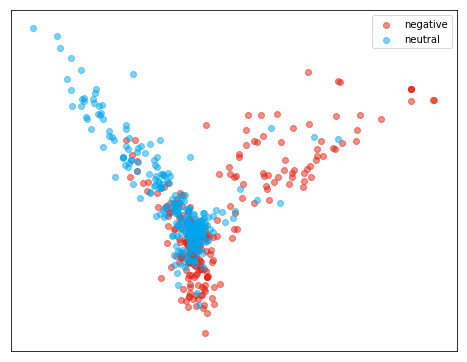

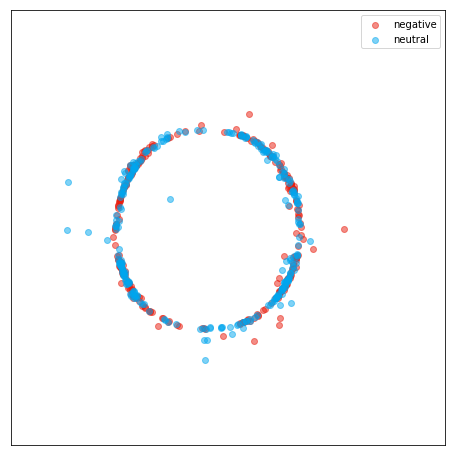

In [216]:
df = df_documents_athar_stemm                

%store df
%run unsupervised_classification_athar.ipynb


